In [1]:
import requests # Module to process http/https requests

In [2]:
remote_url="http://54.243.252.9/ce-5319-webroot/ce5319jb/lessons/lesson8/all_quads_gross_evaporation.csv"  # set the url
response = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('all_quads_gross_evaporation.csv','wb').write(response.content) # extract from the remote the contents, assign to a local file same name

363498

In [3]:
import pandas as pd # Module to process dataframes
import matplotlib.pyplot 

In [4]:
#evapdf = pd.read_csv("all_quads_gross_evaporation.csv",parse_dates=["YYYY-MM"]) # Read the file as a .CSV assign to a dataframe evapdf
evapdf = pd.read_csv("all_quads_gross_evaporation.csv") # Read the file as a .CSV assign to a dataframe evapdf

evapdf.head() # check structure

,YYYY-MM,104,105,106,107,108,204,205,206,207,...,911,912,1008,1009,1010,1011,1108,1109,1110,1210
0,1954-01,1.80,1.80,2.02,2.24,2.24,2.34,1.89,1.80,1.99,...,1.42,1.30,2.50,2.42,1.94,1.29,2.59,2.49,2.22,2.27
1,1954-02,4.27,4.27,4.13,3.98,3.90,4.18,4.26,4.27,4.26,...,2.59,2.51,4.71,4.30,3.84,2.50,5.07,4.62,4.05,4.18
2,1954-03,4.98,4.98,4.62,4.25,4.20,5.01,4.98,4.98,4.68,...,3.21,3.21,6.21,6.06,5.02,3.21,6.32,6.20,5.68,5.70
3,1954-04,6.09,5.94,5.94,6.07,5.27,6.31,5.98,5.89,5.72,...,3.83,3.54,6.45,6.25,4.92,3.54,6.59,6.44,5.88,5.95
4,1954-05,5.41,5.09,5.14,4.40,3.61,5.57,4.56,4.47,4.18,...,3.48,3.97,7.92,8.13,6.31,3.99,7.75,7.98,7.40,7.40


<AxesSubplot:xlabel='YYYY-MM'>

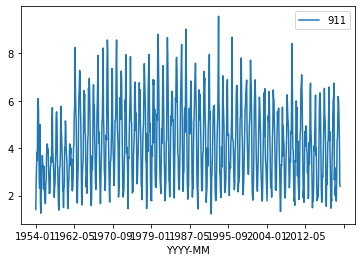

In [5]:
evapdf.plot.line(x='YYYY-MM',y='911') # Plot quadrant 911 evaporation time series 

'1985-04'

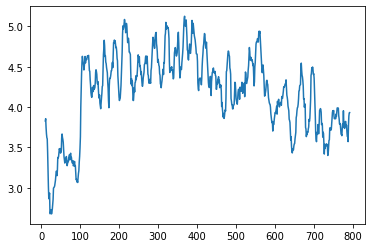

In [6]:
movingAvg=evapdf['911'].rolling(12, win_type ='boxcar').mean()
movingAvg
movingAvg.plot.line(x='YYYY-MM',y='911')
evapdf['YYYY-MM'][375]

In [7]:
evB485loc = evapdf['YYYY-MM']<'1985-04'  # filter before 1985
evB485 = evapdf[evB485loc]
ev85uploc = evapdf['YYYY-MM']>='1985-04' # filter after 1985
ev85up= evapdf[ev85uploc]
print(evB485.head(2))
print(ev85up.head(2))

   YYYY-MM   104   105   106   107   108   204   205   206   207  ...   911  \
0  1954-01  1.80  1.80  2.02  2.24  2.24  2.34  1.89  1.80  1.99  ...  1.42   
1  1954-02  4.27  4.27  4.13  3.98  3.90  4.18  4.26  4.27  4.26  ...  2.59   

    912  1008  1009  1010  1011  1108  1109  1110  1210  
0  1.30  2.50  2.42  1.94  1.29  2.59  2.49  2.22  2.27  
1  2.51  4.71  4.30  3.84  2.50  5.07  4.62  4.05  4.18  

[2 rows x 93 columns]
     YYYY-MM   104   105   106   107   108   204   205   206   207  ...   911  \
375  1985-04  5.31  6.27  6.75  6.92  4.76  5.32  6.72  6.83  7.04  ...  4.16   
376  1985-05  4.80  5.64  5.51  5.47  5.43  4.90  6.62  6.37  6.13  ...  5.87   

      912  1008  1009  1010  1011  1108  1109  1110  1210  
375  4.45  5.26  5.06  4.91  4.41  6.24  5.58  4.81  4.63  
376  5.17  5.19  5.66  5.69  5.86  5.63  5.59  5.63  5.71  

[2 rows x 93 columns]


In [8]:
evB485['911'].describe()

count    375.000000
mean       4.202480
std        1.774273
min        1.260000
25%        2.665000
50%        3.900000
75%        5.455000
max        8.800000
Name: 911, dtype: float64

In [9]:
ev85up['911'].describe()

count    417.000000
mean       4.167458
std        1.676704
min        1.230000
25%        2.680000
50%        4.160000
75%        5.410000
max        9.560000
Name: 911, dtype: float64

<AxesSubplot:>

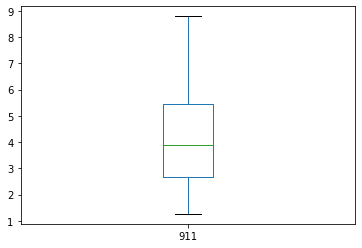

In [10]:
evB485['911'].plot.box()

<AxesSubplot:>

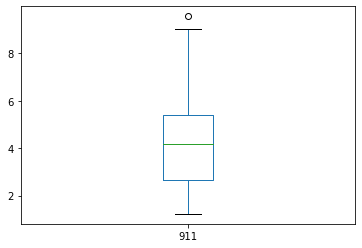

In [11]:
ev85up['911'].plot.box()

In [12]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(evB485['911'],ev85up['911'])

print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
	print('Difference in Median Values',round(evB485['911'].median()-ev85up['911'].median(),3),'is not significant')
else:
	print('Difference in Median Values',round(evB485['911'].median()-ev85up['911'].median(),3),'is SIGNIFICANT')

statistic=78184.500, p-value at rejection =0.500
Difference in Median Values -0.26 is not significant


In [13]:
stat, p = mannwhitneyu(evB485['911'],evB485['911'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
	print('Difference in Median Values',round(evB485['911'].median()-evB485['911'].median(),3),'is not significant')
else:
	print('Difference in Median Values',round(evB485['911'].median()-evB485['911'].median(),3),'is SIGNIFICANT')

statistic=70312.500, p-value at rejection =0.500
Difference in Median Values 0.0 is not significant


In [14]:
evB492loc = evapdf['YYYY-MM']<'1992'  # filter before 1992
evB492 = evapdf[evB492loc]
ev92uploc = evapdf['YYYY-MM']>='1992' # filter after 1992
ev92up= evapdf[ev92uploc]
#print(evB492.head())
#print(ev92up.head())

In [15]:
stat, p = mannwhitneyu(evB492['911'],ev92up['911'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
	print('Difference in Median Values',round(evB492['911'].median()-ev92up['911'].median(),3),'is not significant')
else:
	print('Difference in Median Values',round(evB492['911'].median()-ev92up['911'].median(),3),'is SIGNIFICANT')

statistic=72195.000, p-value at rejection =0.083
Difference in Median Values -0.045 is not significant


In [16]:
#%reset -f # only if necessaryimport requests # Module to process http/https requests
import requests # Module to process http/https requests
remote_url="http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/gridded_data.txt"  # set the url
response = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
localfile = open('gridded_data.txt','wb') # open connection to a local file same name as remote
localfile.write(response.content) # extract from the remote the contents,insert into the local file same name
localfile.close() # close connection to the local file

In [17]:
#### Reading a Data File ####
xyzmatrix = [] # null list to hold contents
xyzfile = open("gridded_data.txt","r") # open a read connection

In [18]:
line1 = (xyzfile.readline().split()) # read just the first line
rowNum = int(line1[0]) # extract row count
colNum = int(line1[1]) # extract column count

In [19]:
for line in xyzfile: # now read rest of the file, line by line
    xyzmatrix.append([float(n) for n in line.strip().split(",")])

In [20]:
xyzfile.close()

In [21]:
#### Build 2D Structure for Contour Plot Example ####
xlist = [[0 for j in range(colNum)] for i in range(rowNum)]     # null list to hold contents
ylist = [[0 for j in range(colNum)] for i in range(rowNum)]     # null list to hold contents
zlist = [[0 for j in range(colNum)] for i in range(rowNum)]     # null list to hold contents

In [22]:
pointer=0
for irow in range(0,rowNum): 
    for jcol in range(0,colNum):
        xlist[irow][jcol]=(xyzmatrix[pointer][0])
        ylist[irow][jcol]=(xyzmatrix[pointer][1])
        zlist[irow][jcol]=(xyzmatrix[pointer][2])
        pointer += 1

Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

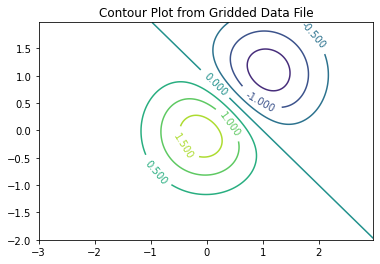

In [23]:
#### Build the Plot #####
import matplotlib
fig, ax = matplotlib.pyplot.subplots()
CS = ax.contour(xlist, ylist, zlist, levels = 7)
ax.clabel(CS, inline=2, fontsize=10)
ax.set_title('Contour Plot from Gridded Data File')
################################

In [24]:
# magic function to check my current working directory (that the script will run)
%pwd # notice no space between % and pwd

'/home/sensei/ce-5319-webroot/ce5319jb/lessons/lesson8'

In [25]:
# Delete the directory if it already exists BE CAREFUL 
# This code is here so the notebook resets during Jupyter Book builds
%rm -rf ./MyImageFiles/
%rm -rf wget-log*

In [26]:
# magic function to create a destination to store the files into
%mkdir MyImageFiles # name the directory what you wish, locate it somewhere you can find
# In the example, its just being stored in the lesson directory, which you probably don't have

In [27]:
# magic function to list the contents of my current directory
%ls 

DatabaseStructure.png            concreteData.xls
EvapMap.png                      datatypes.ipynb
EvaporationAnalysis.html         downloading.ipynb
HighestGrossingMovies.bak.csv    exploratorydataanalysis.ipynb
HighestGrossingMovies.csv        exploratorydataanalysisvisual.ipynb
MyImageFiles/                    gridded_data.txt
Peterson-Nature1995-377.pdf      gridded_data.txt.bak
all_quads_gross_evaporation.csv  lesson8.ipynb
all_quads_net_evaporation.csv    mixturedatatype.png
cat784.png                       pip-corner-sumps.txt
censoreddatatype.png             quad-list.png
concreteData.csv                 top_movies.csv


In [28]:
# magic function to show contents of MyImageFiles (there will only be two system files)
# . == self and ..= parent directories.
%ls -la ./MyImageFiles/

total 8
drwxrwxr-x 2 sensei sensei 4096 Nov 22 20:01 ./
drwxrwxr-x 4 sensei sensei 4096 Nov 22 20:01 ../


In [29]:
####################################
# Here is the directory "get" call #
####################################
! wget -nd -nH --no-parent --reject "index.html*" -e robots=off --recursive -P ./MyImageFiles http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/ 
#
#
#
#

--2022-11-22 20:01:05--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/
Connecting to 54.243.252.9:80... 

connected.
HTTP request sent, awaiting response... 

200 OK
Length: unspecified [text/html]
Saving to: ‘./MyImageFiles/index.html.tmp’

index.html.tmp          [<=>                 ]       0  --.-KB/s               

index.html.tmp          [ <=>                ] 176.39K   949KB/s    in 0.2s    



2022-11-22 20:01:05 (949 KB/s) - ‘./MyImageFiles/index.html.tmp’ saved [180622]

Removing ./MyImageFiles/index.html.tmp since it should be rejected.

--2022-11-22 20:01:06--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/?C=N;O=D
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: unspecified [text/html]
Saving to: ‘./MyImageFiles/index.html?C=N;O=D.tmp’

index.html?C=N;O=D.     [ <=>                ] 176.39K  --.-KB/s    in 0.05s   

2022-11-22 20:01:06 (3.82 MB/s) - ‘./MyImageFiles/index.html?C=N;O=D.tmp’ saved [180622]



Removing ./MyImageFiles/index.html?C=N;O=D.tmp since it should be rejected.

--2022-11-22 20:01:06--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/?C=M;O=A
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: unspecified [text/html]
Saving to: ‘./MyImageFiles/index.html?C=M;O=A.tmp’

index.html?C=M;O=A.     [ <=>                ] 176.39K  --.-KB/s    in 0.006s  

2022-11-22 20:01:06 (30.6 MB/s) - ‘./MyImageFiles/index.html?C=M;O=A.tmp’ saved [180622]



Removing ./MyImageFiles/index.html?C=M;O=A.tmp since it should be rejected.

--2022-11-22 20:01:06--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/?C=S;O=A
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: unspecified [text/html]
Saving to: ‘./MyImageFiles/index.html?C=S;O=A.tmp’

index.html?C=S;O=A.     [<=>                 ]       0  --.-KB/s               

index.html?C=S;O=A.     [ <=>                ] 176.39K  --.-KB/s    in 0.007s  

2022-11-22 20:01:06 (24.9 MB/s) - ‘./MyImageFiles/index.html?C=S;O=A.tmp’ saved [180622]

Removing ./MyImageFiles/index.html?C=S;O=A.tmp since it should be rejected.

--2022-11-22 20:01:06--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/?C=D;O=A
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: unspecified [text/html]
Saving to: ‘./MyImageFiles/index.html?C=D;O=A.tmp’

index.html?C=D;O=A.     [ <=>                ] 176.39K  --.-KB/s    in 0.006s  



2022-11-22 20:01:06 (29.6 MB/s) - ‘./MyImageFiles/index.html?C=D;O=A.tmp’ saved [180622]

Removing ./MyImageFiles/index.html?C=D;O=A.tmp since it should be rejected.

--2022-11-22 20:01:06--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image0.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10616 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image0.png’

Image0.png          100%[===================>]  10.37K  --.-KB/s    in 0s      

2022-11-22 20:01:06 (23.0 MB/s) - ‘./MyImageFiles/Image0.png’ saved [10616/10616]

--2022-11-22 20:01:06--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image1.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9085 (8.9K) [image/png]
Saving to: ‘./MyImageFiles/Image1.png’

Image1.png          100%[===================>]   8.87K  --.-KB/s    in 0s      

2022-11-22 20:01:06 (29.3 MB/s) - ‘./MyImageFiles/Image1.png’ saved [9085/9085]

--2022-11-22 20:01:06--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image2.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12902 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image2.png’

Image2.png          100%[===================>]  12.60K  --.-KB/s    in 0s      

2022-11-22 20:01:06 (44.7 MB/s) - ‘./MyImageFiles/Image2.png’ saved [12902/12902]

--2022-11-22 20:01:06--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image3.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11793 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image3.png’

Image3.png          100%[===================>]  11.52K  --.-KB/s    in 0s      

2022-11-22 20:01:06 (36.2 MB/s) - ‘./MyImageFiles/Image3.png’ saved [11793/11793]

--2022-11-22 20:01:06--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image4.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14041 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image4.png’

Image4.png          100%[===================>]  13.71K  --.-KB/s    in 0s      

2022-11-22 20:01:06 (34.7 MB/s) - ‘./MyImageFiles/Image4.png’ saved [14041/14041]

--2022-11-22 20:01:06--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image5.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12954 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image5.png’

Image5.png          100%[===================>]  12.65K  --.-KB/s    in 0s      

2022-11-22 20:01:06 (49.9 MB/s) - ‘./MyImageFiles/Image5.png’ saved [12954/12954]

--2022-11-22 20:01:06--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image6.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11875 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image6.png’

Image6.png          100%[===================>]  11.60K  --.-KB/s    in 0s      

2022-11-22 20:01:06 (51.5 MB/s) - ‘./MyImageFiles/Image6.png’ saved [11875/11875]

--2022-11-22 20:01:06--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image7.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13344 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image7.png’

Image7.png          100%[===================>]  13.03K  --.-KB/s    in 0s      

2022-11-22 20:01:06 (53.0 MB/s) - ‘./MyImageFiles/Image7.png’ saved [13344/13344]

--2022-11-22 20:01:06--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image8.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14396 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image8.png’

Image8.png          100%[===================>]  14.06K  --.-KB/s    in 0s      

2022-11-22 20:01:06 (36.5 MB/s) - ‘./MyImageFiles/Image8.png’ saved [14396/14396]

--2022-11-22 20:01:06--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image9.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13947 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image9.png’

Image9.png          100%[===================>]  13.62K  --.-KB/s    in 0s      

2022-11-22 20:01:06 (45.5 MB/s) - ‘./MyImageFiles/Image9.png’ saved [13947/13947]

--2022-11-22 20:01:06--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image10.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10158 (9.9K) [image/png]
Saving to: ‘./MyImageFiles/Image10.png’

Image10.png         100%[===================>]   9.92K  --.-KB/s    in 0s      

2022-11-22 20:01:07 (27.4 MB/s) - ‘./MyImageFiles/Image10.png’ saved [10158/10158]

--2022-11-22 20:01:07--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image11.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 8128 (7.9K) [image/png]
Saving to: ‘./MyImageFiles/Image11.png’

Image11.png         100%[===================>]   7.94K  --.-KB/s    in 0s      

2022-11-22 20:01:07 (117 MB/s) - ‘./MyImageFiles/Image11.png’ saved [8128/8128]

--2022-11-22 20:01:07--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image12.png
Reusing existing connection to 54.243.252.9:80.


HTTP request sent, awaiting response... 200 OK
Length: 10822 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image12.png’

Image12.png         100%[===================>]  10.57K  --.-KB/s    in 0s      

2022-11-22 20:01:07 (35.0 MB/s) - ‘./MyImageFiles/Image12.png’ saved [10822/10822]

--2022-11-22 20:01:07--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image13.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13872 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image13.png’

Image13.png         100%[===================>]  13.55K  --.-KB/s    in 0s      

2022-11-22 20:01:07 (37.2 MB/s) - ‘./MyImageFiles/Image13.png’ saved [13872/13872]

--2022-11-22 20:01:07--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image14.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12450 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image14.png’

Image14.png         100%[===================>]  12.16K  --.-KB/s    in 0s      

2022-11-22 20:01:07 (35.2 MB/s) - ‘./MyImageFiles/Image14.png’ saved [12450/12450]

--2022-11-22 20:01:07--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image15.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13255 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image15.png’

Image15.png         100%[===================>]  12.94K  --.-KB/s    in 0s      

2022-11-22 20:01:07 (44.8 MB/s) - ‘./MyImageFiles/Image15.png’ saved [13255/13255]

--2022-11-22 20:01:07--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image16.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9766 (9.5K) [image/png]
Saving to: ‘./MyImageFiles/Image16.png’

Image16.png         100%[===================>]   9.54K  --.-KB/s    in 0s      

2022-11-22 20:01:07 (28.7 MB/s) - ‘./MyImageFiles/Image16.png’ saved [9766/9766]

--2022-11-22 20:01:07--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image17.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 8896 (8.7K) [image/png]
Saving to: ‘./MyImageFiles/Image17.png’

Image17.png         100%[===================>]   8.69K  --.-KB/s    in 0s      

2022-11-22 20:01:07 (31.3 MB/s) - ‘./MyImageFiles/Image17.png’ saved [8896/8896]

--2022-11-22 20:01:07--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image18.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14960 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image18.png’

Image18.png         100%[===================>]  14.61K  --.-KB/s    in 0s      

2022-11-22 20:01:07 (51.7 MB/s) - ‘./MyImageFiles/Image18.png’ saved [14960/14960]

--2022-11-22 20:01:07--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image19.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10425 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image19.png’

Image19.png         100%[===================>]  10.18K  --.-KB/s    in 0.01s   

2022-11-22 20:01:07 (899 KB/s) - ‘./MyImageFiles/Image19.png’ saved [10425/10425]

--2022-11-22 20:01:07--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image20.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10569 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image20.png’

Image20.png         100%[===================>]  10.32K  --.-KB/s    in 0s      

2022-11-22 20:01:07 (32.7 MB/s) - ‘./MyImageFiles/Image20.png’ saved [10569/10569]

--2022-11-22 20:01:07--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image21.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14137 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image21.png’

Image21.png         100%[===================>]  13.81K  --.-KB/s    in 0s      

2022-11-22 20:01:07 (54.5 MB/s) - ‘./MyImageFiles/Image21.png’ saved [14137/14137]

--2022-11-22 20:01:07--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image22.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12424 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image22.png’

Image22.png         100%[===================>]  12.13K  --.-KB/s    in 0s      

2022-11-22 20:01:07 (53.0 MB/s) - ‘./MyImageFiles/Image22.png’ saved [12424/12424]

--2022-11-22 20:01:07--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image23.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14645 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image23.png’

Image23.png         100%[===================>]  14.30K  --.-KB/s    in 0s      

2022-11-22 20:01:07 (54.8 MB/s) - ‘./MyImageFiles/Image23.png’ saved [14645/14645]

--2022-11-22 20:01:07--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image24.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14440 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image24.png’

Image24.png         100%[===================>]  14.10K  --.-KB/s    in 0s      

2022-11-22 20:01:07 (29.4 MB/s) - ‘./MyImageFiles/Image24.png’ saved [14440/14440]

--2022-11-22 20:01:07--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image25.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12926 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image25.png’

Image25.png         100%[===================>]  12.62K  --.-KB/s    in 0s      

2022-11-22 20:01:07 (31.0 MB/s) - ‘./MyImageFiles/Image25.png’ saved [12926/12926]

--2022-11-22 20:01:07--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image26.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11168 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image26.png’

Image26.png         100%[===================>]  10.91K  --.-KB/s    in 0s      

2022-11-22 20:01:07 (32.0 MB/s) - ‘./MyImageFiles/Image26.png’ saved [11168/11168]

--2022-11-22 20:01:07--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image27.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14174 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image27.png’

Image27.png         100%[===================>]  13.84K  --.-KB/s    in 0s      

2022-11-22 20:01:07 (35.1 MB/s) - ‘./MyImageFiles/Image27.png’ saved [14174/14174]

--2022-11-22 20:01:07--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image28.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14281 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image28.png’

Image28.png         100%[===================>]  13.95K  --.-KB/s    in 0s      

2022-11-22 20:01:07 (31.7 MB/s) - ‘./MyImageFiles/Image28.png’ saved [14281/14281]

--2022-11-22 20:01:07--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image29.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13607 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image29.png’

Image29.png         100%[===================>]  13.29K  --.-KB/s    in 0s      

2022-11-22 20:01:07 (30.6 MB/s) - ‘./MyImageFiles/Image29.png’ saved [13607/13607]

--2022-11-22 20:01:07--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image30.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11020 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image30.png’

Image30.png         100%[===================>]  10.76K  --.-KB/s    in 0s      

2022-11-22 20:01:08 (33.4 MB/s) - ‘./MyImageFiles/Image30.png’ saved [11020/11020]

--2022-11-22 20:01:08--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image31.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13757 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image31.png’

Image31.png         100%[===================>]  13.43K  --.-KB/s    in 0s      

2022-11-22 20:01:08 (48.2 MB/s) - ‘./MyImageFiles/Image31.png’ saved [13757/13757]

--2022-11-22 20:01:08--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image32.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15072 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image32.png’

Image32.png         100%[===================>]  14.72K  --.-KB/s    in 0s      

2022-11-22 20:01:08 (37.9 MB/s) - ‘./MyImageFiles/Image32.png’ saved [15072/15072]

--2022-11-22 20:01:08--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image33.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12381 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image33.png’

Image33.png         100%[===================>]  12.09K  --.-KB/s    in 0s      

2022-11-22 20:01:08 (29.5 MB/s) - ‘./MyImageFiles/Image33.png’ saved [12381/12381]

--2022-11-22 20:01:08--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image34.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12600 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image34.png’

Image34.png         100%[===================>]  12.30K  --.-KB/s    in 0s      

2022-11-22 20:01:08 (33.4 MB/s) - ‘./MyImageFiles/Image34.png’ saved [12600/12600]

--2022-11-22 20:01:08--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image35.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 12181 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image35.png’

Image35.png         100%[===================>]  11.90K  --.-KB/s    in 0s      

2022-11-22 20:01:08 (56.4 MB/s) - ‘./MyImageFiles/Image35.png’ saved [12181/12181]

--2022-11-22 20:01:08--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image36.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13128 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image36.png’

Image36.png         100%[===================>]  12.82K  --.-KB/s    in 0s      

2022-11-22 20:01:08 (37.2 MB/s) - ‘./MyImageFiles/Image36.png’ saved [13128/13128]

--2022-11-22 20:01:08--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image37.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14504 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image37.png’

Image37.png         100%[===================>]  14.16K  --.-KB/s    in 0s      

2022-11-22 20:01:08 (39.9 MB/s) - ‘./MyImageFiles/Image37.png’ saved [14504/14504]

--2022-11-22 20:01:08--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image38.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15284 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image38.png’

Image38.png         100%[===================>]  14.93K  --.-KB/s    in 0s      

2022-11-22 20:01:08 (42.2 MB/s) - ‘./MyImageFiles/Image38.png’ saved [15284/15284]

--2022-11-22 20:01:08--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image39.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10358 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image39.png’

Image39.png         100%[===================>]  10.12K  --.-KB/s    in 0s      

2022-11-22 20:01:08 (34.0 MB/s) - ‘./MyImageFiles/Image39.png’ saved [10358/10358]

--2022-11-22 20:01:08--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image40.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15472 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image40.png’

Image40.png         100%[===================>]  15.11K  --.-KB/s    in 0s      

2022-11-22 20:01:08 (38.6 MB/s) - ‘./MyImageFiles/Image40.png’ saved [15472/15472]

--2022-11-22 20:01:08--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image41.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10277 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image41.png’

Image41.png         100%[===================>]  10.04K  --.-KB/s    in 0s      

2022-11-22 20:01:08 (30.7 MB/s) - ‘./MyImageFiles/Image41.png’ saved [10277/10277]

--2022-11-22 20:01:08--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image42.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12949 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image42.png’

Image42.png         100%[===================>]  12.65K  --.-KB/s    in 0s      

2022-11-22 20:01:08 (47.8 MB/s) - ‘./MyImageFiles/Image42.png’ saved [12949/12949]

--2022-11-22 20:01:08--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image43.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14135 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image43.png’

Image43.png         100%[===================>]  13.80K  --.-KB/s    in 0s      

2022-11-22 20:01:08 (54.2 MB/s) - ‘./MyImageFiles/Image43.png’ saved [14135/14135]

--2022-11-22 20:01:08--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image44.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13537 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image44.png’

Image44.png         100%[===================>]  13.22K  --.-KB/s    in 0s      

2022-11-22 20:01:08 (54.8 MB/s) - ‘./MyImageFiles/Image44.png’ saved [13537/13537]

--2022-11-22 20:01:08--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image45.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14427 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image45.png’

Image45.png         100%[===================>]  14.09K  --.-KB/s    in 0s      

2022-11-22 20:01:08 (40.5 MB/s) - ‘./MyImageFiles/Image45.png’ saved [14427/14427]

--2022-11-22 20:01:08--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image46.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10202 (10.0K) [image/png]
Saving to: ‘./MyImageFiles/Image46.png’

Image46.png         100%[===================>]   9.96K  --.-KB/s    in 0s      

2022-11-22 20:01:08 (27.2 MB/s) - ‘./MyImageFiles/Image46.png’ saved [10202/10202]

--2022-11-22 20:01:08--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image47.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14860 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image47.png’

Image47.png         100%[===================>]  14.51K  --.-KB/s    in 0s      

2022-11-22 20:01:08 (60.7 MB/s) - ‘./MyImageFiles/Image47.png’ saved [14860/14860]

--2022-11-22 20:01:08--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image48.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13475 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image48.png’

Image48.png         100%[===================>]  13.16K  --.-KB/s    in 0s      

2022-11-22 20:01:08 (32.1 MB/s) - ‘./MyImageFiles/Image48.png’ saved [13475/13475]

--2022-11-22 20:01:08--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image49.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13904 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image49.png’

Image49.png         100%[===================>]  13.58K  --.-KB/s    in 0s      

2022-11-22 20:01:09 (36.1 MB/s) - ‘./MyImageFiles/Image49.png’ saved [13904/13904]

--2022-11-22 20:01:09--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image50.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15062 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image50.png’

Image50.png         100%[===================>]  14.71K  --.-KB/s    in 0s      

2022-11-22 20:01:09 (30.0 MB/s) - ‘./MyImageFiles/Image50.png’ saved [15062/15062]

--2022-11-22 20:01:09--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image51.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13040 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image51.png’

Image51.png         100%[===================>]  12.73K  --.-KB/s    in 0s      

2022-11-22 20:01:09 (46.3 MB/s) - ‘./MyImageFiles/Image51.png’ saved [13040/13040]

--2022-11-22 20:01:09--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image52.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14258 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image52.png’

Image52.png         100%[===================>]  13.92K  --.-KB/s    in 0s      

2022-11-22 20:01:09 (37.0 MB/s) - ‘./MyImageFiles/Image52.png’ saved [14258/14258]

--2022-11-22 20:01:09--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image53.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14223 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image53.png’

Image53.png         100%[===================>]  13.89K  --.-KB/s    in 0s      

2022-11-22 20:01:09 (44.3 MB/s) - ‘./MyImageFiles/Image53.png’ saved [14223/14223]

--2022-11-22 20:01:09--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image54.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10245 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image54.png’

Image54.png         100%[===================>]  10.00K  --.-KB/s    in 0s      

2022-11-22 20:01:09 (30.4 MB/s) - ‘./MyImageFiles/Image54.png’ saved [10245/10245]

--2022-11-22 20:01:09--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image55.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12960 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image55.png’

Image55.png         100%[===================>]  12.66K  --.-KB/s    in 0s      

2022-11-22 20:01:09 (36.5 MB/s) - ‘./MyImageFiles/Image55.png’ saved [12960/12960]

--2022-11-22 20:01:09--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image56.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14210 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image56.png’

Image56.png         100%[===================>]  13.88K  --.-KB/s    in 0s      

2022-11-22 20:01:09 (38.0 MB/s) - ‘./MyImageFiles/Image56.png’ saved [14210/14210]

--2022-11-22 20:01:09--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image57.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14419 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image57.png’

Image57.png         100%[===================>]  14.08K  --.-KB/s    in 0s      

2022-11-22 20:01:09 (32.2 MB/s) - ‘./MyImageFiles/Image57.png’ saved [14419/14419]

--2022-11-22 20:01:09--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image58.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12147 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image58.png’

Image58.png         100%[===================>]  11.86K  --.-KB/s    in 0s      

2022-11-22 20:01:09 (49.2 MB/s) - ‘./MyImageFiles/Image58.png’ saved [12147/12147]

--2022-11-22 20:01:09--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image59.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9471 (9.2K) [image/png]
Saving to: ‘./MyImageFiles/Image59.png’

Image59.png         100%[===================>]   9.25K  --.-KB/s    in 0s      

2022-11-22 20:01:09 (32.3 MB/s) - ‘./MyImageFiles/Image59.png’ saved [9471/9471]

--2022-11-22 20:01:09--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image60.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13855 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image60.png’

Image60.png         100%[===================>]  13.53K  --.-KB/s    in 0s      

2022-11-22 20:01:09 (37.0 MB/s) - ‘./MyImageFiles/Image60.png’ saved [13855/13855]

--2022-11-22 20:01:09--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image61.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14451 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image61.png’

Image61.png         100%[===================>]  14.11K  --.-KB/s    in 0s      

2022-11-22 20:01:09 (38.5 MB/s) - ‘./MyImageFiles/Image61.png’ saved [14451/14451]

--2022-11-22 20:01:09--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image62.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15185 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image62.png’

Image62.png         100%[===================>]  14.83K  --.-KB/s    in 0s      

2022-11-22 20:01:09 (47.6 MB/s) - ‘./MyImageFiles/Image62.png’ saved [15185/15185]

--2022-11-22 20:01:09--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image63.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13454 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image63.png’

Image63.png         100%[===================>]  13.14K  --.-KB/s    in 0s      

2022-11-22 20:01:09 (53.0 MB/s) - ‘./MyImageFiles/Image63.png’ saved [13454/13454]

--2022-11-22 20:01:09--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image64.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11205 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image64.png’

Image64.png         100%[===================>]  10.94K  --.-KB/s    in 0s      

2022-11-22 20:01:09 (42.1 MB/s) - ‘./MyImageFiles/Image64.png’ saved [11205/11205]

--2022-11-22 20:01:09--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image65.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9785 (9.6K) [image/png]
Saving to: ‘./MyImageFiles/Image65.png’

Image65.png         100%[===================>]   9.56K  --.-KB/s    in 0s      

2022-11-22 20:01:09 (40.3 MB/s) - ‘./MyImageFiles/Image65.png’ saved [9785/9785]

--2022-11-22 20:01:09--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image66.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11691 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image66.png’

Image66.png         100%[===================>]  11.42K  --.-KB/s    in 0s      

2022-11-22 20:01:09 (51.9 MB/s) - ‘./MyImageFiles/Image66.png’ saved [11691/11691]

--2022-11-22 20:01:09--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image67.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10574 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image67.png’

Image67.png         100%[===================>]  10.33K  --.-KB/s    in 0s      

2022-11-22 20:01:09 (44.4 MB/s) - ‘./MyImageFiles/Image67.png’ saved [10574/10574]

--2022-11-22 20:01:09--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image68.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13930 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image68.png’

Image68.png         100%[===================>]  13.60K  --.-KB/s    in 0s      

2022-11-22 20:01:09 (55.0 MB/s) - ‘./MyImageFiles/Image68.png’ saved [13930/13930]

--2022-11-22 20:01:09--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image69.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14168 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image69.png’

Image69.png         100%[===================>]  13.84K  --.-KB/s    in 0s      

2022-11-22 20:01:10 (41.7 MB/s) - ‘./MyImageFiles/Image69.png’ saved [14168/14168]

--2022-11-22 20:01:10--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image70.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14695 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image70.png’

Image70.png         100%[===================>]  14.35K  --.-KB/s    in 0s      

2022-11-22 20:01:10 (68.3 MB/s) - ‘./MyImageFiles/Image70.png’ saved [14695/14695]

--2022-11-22 20:01:10--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image71.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14200 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image71.png’

Image71.png         100%[===================>]  13.87K  --.-KB/s    in 0s      

2022-11-22 20:01:10 (42.9 MB/s) - ‘./MyImageFiles/Image71.png’ saved [14200/14200]

--2022-11-22 20:01:10--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image72.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13803 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image72.png’

Image72.png         100%[===================>]  13.48K  --.-KB/s    in 0s      

2022-11-22 20:01:10 (31.6 MB/s) - ‘./MyImageFiles/Image72.png’ saved [13803/13803]

--2022-11-22 20:01:10--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image73.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14094 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image73.png’

Image73.png         100%[===================>]  13.76K  --.-KB/s    in 0s      

2022-11-22 20:01:10 (36.9 MB/s) - ‘./MyImageFiles/Image73.png’ saved [14094/14094]

--2022-11-22 20:01:10--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image74.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 

14363 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image74.png’

Image74.png         100%[===================>]  14.03K  --.-KB/s    in 0s      

2022-11-22 20:01:10 (53.3 MB/s) - ‘./MyImageFiles/Image74.png’ saved [14363/14363]

--2022-11-22 20:01:10--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image75.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13104 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image75.png’

Image75.png         100%[===================>]  12.80K  --.-KB/s    in 0s      

2022-11-22 20:01:10 (32.8 MB/s) - ‘./MyImageFiles/Image75.png’ saved [13104/13104]

--2022-11-22 20:01:10--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image76.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12900 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image76.png’

Image76.png         100%[===================>]  12.60K  --.-KB/s    in 0s      

2022-11-22 20:01:10 (34.9 MB/s) - ‘./MyImageFiles/Image76.png’ saved [12900/12900]

--2022-11-22 20:01:10--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image77.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14432 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image77.png’

Image77.png         100%[===================>]  14.09K  --.-KB/s    in 0s      

2022-11-22 20:01:10 (42.6 MB/s) - ‘./MyImageFiles/Image77.png’ saved [14432/14432]

--2022-11-22 20:01:10--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image78.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 

12104 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image78.png’

Image78.png         100%[===================>]  11.82K  --.-KB/s    in 0s      

2022-11-22 20:01:10 (41.2 MB/s) - ‘./MyImageFiles/Image78.png’ saved [12104/12104]

--2022-11-22 20:01:10--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image79.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13699 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image79.png’

Image79.png         100%[===================>]  13.38K  --.-KB/s    in 0s      

2022-11-22 20:01:10 (40.2 MB/s) - ‘./MyImageFiles/Image79.png’ saved [13699/13699]

--2022-11-22 20:01:10--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image80.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 

11142 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image80.png’

Image80.png         100%[===================>]  10.88K  --.-KB/s    in 0s      

2022-11-22 20:01:10 (31.0 MB/s) - ‘./MyImageFiles/Image80.png’ saved [11142/11142]

--2022-11-22 20:01:10--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image81.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15166 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image81.png’

Image81.png         100%[===================>]  14.81K  --.-KB/s    in 0s      

2022-11-22 20:01:10 (39.1 MB/s) - ‘./MyImageFiles/Image81.png’ saved [15166/15166]

--2022-11-22 20:01:10--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image82.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 

11773 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image82.png’

Image82.png         100%[===================>]  11.50K  --.-KB/s    in 0s      

2022-11-22 20:01:10 (35.5 MB/s) - ‘./MyImageFiles/Image82.png’ saved [11773/11773]

--2022-11-22 20:01:10--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image83.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14467 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image83.png’

Image83.png         100%[===================>]  14.13K  --.-KB/s    in 0s      

2022-11-22 20:01:10 (39.9 MB/s) - ‘./MyImageFiles/Image83.png’ saved [14467/14467]

--2022-11-22 20:01:10--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image84.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14537 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image84.png’

Image84.png         100%[===================>]  14.20K  --.-KB/s    in 0s      

2022-11-22 20:01:10 (38.4 MB/s) - ‘./MyImageFiles/Image84.png’ saved [14537/14537]

--2022-11-22 20:01:10--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image85.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13786 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image85.png’

Image85.png         100%[===================>]  13.46K  --.-KB/s    in 0s      

2022-11-22 20:01:10 (53.4 MB/s) - ‘./MyImageFiles/Image85.png’ saved [13786/13786]

--2022-11-22 20:01:10--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image86.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13175 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image86.png’

Image86.png         100%[===================>]  12.87K  --.-KB/s    in 0s      

2022-11-22 20:01:10 (30.8 MB/s) - ‘./MyImageFiles/Image86.png’ saved [13175/13175]

--2022-11-22 20:01:10--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image87.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14138 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image87.png’

Image87.png         100%[===================>]  13.81K  --.-KB/s    in 0s      

2022-11-22 20:01:10 (42.3 MB/s) - ‘./MyImageFiles/Image87.png’ saved [14138/14138]

--2022-11-22 20:01:10--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image88.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 8765 (8.6K) [image/png]
Saving to: ‘./MyImageFiles/Image88.png’

Image88.png         100%[===================>]   8.56K  --.-KB/s    in 0s      

2022-11-22 20:01:11 (24.6 MB/s) - ‘./MyImageFiles/Image88.png’ saved [8765/8765]

--2022-11-22 20:01:11--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image89.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15124 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image89.png’

Image89.png         100%[===================>]  14.77K  --.-KB/s    in 0s      

2022-11-22 20:01:11 (41.4 MB/s) - ‘./MyImageFiles/Image89.png’ saved [15124/15124]

--2022-11-22 20:01:11--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image90.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14118 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image90.png’

Image90.png         100%[===================>]  13.79K  --.-KB/s    in 0s      

2022-11-22 20:01:11 (40.2 MB/s) - ‘./MyImageFiles/Image90.png’ saved [14118/14118]

--2022-11-22 20:01:11--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image91.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13850 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image91.png’

Image91.png         100%[===================>]  13.53K  --.-KB/s    in 0s      

2022-11-22 20:01:11 (62.5 MB/s) - ‘./MyImageFiles/Image91.png’ saved [13850/13850]

--2022-11-22 20:01:11--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image92.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14364 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image92.png’

Image92.png         100%[===================>]  14.03K  --.-KB/s    in 0s      

2022-11-22 20:01:11 (50.4 MB/s) - ‘./MyImageFiles/Image92.png’ saved [14364/14364]

--2022-11-22 20:01:11--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image93.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10377 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image93.png’

Image93.png         100%[===================>]  10.13K  --.-KB/s    in 0s      

2022-11-22 20:01:11 (46.8 MB/s) - ‘./MyImageFiles/Image93.png’ saved [10377/10377]

--2022-11-22 20:01:11--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image94.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13040 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image94.png’

Image94.png         100%[===================>]  12.73K  --.-KB/s    in 0s      

2022-11-22 20:01:11 (48.8 MB/s) - ‘./MyImageFiles/Image94.png’ saved [13040/13040]

--2022-11-22 20:01:11--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image95.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11650 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image95.png’

Image95.png         100%[===================>]  11.38K  --.-KB/s    in 0s      

2022-11-22 20:01:11 (35.0 MB/s) - ‘./MyImageFiles/Image95.png’ saved [11650/11650]

--2022-11-22 20:01:11--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image96.png
Connecting to 54.243.252.9:80... 

connected.
HTTP request sent, awaiting response... 

200 OK
Length: 14031 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image96.png’

Image96.png         100%[===================>]  13.70K  --.-KB/s    in 0s      

2022-11-22 20:01:11 (41.4 MB/s) - ‘./MyImageFiles/Image96.png’ saved [14031/14031]

--2022-11-22 20:01:11--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image97.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14008 (14K) [image/png]


Saving to: ‘./MyImageFiles/Image97.png’

Image97.png         100%[===================>]  13.68K  --.-KB/s    in 0s      

2022-11-22 20:01:11 (47.8 MB/s) - ‘./MyImageFiles/Image97.png’ saved [14008/14008]

--2022-11-22 20:01:11--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image98.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 13512 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image98.png’

Image98.png         100%[===================>]  13.20K  --.-KB/s    in 0s      

2022-11-22 20:01:11 (43.5 MB/s) - ‘./MyImageFiles/Image98.png’ saved [13512/13512]

--2022-11-22 20:01:11--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image99.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14363 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image99.png’

Image99.png         100%[===================>]  14.03K  --.-KB/s    in 0s      

2022-11-22 20:01:11 (40.2 MB/s) - ‘./MyImageFiles/Image99.png’ saved [14363/14363]

--2022-11-22 20:01:11--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image100.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12518 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image100.png’

Image100.png        100%[===================>]  12.22K  --.-KB/s    in 0s      

2022-11-22 20:01:11 (37.9 MB/s) - ‘./MyImageFiles/Image100.png’ saved [12518/12518]

--2022-11-22 20:01:11--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image101.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10308 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image101.png’

Image101.png        100%[===================>]  10.07K  --.-KB/s    in 0s      

2022-11-22 20:01:11 (33.3 MB/s) - ‘./MyImageFiles/Image101.png’ saved [10308/10308]

--2022-11-22 20:01:11--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image102.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14379 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image102.png’

Image102.png        100%[===================>]  14.04K  --.-KB/s    in 0s      

2022-11-22 20:01:11 (64.3 MB/s) - ‘./MyImageFiles/Image102.png’ saved [14379/14379]

--2022-11-22 20:01:11--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image103.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12993 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image103.png’

Image103.png        100%[===================>]  12.69K  --.-KB/s    in 0s      

2022-11-22 20:01:11 (38.4 MB/s) - ‘./MyImageFiles/Image103.png’ saved [12993/12993]

--2022-11-22 20:01:11--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image104.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14415 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image104.png’

Image104.png        100%[===================>]  14.08K  --.-KB/s    in 0s      

2022-11-22 20:01:11 (47.5 MB/s) - ‘./MyImageFiles/Image104.png’ saved [14415/14415]

--2022-11-22 20:01:11--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image105.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12150 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image105.png’

Image105.png        100%[===================>]  11.87K  --.-KB/s    in 0s      

2022-11-22 20:01:11 (42.0 MB/s) - ‘./MyImageFiles/Image105.png’ saved [12150/12150]

--2022-11-22 20:01:11--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image106.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13770 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image106.png’

Image106.png        100%[===================>]  13.45K  --.-KB/s    in 0s      

2022-11-22 20:01:11 (59.7 MB/s) - ‘./MyImageFiles/Image106.png’ saved [13770/13770]

--2022-11-22 20:01:11--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image107.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14293 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image107.png’

Image107.png        100%[===================>]  13.96K  --.-KB/s    in 0s      

2022-11-22 20:01:12 (45.8 MB/s) - ‘./MyImageFiles/Image107.png’ saved [14293/14293]

--2022-11-22 20:01:12--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image108.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14671 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image108.png’

Image108.png        100%[===================>]  14.33K  --.-KB/s    in 0s      

2022-11-22 20:01:12 (65.1 MB/s) - ‘./MyImageFiles/Image108.png’ saved [14671/14671]

--2022-11-22 20:01:12--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image109.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14660 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image109.png’

Image109.png        100%[===================>]  14.32K  --.-KB/s    in 0s      

2022-11-22 20:01:12 (43.9 MB/s) - ‘./MyImageFiles/Image109.png’ saved [14660/14660]

--2022-11-22 20:01:12--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image110.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12615 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image110.png’

Image110.png        100%[===================>]  12.32K  --.-KB/s    in 0s      

2022-11-22 20:01:12 (41.5 MB/s) - ‘./MyImageFiles/Image110.png’ saved [12615/12615]

--2022-11-22 20:01:12--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image111.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14022 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image111.png’

Image111.png        100%[===================>]  13.69K  --.-KB/s    in 0s      

2022-11-22 20:01:12 (55.8 MB/s) - ‘./MyImageFiles/Image111.png’ saved [14022/14022]

--2022-11-22 20:01:12--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image112.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14057 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image112.png’

Image112.png        100%[===================>]  13.73K  --.-KB/s    in 0s      

2022-11-22 20:01:12 (39.3 MB/s) - ‘./MyImageFiles/Image112.png’ saved [14057/14057]

--2022-11-22 20:01:12--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image113.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14181 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image113.png’

Image113.png        100%[===================>]  13.85K  --.-KB/s    in 0s      

2022-11-22 20:01:12 (40.9 MB/s) - ‘./MyImageFiles/Image113.png’ saved [14181/14181]

--2022-11-22 20:01:12--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image114.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 11014 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image114.png’

Image114.png        100%[===================>]  10.76K  --.-KB/s    in 0s      

2022-11-22 20:01:12 (54.2 MB/s) - ‘./MyImageFiles/Image114.png’ saved [11014/11014]

--2022-11-22 20:01:12--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image115.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14601 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image115.png’

Image115.png        100%[===================>]  14.26K  --.-KB/s    in 0s      

2022-11-22 20:01:12 (42.6 MB/s) - ‘./MyImageFiles/Image115.png’ saved [14601/14601]

--2022-11-22 20:01:12--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image116.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 13788 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image116.png’

Image116.png        100%[===================>]  13.46K  --.-KB/s    in 0s      



2022-11-22 20:01:12 (48.6 MB/s) - ‘./MyImageFiles/Image116.png’ saved [13788/13788]

--2022-11-22 20:01:12--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image117.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 9479 (9.3K) [image/png]
Saving to: ‘./MyImageFiles/Image117.png’

Image117.png        100%[===================>]   9.26K  --.-KB/s    in 0.003s  

2022-11-22 20:01:12 (2.62 MB/s) - ‘./MyImageFiles/Image117.png’ saved [9479/9479]

--2022-11-22 20:01:12--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image118.png


Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 11696 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image118.png’

Image118.png        100%[===================>]  11.42K  --.-KB/s    in 0s      

2022-11-22 20:01:12 (33.9 MB/s) - ‘./MyImageFiles/Image118.png’ saved [11696/11696]

--2022-11-22 20:01:12--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image119.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13468 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image119.png’

Image119.png        100%[===================>]  13.15K  --.-KB/s    in 0s      

2022-11-22 20:01:12 (42.1 MB/s) - ‘./MyImageFiles/Image119.png’ saved [13468/13468]

--2022-11-22 20:01:12--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image120.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14605 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image120.png’

Image120.png        100%[===================>]  14.26K  --.-KB/s    in 0s      

2022-11-22 20:01:12 (43.9 MB/s) - ‘./MyImageFiles/Image120.png’ saved [14605/14605]

--2022-11-22 20:01:12--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image121.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10874 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image121.png’

Image121.png        100%[===================>]  10.62K  --.-KB/s    in 0s      

2022-11-22 20:01:12 (33.7 MB/s) - ‘./MyImageFiles/Image121.png’ saved [10874/10874]

--2022-11-22 20:01:12--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image122.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9660 (9.4K) [image/png]
Saving to: ‘./MyImageFiles/Image122.png’

Image122.png        100%[===================>]   9.43K  --.-KB/s    in 0s      

2022-11-22 20:01:12 (31.8 MB/s) - ‘./MyImageFiles/Image122.png’ saved [9660/9660]

--2022-11-22 20:01:12--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image123.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15528 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image123.png’

Image123.png        100%[===================>]  15.16K  --.-KB/s    in 0s      

2022-11-22 20:01:12 (44.5 MB/s) - ‘./MyImageFiles/Image123.png’ saved [15528/15528]

--2022-11-22 20:01:12--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image124.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9702 (9.5K) [image/png]
Saving to: ‘./MyImageFiles/Image124.png’

Image124.png        100%[===================>]   9.47K  --.-KB/s    in 0s      

2022-11-22 20:01:12 (38.9 MB/s) - ‘./MyImageFiles/Image124.png’ saved [9702/9702]

--2022-11-22 20:01:12--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image125.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14721 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image125.png’

Image125.png        100%[===================>]  14.38K  --.-KB/s    in 0s      

2022-11-22 20:01:12 (60.7 MB/s) - ‘./MyImageFiles/Image125.png’ saved [14721/14721]

--2022-11-22 20:01:12--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image126.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13635 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image126.png’

Image126.png        100%[===================>]  13.32K  --.-KB/s    in 0s      

2022-11-22 20:01:12 (58.5 MB/s) - ‘./MyImageFiles/Image126.png’ saved [13635/13635]

--2022-11-22 20:01:12--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image127.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10918 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image127.png’

Image127.png        100%[===================>]  10.66K  --.-KB/s    in 0s      

2022-11-22 20:01:13 (47.0 MB/s) - ‘./MyImageFiles/Image127.png’ saved [10918/10918]

--2022-11-22 20:01:13--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image128.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10707 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image128.png’

Image128.png        100%[===================>]  10.46K  --.-KB/s    in 0s      

2022-11-22 20:01:13 (57.0 MB/s) - ‘./MyImageFiles/Image128.png’ saved [10707/10707]

--2022-11-22 20:01:13--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image129.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12654 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image129.png’

Image129.png        100%[===================>]  12.36K  --.-KB/s    in 0s      

2022-11-22 20:01:13 (31.5 MB/s) - ‘./MyImageFiles/Image129.png’ saved [12654/12654]

--2022-11-22 20:01:13--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image130.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9937 (9.7K) [image/png]
Saving to: ‘./MyImageFiles/Image130.png’

Image130.png        100%[===================>]   9.70K  --.-KB/s    in 0s      

2022-11-22 20:01:13 (40.7 MB/s) - ‘./MyImageFiles/Image130.png’ saved [9937/9937]

--2022-11-22 20:01:13--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image131.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 8409 (8.2K) [image/png]
Saving to: ‘./MyImageFiles/Image131.png’

Image131.png        100%[===================>]   8.21K  --.-KB/s    in 0s      

2022-11-22 20:01:13 (32.3 MB/s) - ‘./MyImageFiles/Image131.png’ saved [8409/8409]

--2022-11-22 20:01:13--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image132.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10585 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image132.png’

Image132.png        100%[===================>]  10.34K  --.-KB/s    in 0s      

2022-11-22 20:01:13 (29.7 MB/s) - ‘./MyImageFiles/Image132.png’ saved [10585/10585]

--2022-11-22 20:01:13--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image133.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13541 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image133.png’

Image133.png        100%[===================>]  13.22K  --.-KB/s    in 0s      

2022-11-22 20:01:13 (36.5 MB/s) - ‘./MyImageFiles/Image133.png’ saved [13541/13541]

--2022-11-22 20:01:13--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image134.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 11136 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image134.png’

Image134.png          0%[                    ]       0  --.-KB/s               

Image134.png        100%[===================>]  10.88K  --.-KB/s    in 0s      

2022-11-22 20:01:13 (32.3 MB/s) - ‘./MyImageFiles/Image134.png’ saved [11136/11136]

--2022-11-22 20:01:13--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image135.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14731 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image135.png’

Image135.png        100%[===================>]  14.39K  --.-KB/s    in 0s      

2022-11-22 20:01:13 (55.9 MB/s) - ‘./MyImageFiles/Image135.png’ saved [14731/14731]

--2022-11-22 20:01:13--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image136.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14711 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image136.png’

Image136.png        100%[===================>]  14.37K  --.-KB/s    in 0s      

2022-11-22 20:01:13 (59.8 MB/s) - ‘./MyImageFiles/Image136.png’ saved [14711/14711]

--2022-11-22 20:01:13--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image137.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9567 (9.3K) [image/png]
Saving to: ‘./MyImageFiles/Image137.png’

Image137.png        100%[===================>]   9.34K  --.-KB/s    in 0s      

2022-11-22 20:01:13 (30.0 MB/s) - ‘./MyImageFiles/Image137.png’ saved [9567/9567]

--2022-11-22 20:01:13--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image138.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9527 (9.3K) [image/png]
Saving to: ‘./MyImageFiles/Image138.png’

Image138.png        100%[===================>]   9.30K  --.-KB/s    in 0s      

2022-11-22 20:01:13 (28.4 MB/s) - ‘./MyImageFiles/Image138.png’ saved [9527/9527]

--2022-11-22 20:01:13--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image139.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14877 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image139.png’

Image139.png        100%[===================>]  14.53K  --.-KB/s    in 0s      

2022-11-22 20:01:13 (66.1 MB/s) - ‘./MyImageFiles/Image139.png’ saved [14877/14877]

--2022-11-22 20:01:13--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image140.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12965 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image140.png’

Image140.png        100%[===================>]  12.66K  --.-KB/s    in 0s      

2022-11-22 20:01:13 (52.8 MB/s) - ‘./MyImageFiles/Image140.png’ saved [12965/12965]

--2022-11-22 20:01:13--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image141.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13981 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image141.png’

Image141.png        100%[===================>]  13.65K  --.-KB/s    in 0s      

2022-11-22 20:01:13 (43.4 MB/s) - ‘./MyImageFiles/Image141.png’ saved [13981/13981]

--2022-11-22 20:01:13--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image142.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10826 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image142.png’

Image142.png        100%[===================>]  10.57K  --.-KB/s    in 0s      

2022-11-22 20:01:13 (41.6 MB/s) - ‘./MyImageFiles/Image142.png’ saved [10826/10826]

--2022-11-22 20:01:13--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image143.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9419 (9.2K) [image/png]
Saving to: ‘./MyImageFiles/Image143.png’

Image143.png        100%[===================>]   9.20K  --.-KB/s    in 0s      

2022-11-22 20:01:13 (37.5 MB/s) - ‘./MyImageFiles/Image143.png’ saved [9419/9419]

--2022-11-22 20:01:13--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image144.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13027 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image144.png’

Image144.png        100%[===================>]  12.72K  --.-KB/s    in 0s      

2022-11-22 20:01:13 (53.0 MB/s) - ‘./MyImageFiles/Image144.png’ saved [13027/13027]

--2022-11-22 20:01:13--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image145.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15119 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image145.png’

Image145.png        100%[===================>]  14.76K  --.-KB/s    in 0s      

2022-11-22 20:01:13 (54.6 MB/s) - ‘./MyImageFiles/Image145.png’ saved [15119/15119]

--2022-11-22 20:01:13--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image146.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14412 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image146.png’

Image146.png        100%[===================>]  14.07K  --.-KB/s    in 0s      

2022-11-22 20:01:13 (49.4 MB/s) - ‘./MyImageFiles/Image146.png’ saved [14412/14412]

--2022-11-22 20:01:13--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image147.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13104 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image147.png’

Image147.png        100%[===================>]  12.80K  --.-KB/s    in 0s      

2022-11-22 20:01:14 (39.3 MB/s) - ‘./MyImageFiles/Image147.png’ saved [13104/13104]

--2022-11-22 20:01:14--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image148.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14485 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image148.png’

Image148.png        100%[===================>]  14.15K  --.-KB/s    in 0s      

2022-11-22 20:01:14 (32.9 MB/s) - ‘./MyImageFiles/Image148.png’ saved [14485/14485]

--2022-11-22 20:01:14--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image149.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12462 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image149.png’

Image149.png        100%[===================>]  12.17K  --.-KB/s    in 0s      

2022-11-22 20:01:14 (28.9 MB/s) - ‘./MyImageFiles/Image149.png’ saved [12462/12462]

--2022-11-22 20:01:14--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image150.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13959 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image150.png’

Image150.png        100%[===================>]  13.63K  --.-KB/s    in 0s      

2022-11-22 20:01:14 (36.4 MB/s) - ‘./MyImageFiles/Image150.png’ saved [13959/13959]

--2022-11-22 20:01:14--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image151.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14487 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image151.png’

Image151.png        100%[===================>]  14.15K  --.-KB/s    in 0s      

2022-11-22 20:01:14 (41.0 MB/s) - ‘./MyImageFiles/Image151.png’ saved [14487/14487]

--2022-11-22 20:01:14--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image152.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13009 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image152.png’

Image152.png        100%[===================>]  12.70K  --.-KB/s    in 0s      

2022-11-22 20:01:14 (35.9 MB/s) - ‘./MyImageFiles/Image152.png’ saved [13009/13009]

--2022-11-22 20:01:14--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image153.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14801 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image153.png’

Image153.png        100%[===================>]  14.45K  --.-KB/s    in 0s      

2022-11-22 20:01:14 (69.7 MB/s) - ‘./MyImageFiles/Image153.png’ saved [14801/14801]

--2022-11-22 20:01:14--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image154.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15115 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image154.png’

Image154.png        100%[===================>]  14.76K  --.-KB/s    in 0s      

2022-11-22 20:01:14 (41.0 MB/s) - ‘./MyImageFiles/Image154.png’ saved [15115/15115]

--2022-11-22 20:01:14--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image155.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11978 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image155.png’

Image155.png        100%[===================>]  11.70K  --.-KB/s    in 0s      

2022-11-22 20:01:14 (32.0 MB/s) - ‘./MyImageFiles/Image155.png’ saved [11978/11978]

--2022-11-22 20:01:14--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image156.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13734 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image156.png’

Image156.png        100%[===================>]  13.41K  --.-KB/s    in 0s      

2022-11-22 20:01:14 (38.1 MB/s) - ‘./MyImageFiles/Image156.png’ saved [13734/13734]

--2022-11-22 20:01:14--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image157.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15223 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image157.png’

Image157.png        100%[===================>]  14.87K  --.-KB/s    in 0s      

2022-11-22 20:01:14 (36.6 MB/s) - ‘./MyImageFiles/Image157.png’ saved [15223/15223]

--2022-11-22 20:01:14--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image158.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12334 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image158.png’

Image158.png        100%[===================>]  12.04K  --.-KB/s    in 0s      

2022-11-22 20:01:14 (35.0 MB/s) - ‘./MyImageFiles/Image158.png’ saved [12334/12334]

--2022-11-22 20:01:14--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image159.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14221 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image159.png’

Image159.png        100%[===================>]  13.89K  --.-KB/s    in 0s      

2022-11-22 20:01:14 (51.6 MB/s) - ‘./MyImageFiles/Image159.png’ saved [14221/14221]

--2022-11-22 20:01:14--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image160.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14204 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image160.png’

Image160.png        100%[===================>]  13.87K  --.-KB/s    in 0s      

2022-11-22 20:01:14 (53.2 MB/s) - ‘./MyImageFiles/Image160.png’ saved [14204/14204]

--2022-11-22 20:01:14--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image161.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10539 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image161.png’

Image161.png        100%[===================>]  10.29K  --.-KB/s    in 0s      

2022-11-22 20:01:14 (41.5 MB/s) - ‘./MyImageFiles/Image161.png’ saved [10539/10539]

--2022-11-22 20:01:14--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image162.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14891 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image162.png’

Image162.png        100%[===================>]  14.54K  --.-KB/s    in 0s      

2022-11-22 20:01:14 (39.1 MB/s) - ‘./MyImageFiles/Image162.png’ saved [14891/14891]

--2022-11-22 20:01:14--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image163.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14420 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image163.png’

Image163.png        100%[===================>]  14.08K  --.-KB/s    in 0s      

2022-11-22 20:01:14 (56.2 MB/s) - ‘./MyImageFiles/Image163.png’ saved [14420/14420]

--2022-11-22 20:01:14--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image164.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13572 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image164.png’

Image164.png        100%[===================>]  13.25K  --.-KB/s    in 0s      

2022-11-22 20:01:14 (48.0 MB/s) - ‘./MyImageFiles/Image164.png’ saved [13572/13572]

--2022-11-22 20:01:14--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image165.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14388 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image165.png’

Image165.png        100%[===================>]  14.05K  --.-KB/s    in 0s      

2022-11-22 20:01:14 (32.0 MB/s) - ‘./MyImageFiles/Image165.png’ saved [14388/14388]

--2022-11-22 20:01:14--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image166.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15264 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image166.png’

Image166.png        100%[===================>]  14.91K  --.-KB/s    in 0s      

2022-11-22 20:01:14 (34.0 MB/s) - ‘./MyImageFiles/Image166.png’ saved [15264/15264]

--2022-11-22 20:01:14--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image167.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14440 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image167.png’

Image167.png        100%[===================>]  14.10K  --.-KB/s    in 0s      

2022-11-22 20:01:15 (37.2 MB/s) - ‘./MyImageFiles/Image167.png’ saved [14440/14440]

--2022-11-22 20:01:15--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image168.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 13913 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image168.png’

Image168.png        100%[===================>]  13.59K  --.-KB/s    in 0s      

2022-11-22 20:01:15 (58.5 MB/s) - ‘./MyImageFiles/Image168.png’ saved [13913/13913]

--2022-11-22 20:01:15--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image169.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14680 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image169.png’

Image169.png        100%[===================>]  14.34K  --.-KB/s    in 0s      

2022-11-22 20:01:15 (36.6 MB/s) - ‘./MyImageFiles/Image169.png’ saved [14680/14680]

--2022-11-22 20:01:15--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image170.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10893 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image170.png’

Image170.png        100%[===================>]  10.64K  --.-KB/s    in 0s      

2022-11-22 20:01:15 (33.4 MB/s) - ‘./MyImageFiles/Image170.png’ saved [10893/10893]

--2022-11-22 20:01:15--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image171.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15255 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image171.png’

Image171.png        100%[===================>]  14.90K  --.-KB/s    in 0s      

2022-11-22 20:01:15 (41.4 MB/s) - ‘./MyImageFiles/Image171.png’ saved [15255/15255]

--2022-11-22 20:01:15--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image172.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14056 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image172.png’

Image172.png        100%[===================>]  13.73K  --.-KB/s    in 0s      

2022-11-22 20:01:15 (61.1 MB/s) - ‘./MyImageFiles/Image172.png’ saved [14056/14056]

--2022-11-22 20:01:15--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image173.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12153 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image173.png’

Image173.png        100%[===================>]  11.87K  --.-KB/s    in 0s      

2022-11-22 20:01:15 (35.2 MB/s) - ‘./MyImageFiles/Image173.png’ saved [12153/12153]

--2022-11-22 20:01:15--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image174.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15090 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image174.png’

Image174.png        100%[===================>]  14.74K  --.-KB/s    in 0s      

2022-11-22 20:01:15 (52.9 MB/s) - ‘./MyImageFiles/Image174.png’ saved [15090/15090]

--2022-11-22 20:01:15--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image175.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14666 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image175.png’

Image175.png        100%[===================>]  14.32K  --.-KB/s    in 0s      

2022-11-22 20:01:15 (37.3 MB/s) - ‘./MyImageFiles/Image175.png’ saved [14666/14666]

--2022-11-22 20:01:15--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image176.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11877 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image176.png’

Image176.png        100%[===================>]  11.60K  --.-KB/s    in 0s      

2022-11-22 20:01:15 (52.7 MB/s) - ‘./MyImageFiles/Image176.png’ saved [11877/11877]

--2022-11-22 20:01:15--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image177.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13314 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image177.png’

Image177.png        100%[===================>]  13.00K  --.-KB/s    in 0s      

2022-11-22 20:01:15 (39.9 MB/s) - ‘./MyImageFiles/Image177.png’ saved [13314/13314]

--2022-11-22 20:01:15--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image178.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15299 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image178.png’

Image178.png        100%[===================>]  14.94K  --.-KB/s    in 0s      

2022-11-22 20:01:15 (60.8 MB/s) - ‘./MyImageFiles/Image178.png’ saved [15299/15299]

--2022-11-22 20:01:15--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image179.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13532 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image179.png’

Image179.png        100%[===================>]  13.21K  --.-KB/s    in 0s      

2022-11-22 20:01:15 (43.5 MB/s) - ‘./MyImageFiles/Image179.png’ saved [13532/13532]

--2022-11-22 20:01:15--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image180.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10213 (10.0K) [image/png]
Saving to: ‘./MyImageFiles/Image180.png’

Image180.png        100%[===================>]   9.97K  --.-KB/s    in 0s      

2022-11-22 20:01:15 (31.5 MB/s) - ‘./MyImageFiles/Image180.png’ saved [10213/10213]

--2022-11-22 20:01:15--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image181.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 8671 (8.5K) [image/png]
Saving to: ‘./MyImageFiles/Image181.png’

Image181.png        100%[===================>]   8.47K  --.-KB/s    in 0s      

2022-11-22 20:01:15 (35.4 MB/s) - ‘./MyImageFiles/Image181.png’ saved [8671/8671]

--2022-11-22 20:01:15--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image182.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11707 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image182.png’

Image182.png        100%[===================>]  11.43K  --.-KB/s    in 0s      

2022-11-22 20:01:15 (44.9 MB/s) - ‘./MyImageFiles/Image182.png’ saved [11707/11707]

--2022-11-22 20:01:15--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image183.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15428 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image183.png’

Image183.png        100%[===================>]  15.07K  --.-KB/s    in 0s      

2022-11-22 20:01:15 (81.9 MB/s) - ‘./MyImageFiles/Image183.png’ saved [15428/15428]

--2022-11-22 20:01:15--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image184.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14495 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image184.png’

Image184.png        100%[===================>]  14.16K  --.-KB/s    in 0s      



2022-11-22 20:01:15 (28.4 MB/s) - ‘./MyImageFiles/Image184.png’ saved [14495/14495]

--2022-11-22 20:01:15--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image185.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14483 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image185.png’

Image185.png        100%[===================>]  14.14K  --.-KB/s    in 0s      

2022-11-22 20:01:15 (47.1 MB/s) - ‘./MyImageFiles/Image185.png’ saved [14483/14483]

--2022-11-22 20:01:15--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image186.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10960 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image186.png’

Image186.png        100%[===================>]  10.70K  --.-KB/s    in 0s      

2022-11-22 20:01:15 (30.7 MB/s) - ‘./MyImageFiles/Image186.png’ saved [10960/10960]

--2022-11-22 20:01:15--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image187.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11030 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image187.png’

Image187.png        100%[===================>]  10.77K  --.-KB/s    in 0s      

2022-11-22 20:01:16 (29.2 MB/s) - ‘./MyImageFiles/Image187.png’ saved [11030/11030]

--2022-11-22 20:01:16--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image188.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13657 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image188.png’

Image188.png        100%[===================>]  13.34K  --.-KB/s    in 0s      

2022-11-22 20:01:16 (37.3 MB/s) - ‘./MyImageFiles/Image188.png’ saved [13657/13657]

--2022-11-22 20:01:16--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image189.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14770 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image189.png’

Image189.png        100%[===================>]  14.42K  --.-KB/s    in 0s      

2022-11-22 20:01:16 (58.1 MB/s) - ‘./MyImageFiles/Image189.png’ saved [14770/14770]

--2022-11-22 20:01:16--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image190.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10612 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image190.png’

Image190.png        100%[===================>]  10.36K  --.-KB/s    in 0s      

2022-11-22 20:01:16 (30.2 MB/s) - ‘./MyImageFiles/Image190.png’ saved [10612/10612]

--2022-11-22 20:01:16--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image191.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10966 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image191.png’

Image191.png        100%[===================>]  10.71K  --.-KB/s    in 0s      

2022-11-22 20:01:16 (32.1 MB/s) - ‘./MyImageFiles/Image191.png’ saved [10966/10966]

--2022-11-22 20:01:16--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image192.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15559 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image192.png’

Image192.png        100%[===================>]  15.19K  --.-KB/s    in 0s      

2022-11-22 20:01:16 (63.0 MB/s) - ‘./MyImageFiles/Image192.png’ saved [15559/15559]

--2022-11-22 20:01:16--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image193.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14602 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image193.png’

Image193.png        100%[===================>]  14.26K  --.-KB/s    in 0s      

2022-11-22 20:01:16 (57.9 MB/s) - ‘./MyImageFiles/Image193.png’ saved [14602/14602]

--2022-11-22 20:01:16--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image194.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9862 (9.6K) [image/png]
Saving to: ‘./MyImageFiles/Image194.png’

Image194.png        100%[===================>]   9.63K  --.-KB/s    in 0s      

2022-11-22 20:01:16 (47.8 MB/s) - ‘./MyImageFiles/Image194.png’ saved [9862/9862]

--2022-11-22 20:01:16--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image195.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11028 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image195.png’

Image195.png        100%[===================>]  10.77K  --.-KB/s    in 0s      

2022-11-22 20:01:16 (31.7 MB/s) - ‘./MyImageFiles/Image195.png’ saved [11028/11028]

--2022-11-22 20:01:16--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image196.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13019 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image196.png’

Image196.png        100%[===================>]  12.71K  --.-KB/s    in 0s      

2022-11-22 20:01:16 (35.4 MB/s) - ‘./MyImageFiles/Image196.png’ saved [13019/13019]

--2022-11-22 20:01:16--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image197.png
Connecting to 54.243.252.9:80... 

connected.
HTTP request sent, awaiting response... 

200 OK
Length: 14088 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image197.png’

Image197.png        100%[===================>]  13.76K  --.-KB/s    in 0s      

2022-11-22 20:01:16 (33.3 MB/s) - ‘./MyImageFiles/Image197.png’ saved [14088/14088]

--2022-11-22 20:01:16--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image198.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14219 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image198.png’

Image198.png        100%[===================>]  13.89K  --.-KB/s    in 0s      

2022-11-22 20:01:16 (33.6 MB/s) - ‘./MyImageFiles/Image198.png’ saved [14219/14219]

--2022-11-22 20:01:16--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image199.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 

14810 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image199.png’

Image199.png        100%[===================>]  14.46K  --.-KB/s    in 0s      

2022-11-22 20:01:16 (32.7 MB/s) - ‘./MyImageFiles/Image199.png’ saved [14810/14810]

--2022-11-22 20:01:16--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image200.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14454 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image200.png’

Image200.png        100%[===================>]  14.12K  --.-KB/s    in 0s      

2022-11-22 20:01:16 (65.9 MB/s) - ‘./MyImageFiles/Image200.png’ saved [14454/14454]

--2022-11-22 20:01:16--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image201.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13766 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image201.png’

Image201.png        100%[===================>]  13.44K  --.-KB/s    in 0s      

2022-11-22 20:01:16 (42.2 MB/s) - ‘./MyImageFiles/Image201.png’ saved [13766/13766]

--2022-11-22 20:01:16--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image202.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10899 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image202.png’

Image202.png        100%[===================>]  10.64K  --.-KB/s    in 0s      

2022-11-22 20:01:16 (34.7 MB/s) - ‘./MyImageFiles/Image202.png’ saved [10899/10899]

--2022-11-22 20:01:16--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image203.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14420 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image203.png’

Image203.png        100%[===================>]  14.08K  --.-KB/s    in 0s      

2022-11-22 20:01:16 (66.6 MB/s) - ‘./MyImageFiles/Image203.png’ saved [14420/14420]

--2022-11-22 20:01:16--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image204.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14300 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image204.png’

Image204.png        100%[===================>]  13.96K  --.-KB/s    in 0s      

2022-11-22 20:01:16 (60.0 MB/s) - ‘./MyImageFiles/Image204.png’ saved [14300/14300]

--2022-11-22 20:01:16--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image205.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12294 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image205.png’

Image205.png        100%[===================>]  12.01K  --.-KB/s    in 0s      

2022-11-22 20:01:16 (33.7 MB/s) - ‘./MyImageFiles/Image205.png’ saved [12294/12294]

--2022-11-22 20:01:16--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image206.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12618 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image206.png’

Image206.png        100%[===================>]  12.32K  --.-KB/s    in 0s      

2022-11-22 20:01:16 (47.2 MB/s) - ‘./MyImageFiles/Image206.png’ saved [12618/12618]

--2022-11-22 20:01:16--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image207.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9069 (8.9K) [image/png]
Saving to: ‘./MyImageFiles/Image207.png’

Image207.png        100%[===================>]   8.86K  --.-KB/s    in 0s      

2022-11-22 20:01:17 (42.6 MB/s) - ‘./MyImageFiles/Image207.png’ saved [9069/9069]

--2022-11-22 20:01:17--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image208.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10542 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image208.png’

Image208.png        100%[===================>]  10.29K  --.-KB/s    in 0s      

2022-11-22 20:01:17 (49.5 MB/s) - ‘./MyImageFiles/Image208.png’ saved [10542/10542]

--2022-11-22 20:01:17--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image209.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10334 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image209.png’

Image209.png        100%[===================>]  10.09K  --.-KB/s    in 0s      

2022-11-22 20:01:17 (54.1 MB/s) - ‘./MyImageFiles/Image209.png’ saved [10334/10334]

--2022-11-22 20:01:17--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image210.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11378 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image210.png’

Image210.png        100%[===================>]  11.11K  --.-KB/s    in 0s      

2022-11-22 20:01:17 (52.2 MB/s) - ‘./MyImageFiles/Image210.png’ saved [11378/11378]

--2022-11-22 20:01:17--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image211.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12964 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image211.png’

Image211.png        100%[===================>]  12.66K  --.-KB/s    in 0s      

2022-11-22 20:01:17 (67.1 MB/s) - ‘./MyImageFiles/Image211.png’ saved [12964/12964]

--2022-11-22 20:01:17--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image212.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14995 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image212.png’

Image212.png        100%[===================>]  14.64K  --.-KB/s    in 0s      

2022-11-22 20:01:17 (40.6 MB/s) - ‘./MyImageFiles/Image212.png’ saved [14995/14995]

--2022-11-22 20:01:17--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image213.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13615 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image213.png’

Image213.png        100%[===================>]  13.30K  --.-KB/s    in 0s      

2022-11-22 20:01:17 (37.4 MB/s) - ‘./MyImageFiles/Image213.png’ saved [13615/13615]

--2022-11-22 20:01:17--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image214.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12864 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image214.png’

Image214.png        100%[===================>]  12.56K  --.-KB/s    in 0s      

2022-11-22 20:01:17 (45.1 MB/s) - ‘./MyImageFiles/Image214.png’ saved [12864/12864]

--2022-11-22 20:01:17--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image215.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13072 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image215.png’

Image215.png        100%[===================>]  12.77K  --.-KB/s    in 0s      

2022-11-22 20:01:17 (35.1 MB/s) - ‘./MyImageFiles/Image215.png’ saved [13072/13072]

--2022-11-22 20:01:17--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image216.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 11201 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image216.png’

Image216.png          0%[                    ]       0  --.-KB/s               

Image216.png        100%[===================>]  10.94K  --.-KB/s    in 0s      

2022-11-22 20:01:17 (34.7 MB/s) - ‘./MyImageFiles/Image216.png’ saved [11201/11201]

--2022-11-22 20:01:17--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image217.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 10610 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image217.png’

Image217.png        100%[===================>]  10.36K  --.-KB/s    in 0s      

2022-11-22 20:01:17 (33.8 MB/s) - ‘./MyImageFiles/Image217.png’ saved [10610/10610]

--2022-11-22 20:01:17--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image218.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9094 (8.9K) [image/png]
Saving to: ‘./MyImageFiles/Image218.png’

Image218.png        100%[===================>]   8.88K  --.-KB/s    in 0s      

2022-11-22 20:01:17 (29.4 MB/s) - ‘./MyImageFiles/Image218.png’ saved [9094/9094]

--2022-11-22 20:01:17--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image219.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14796 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image219.png’

Image219.png        100%[===================>]  14.45K  --.-KB/s    in 0s      

2022-11-22 20:01:17 (42.8 MB/s) - ‘./MyImageFiles/Image219.png’ saved [14796/14796]

--2022-11-22 20:01:17--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image220.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12873 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image220.png’

Image220.png        100%[===================>]  12.57K  --.-KB/s    in 0s      

2022-11-22 20:01:17 (39.4 MB/s) - ‘./MyImageFiles/Image220.png’ saved [12873/12873]

--2022-11-22 20:01:17--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image221.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11205 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image221.png’

Image221.png        100%[===================>]  10.94K  --.-KB/s    in 0s      

2022-11-22 20:01:17 (39.7 MB/s) - ‘./MyImageFiles/Image221.png’ saved [11205/11205]

--2022-11-22 20:01:17--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image222.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14447 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image222.png’

Image222.png        100%[===================>]  14.11K  --.-KB/s    in 0s      

2022-11-22 20:01:17 (44.2 MB/s) - ‘./MyImageFiles/Image222.png’ saved [14447/14447]

--2022-11-22 20:01:17--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image223.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14458 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image223.png’

Image223.png        100%[===================>]  14.12K  --.-KB/s    in 0s      

2022-11-22 20:01:17 (43.0 MB/s) - ‘./MyImageFiles/Image223.png’ saved [14458/14458]

--2022-11-22 20:01:17--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image224.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10012 (9.8K) [image/png]
Saving to: ‘./MyImageFiles/Image224.png’

Image224.png        100%[===================>]   9.78K  --.-KB/s    in 0s      

2022-11-22 20:01:17 (46.2 MB/s) - ‘./MyImageFiles/Image224.png’ saved [10012/10012]

--2022-11-22 20:01:17--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image225.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15161 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image225.png’

Image225.png        100%[===================>]  14.81K  --.-KB/s    in 0s      

2022-11-22 20:01:17 (56.7 MB/s) - ‘./MyImageFiles/Image225.png’ saved [15161/15161]

--2022-11-22 20:01:17--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image226.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13287 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image226.png’

Image226.png        100%[===================>]  12.98K  --.-KB/s    in 0s      

2022-11-22 20:01:18 (45.3 MB/s) - ‘./MyImageFiles/Image226.png’ saved [13287/13287]

--2022-11-22 20:01:18--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image227.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15059 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image227.png’

Image227.png        100%[===================>]  14.71K  --.-KB/s    in 0s      

2022-11-22 20:01:18 (62.6 MB/s) - ‘./MyImageFiles/Image227.png’ saved [15059/15059]

--2022-11-22 20:01:18--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image228.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12571 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image228.png’

Image228.png        100%[===================>]  12.28K  --.-KB/s    in 0s      

2022-11-22 20:01:18 (35.7 MB/s) - ‘./MyImageFiles/Image228.png’ saved [12571/12571]

--2022-11-22 20:01:18--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image229.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14137 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image229.png’

Image229.png        100%[===================>]  13.81K  --.-KB/s    in 0s      

2022-11-22 20:01:18 (59.1 MB/s) - ‘./MyImageFiles/Image229.png’ saved [14137/14137]

--2022-11-22 20:01:18--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image230.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13933 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image230.png’

Image230.png        100%[===================>]  13.61K  --.-KB/s    in 0.008s  

2022-11-22 20:01:18 (1.67 MB/s) - ‘./MyImageFiles/Image230.png’ saved [13933/13933]

--2022-11-22 20:01:18--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image231.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13333 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image231.png’

Image231.png        100%[===================>]  13.02K  --.-KB/s    in 0s      

2022-11-22 20:01:18 (57.7 MB/s) - ‘./MyImageFiles/Image231.png’ saved [13333/13333]

--2022-11-22 20:01:18--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image232.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14766 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image232.png’

Image232.png        100%[===================>]  14.42K  --.-KB/s    in 0s      

2022-11-22 20:01:18 (51.8 MB/s) - ‘./MyImageFiles/Image232.png’ saved [14766/14766]

--2022-11-22 20:01:18--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image233.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12047 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image233.png’

Image233.png        100%[===================>]  11.76K  --.-KB/s    in 0s      

2022-11-22 20:01:18 (43.7 MB/s) - ‘./MyImageFiles/Image233.png’ saved [12047/12047]

--2022-11-22 20:01:18--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image234.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12290 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image234.png’

Image234.png        100%[===================>]  12.00K  --.-KB/s    in 0s      

2022-11-22 20:01:18 (47.2 MB/s) - ‘./MyImageFiles/Image234.png’ saved [12290/12290]

--2022-11-22 20:01:18--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image235.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13619 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image235.png’

Image235.png        100%[===================>]  13.30K  --.-KB/s    in 0s      

2022-11-22 20:01:18 (39.0 MB/s) - ‘./MyImageFiles/Image235.png’ saved [13619/13619]

--2022-11-22 20:01:18--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image236.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13691 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image236.png’

Image236.png        100%[===================>]  13.37K  --.-KB/s    in 0s      

2022-11-22 20:01:18 (47.1 MB/s) - ‘./MyImageFiles/Image236.png’ saved [13691/13691]

--2022-11-22 20:01:18--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image237.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13273 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image237.png’

Image237.png        100%[===================>]  12.96K  --.-KB/s    in 0s      

2022-11-22 20:01:18 (31.2 MB/s) - ‘./MyImageFiles/Image237.png’ saved [13273/13273]

--2022-11-22 20:01:18--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image238.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10875 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image238.png’

Image238.png        100%[===================>]  10.62K  --.-KB/s    in 0s      

2022-11-22 20:01:18 (27.1 MB/s) - ‘./MyImageFiles/Image238.png’ saved [10875/10875]

--2022-11-22 20:01:18--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image239.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14181 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image239.png’

Image239.png        100%[===================>]  13.85K  --.-KB/s    in 0s      

2022-11-22 20:01:18 (37.2 MB/s) - ‘./MyImageFiles/Image239.png’ saved [14181/14181]

--2022-11-22 20:01:18--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image240.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13688 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image240.png’

Image240.png        100%[===================>]  13.37K  --.-KB/s    in 0s      

2022-11-22 20:01:18 (35.8 MB/s) - ‘./MyImageFiles/Image240.png’ saved [13688/13688]

--2022-11-22 20:01:18--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image241.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14201 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image241.png’

Image241.png        100%[===================>]  13.87K  --.-KB/s    in 0s      

2022-11-22 20:01:18 (66.0 MB/s) - ‘./MyImageFiles/Image241.png’ saved [14201/14201]

--2022-11-22 20:01:18--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image242.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13360 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image242.png’

Image242.png        100%[===================>]  13.05K  --.-KB/s    in 0s      

2022-11-22 20:01:18 (35.7 MB/s) - ‘./MyImageFiles/Image242.png’ saved [13360/13360]

--2022-11-22 20:01:18--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image243.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10491 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image243.png’

Image243.png        100%[===================>]  10.25K  --.-KB/s    in 0s      

2022-11-22 20:01:18 (29.0 MB/s) - ‘./MyImageFiles/Image243.png’ saved [10491/10491]

--2022-11-22 20:01:18--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image244.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11712 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image244.png’

Image244.png        100%[===================>]  11.44K  --.-KB/s    in 0s      

2022-11-22 20:01:18 (32.2 MB/s) - ‘./MyImageFiles/Image244.png’ saved [11712/11712]

--2022-11-22 20:01:18--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image245.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10968 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image245.png’

Image245.png        100%[===================>]  10.71K  --.-KB/s    in 0s      

2022-11-22 20:01:18 (29.6 MB/s) - ‘./MyImageFiles/Image245.png’ saved [10968/10968]

--2022-11-22 20:01:18--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image246.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11322 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image246.png’

Image246.png        100%[===================>]  11.06K  --.-KB/s    in 0s      

2022-11-22 20:01:19 (34.1 MB/s) - ‘./MyImageFiles/Image246.png’ saved [11322/11322]

--2022-11-22 20:01:19--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image247.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11892 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image247.png’

Image247.png        100%[===================>]  11.61K  --.-KB/s    in 0s      

2022-11-22 20:01:19 (35.9 MB/s) - ‘./MyImageFiles/Image247.png’ saved [11892/11892]

--2022-11-22 20:01:19--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image248.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13343 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image248.png’

Image248.png        100%[===================>]  13.03K  --.-KB/s    in 0s      

2022-11-22 20:01:19 (45.7 MB/s) - ‘./MyImageFiles/Image248.png’ saved [13343/13343]

--2022-11-22 20:01:19--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image249.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14355 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image249.png’

Image249.png        100%[===================>]  14.02K  --.-KB/s    in 0s      

2022-11-22 20:01:19 (53.4 MB/s) - ‘./MyImageFiles/Image249.png’ saved [14355/14355]

--2022-11-22 20:01:19--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image250.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14375 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image250.png’

Image250.png        100%[===================>]  14.04K  --.-KB/s    in 0s      

2022-11-22 20:01:19 (55.4 MB/s) - ‘./MyImageFiles/Image250.png’ saved [14375/14375]

--2022-11-22 20:01:19--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image251.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9350 (9.1K) [image/png]
Saving to: ‘./MyImageFiles/Image251.png’

Image251.png        100%[===================>]   9.13K  --.-KB/s    in 0s      

2022-11-22 20:01:19 (27.3 MB/s) - ‘./MyImageFiles/Image251.png’ saved [9350/9350]

--2022-11-22 20:01:19--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image252.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13412 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image252.png’

Image252.png        100%[===================>]  13.10K  --.-KB/s    in 0s      

2022-11-22 20:01:19 (36.6 MB/s) - ‘./MyImageFiles/Image252.png’ saved [13412/13412]

--2022-11-22 20:01:19--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image253.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12669 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image253.png’

Image253.png        100%[===================>]  12.37K  --.-KB/s    in 0s      

2022-11-22 20:01:19 (41.6 MB/s) - ‘./MyImageFiles/Image253.png’ saved [12669/12669]

--2022-11-22 20:01:19--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image254.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14667 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image254.png’

Image254.png        100%[===================>]  14.32K  --.-KB/s    in 0s      

2022-11-22 20:01:19 (49.6 MB/s) - ‘./MyImageFiles/Image254.png’ saved [14667/14667]

--2022-11-22 20:01:19--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image255.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12205 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image255.png’

Image255.png        100%[===================>]  11.92K  --.-KB/s    in 0s      

2022-11-22 20:01:19 (31.6 MB/s) - ‘./MyImageFiles/Image255.png’ saved [12205/12205]

--2022-11-22 20:01:19--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image256.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14525 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image256.png’

Image256.png        100%[===================>]  14.18K  --.-KB/s    in 0s      

2022-11-22 20:01:19 (77.8 MB/s) - ‘./MyImageFiles/Image256.png’ saved [14525/14525]

--2022-11-22 20:01:19--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image257.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10069 (9.8K) [image/png]
Saving to: ‘./MyImageFiles/Image257.png’

Image257.png        100%[===================>]   9.83K  --.-KB/s    in 0s      

2022-11-22 20:01:19 (23.2 MB/s) - ‘./MyImageFiles/Image257.png’ saved [10069/10069]

--2022-11-22 20:01:19--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image258.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13594 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image258.png’

Image258.png        100%[===================>]  13.28K  --.-KB/s    in 0s      

2022-11-22 20:01:19 (32.7 MB/s) - ‘./MyImageFiles/Image258.png’ saved [13594/13594]

--2022-11-22 20:01:19--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image259.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12554 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image259.png’

Image259.png        100%[===================>]  12.26K  --.-KB/s    in 0s      

2022-11-22 20:01:19 (33.3 MB/s) - ‘./MyImageFiles/Image259.png’ saved [12554/12554]

--2022-11-22 20:01:19--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image260.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10833 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image260.png’

Image260.png        100%[===================>]  10.58K  --.-KB/s    in 0s      

2022-11-22 20:01:19 (31.0 MB/s) - ‘./MyImageFiles/Image260.png’ saved [10833/10833]

--2022-11-22 20:01:19--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image261.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14423 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image261.png’

Image261.png        100%[===================>]  14.08K  --.-KB/s    in 0s      

2022-11-22 20:01:19 (52.5 MB/s) - ‘./MyImageFiles/Image261.png’ saved [14423/14423]

--2022-11-22 20:01:19--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image262.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13873 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image262.png’

Image262.png        100%[===================>]  13.55K  --.-KB/s    in 0s      

2022-11-22 20:01:19 (37.9 MB/s) - ‘./MyImageFiles/Image262.png’ saved [13873/13873]

--2022-11-22 20:01:19--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image263.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14204 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image263.png’

Image263.png        100%[===================>]  13.87K  --.-KB/s    in 0s      

2022-11-22 20:01:19 (39.6 MB/s) - ‘./MyImageFiles/Image263.png’ saved [14204/14204]

--2022-11-22 20:01:19--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image264.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13101 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image264.png’

Image264.png        100%[===================>]  12.79K  --.-KB/s    in 0s      

2022-11-22 20:01:19 (36.7 MB/s) - ‘./MyImageFiles/Image264.png’ saved [13101/13101]

--2022-11-22 20:01:19--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image265.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13929 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image265.png’

Image265.png        100%[===================>]  13.60K  --.-KB/s    in 0s      

2022-11-22 20:01:19 (53.1 MB/s) - ‘./MyImageFiles/Image265.png’ saved [13929/13929]

--2022-11-22 20:01:19--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image266.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 8578 (8.4K) [image/png]
Saving to: ‘./MyImageFiles/Image266.png’

Image266.png        100%[===================>]   8.38K  --.-KB/s    in 0s      

2022-11-22 20:01:20 (34.9 MB/s) - ‘./MyImageFiles/Image266.png’ saved [8578/8578]

--2022-11-22 20:01:20--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image267.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12881 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image267.png’

Image267.png        100%[===================>]  12.58K  --.-KB/s    in 0s      

2022-11-22 20:01:20 (48.5 MB/s) - ‘./MyImageFiles/Image267.png’ saved [12881/12881]

--2022-11-22 20:01:20--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image268.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14442 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image268.png’

Image268.png        100%[===================>]  14.10K  --.-KB/s    in 0s      

2022-11-22 20:01:20 (57.4 MB/s) - ‘./MyImageFiles/Image268.png’ saved [14442/14442]

--2022-11-22 20:01:20--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image269.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14256 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image269.png’

Image269.png        100%[===================>]  13.92K  --.-KB/s    in 0s      

2022-11-22 20:01:20 (43.5 MB/s) - ‘./MyImageFiles/Image269.png’ saved [14256/14256]

--2022-11-22 20:01:20--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image270.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14931 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image270.png’

Image270.png        100%[===================>]  14.58K  --.-KB/s    in 0s      

2022-11-22 20:01:20 (30.4 MB/s) - ‘./MyImageFiles/Image270.png’ saved [14931/14931]

--2022-11-22 20:01:20--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image271.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11310 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image271.png’

Image271.png        100%[===================>]  11.04K  --.-KB/s    in 0s      

2022-11-22 20:01:20 (27.4 MB/s) - ‘./MyImageFiles/Image271.png’ saved [11310/11310]

--2022-11-22 20:01:20--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image272.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 13876 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image272.png’

Image272.png          0%[                    ]       0  --.-KB/s               

Image272.png        100%[===================>]  13.55K  --.-KB/s    in 0s      

2022-11-22 20:01:20 (38.4 MB/s) - ‘./MyImageFiles/Image272.png’ saved [13876/13876]

--2022-11-22 20:01:20--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image273.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14269 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image273.png’

Image273.png        100%[===================>]  13.93K  --.-KB/s    in 0s      

2022-11-22 20:01:20 (59.4 MB/s) - ‘./MyImageFiles/Image273.png’ saved [14269/14269]

--2022-11-22 20:01:20--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image274.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13375 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image274.png’

Image274.png        100%[===================>]  13.06K  --.-KB/s    in 0s      

2022-11-22 20:01:20 (34.5 MB/s) - ‘./MyImageFiles/Image274.png’ saved [13375/13375]

--2022-11-22 20:01:20--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image275.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13004 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image275.png’

Image275.png        100%[===================>]  12.70K  --.-KB/s    in 0s      

2022-11-22 20:01:20 (49.7 MB/s) - ‘./MyImageFiles/Image275.png’ saved [13004/13004]

--2022-11-22 20:01:20--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image276.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10199 (10.0K) [image/png]
Saving to: ‘./MyImageFiles/Image276.png’

Image276.png        100%[===================>]   9.96K  --.-KB/s    in 0s      

2022-11-22 20:01:20 (31.0 MB/s) - ‘./MyImageFiles/Image276.png’ saved [10199/10199]

--2022-11-22 20:01:20--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image277.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11208 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image277.png’

Image277.png        100%[===================>]  10.95K  --.-KB/s    in 0s      

2022-11-22 20:01:20 (30.1 MB/s) - ‘./MyImageFiles/Image277.png’ saved [11208/11208]

--2022-11-22 20:01:20--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image278.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10934 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image278.png’

Image278.png        100%[===================>]  10.68K  --.-KB/s    in 0s      

2022-11-22 20:01:20 (27.3 MB/s) - ‘./MyImageFiles/Image278.png’ saved [10934/10934]

--2022-11-22 20:01:20--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image279.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9444 (9.2K) [image/png]
Saving to: ‘./MyImageFiles/Image279.png’

Image279.png        100%[===================>]   9.22K  --.-KB/s    in 0s      

2022-11-22 20:01:20 (29.7 MB/s) - ‘./MyImageFiles/Image279.png’ saved [9444/9444]

--2022-11-22 20:01:20--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image280.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15200 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image280.png’

Image280.png        100%[===================>]  14.84K  --.-KB/s    in 0s      

2022-11-22 20:01:20 (42.0 MB/s) - ‘./MyImageFiles/Image280.png’ saved [15200/15200]

--2022-11-22 20:01:20--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image281.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12837 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image281.png’

Image281.png        100%[===================>]  12.54K  --.-KB/s    in 0s      

2022-11-22 20:01:20 (52.4 MB/s) - ‘./MyImageFiles/Image281.png’ saved [12837/12837]

--2022-11-22 20:01:20--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image282.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9331 (9.1K) [image/png]
Saving to: ‘./MyImageFiles/Image282.png’

Image282.png        100%[===================>]   9.11K  --.-KB/s    in 0s      

2022-11-22 20:01:20 (36.1 MB/s) - ‘./MyImageFiles/Image282.png’ saved [9331/9331]

--2022-11-22 20:01:20--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image283.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12770 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image283.png’

Image283.png        100%[===================>]  12.47K  --.-KB/s    in 0s      

2022-11-22 20:01:20 (39.4 MB/s) - ‘./MyImageFiles/Image283.png’ saved [12770/12770]

--2022-11-22 20:01:20--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image284.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14502 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image284.png’

Image284.png        100%[===================>]  14.16K  --.-KB/s    in 0s      

2022-11-22 20:01:20 (62.9 MB/s) - ‘./MyImageFiles/Image284.png’ saved [14502/14502]

--2022-11-22 20:01:20--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image285.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14189 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image285.png’

Image285.png        100%[===================>]  13.86K  --.-KB/s    in 0s      

2022-11-22 20:01:20 (54.7 MB/s) - ‘./MyImageFiles/Image285.png’ saved [14189/14189]

--2022-11-22 20:01:20--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image286.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14343 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image286.png’

Image286.png        100%[===================>]  14.01K  --.-KB/s    in 0s      

2022-11-22 20:01:21 (30.2 MB/s) - ‘./MyImageFiles/Image286.png’ saved [14343/14343]

--2022-11-22 20:01:21--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image287.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9766 (9.5K) [image/png]
Saving to: ‘./MyImageFiles/Image287.png’

Image287.png        100%[===================>]   9.54K  --.-KB/s    in 0s      

2022-11-22 20:01:21 (27.9 MB/s) - ‘./MyImageFiles/Image287.png’ saved [9766/9766]

--2022-11-22 20:01:21--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image288.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14894 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image288.png’

Image288.png        100%[===================>]  14.54K  --.-KB/s    in 0s      

2022-11-22 20:01:21 (39.8 MB/s) - ‘./MyImageFiles/Image288.png’ saved [14894/14894]

--2022-11-22 20:01:21--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image289.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14493 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image289.png’

Image289.png        100%[===================>]  14.15K  --.-KB/s    in 0s      

2022-11-22 20:01:21 (28.2 MB/s) - ‘./MyImageFiles/Image289.png’ saved [14493/14493]

--2022-11-22 20:01:21--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image290.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 11560 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image290.png’

Image290.png        100%[===================>]  11.29K  --.-KB/s    in 0s      

2022-11-22 20:01:21 (37.7 MB/s) - ‘./MyImageFiles/Image290.png’ saved [11560/11560]

--2022-11-22 20:01:21--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image291.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14128 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image291.png’

Image291.png        100%[===================>]  13.80K  --.-KB/s    in 0s      

2022-11-22 20:01:21 (38.5 MB/s) - ‘./MyImageFiles/Image291.png’ saved [14128/14128]

--2022-11-22 20:01:21--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image292.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10801 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image292.png’

Image292.png        100%[===================>]  10.55K  --.-KB/s    in 0s      

2022-11-22 20:01:21 (30.5 MB/s) - ‘./MyImageFiles/Image292.png’ saved [10801/10801]

--2022-11-22 20:01:21--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image293.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12150 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image293.png’

Image293.png        100%[===================>]  11.87K  --.-KB/s    in 0s      

2022-11-22 20:01:21 (37.0 MB/s) - ‘./MyImageFiles/Image293.png’ saved [12150/12150]

--2022-11-22 20:01:21--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image294.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15141 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image294.png’

Image294.png        100%[===================>]  14.79K  --.-KB/s    in 0s      

2022-11-22 20:01:21 (40.6 MB/s) - ‘./MyImageFiles/Image294.png’ saved [15141/15141]

--2022-11-22 20:01:21--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image295.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15511 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image295.png’

Image295.png        100%[===================>]  15.15K  --.-KB/s    in 0s      

2022-11-22 20:01:21 (41.4 MB/s) - ‘./MyImageFiles/Image295.png’ saved [15511/15511]

--2022-11-22 20:01:21--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image296.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14311 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image296.png’

Image296.png        100%[===================>]  13.98K  --.-KB/s    in 0s      

2022-11-22 20:01:21 (41.4 MB/s) - ‘./MyImageFiles/Image296.png’ saved [14311/14311]

--2022-11-22 20:01:21--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image297.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13821 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image297.png’

Image297.png        100%[===================>]  13.50K  --.-KB/s    in 0s      

2022-11-22 20:01:21 (38.2 MB/s) - ‘./MyImageFiles/Image297.png’ saved [13821/13821]

--2022-11-22 20:01:21--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image298.png
Connecting to 54.243.252.9:80... 

connected.
HTTP request sent, awaiting response... 

200 OK
Length: 13799 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image298.png’

Image298.png        100%[===================>]  13.48K  --.-KB/s    in 0s      

2022-11-22 20:01:21 (53.1 MB/s) - ‘./MyImageFiles/Image298.png’ saved [13799/13799]

--2022-11-22 20:01:21--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image299.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12937 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image299.png’

Image299.png        100%[===================>]  12.63K  --.-KB/s    in 0s      

2022-11-22 20:01:21 (36.0 MB/s) - ‘./MyImageFiles/Image299.png’ saved [12937/12937]

--2022-11-22 20:01:21--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image300.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13796 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image300.png’

Image300.png        100%[===================>]  13.47K  --.-KB/s    in 0s      

2022-11-22 20:01:21 (41.7 MB/s) - ‘./MyImageFiles/Image300.png’ saved [13796/13796]

--2022-11-22 20:01:21--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image301.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14643 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image301.png’

Image301.png        100%[===================>]  14.30K  --.-KB/s    in 0s      

2022-11-22 20:01:21 (39.4 MB/s) - ‘./MyImageFiles/Image301.png’ saved [14643/14643]

--2022-11-22 20:01:21--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image302.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11168 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image302.png’

Image302.png        100%[===================>]  10.91K  --.-KB/s    in 0s      

2022-11-22 20:01:21 (30.1 MB/s) - ‘./MyImageFiles/Image302.png’ saved [11168/11168]

--2022-11-22 20:01:21--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image303.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13563 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image303.png’

Image303.png        100%[===================>]  13.25K  --.-KB/s    in 0s      

2022-11-22 20:01:21 (42.0 MB/s) - ‘./MyImageFiles/Image303.png’ saved [13563/13563]

--2022-11-22 20:01:21--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image304.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13503 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image304.png’

Image304.png        100%[===================>]  13.19K  --.-KB/s    in 0s      

2022-11-22 20:01:21 (36.3 MB/s) - ‘./MyImageFiles/Image304.png’ saved [13503/13503]

--2022-11-22 20:01:21--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image305.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12580 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image305.png’

Image305.png        100%[===================>]  12.29K  --.-KB/s    in 0s      

2022-11-22 20:01:22 (31.1 MB/s) - ‘./MyImageFiles/Image305.png’ saved [12580/12580]

--2022-11-22 20:01:22--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image306.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14385 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image306.png’

Image306.png        100%[===================>]  14.05K  --.-KB/s    in 0s      

2022-11-22 20:01:22 (39.2 MB/s) - ‘./MyImageFiles/Image306.png’ saved [14385/14385]

--2022-11-22 20:01:22--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image307.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12556 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image307.png’

Image307.png        100%[===================>]  12.26K  --.-KB/s    in 0s      

2022-11-22 20:01:22 (33.3 MB/s) - ‘./MyImageFiles/Image307.png’ saved [12556/12556]

--2022-11-22 20:01:22--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image308.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 11346 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image308.png’

Image308.png        100%[===================>]  11.08K  --.-KB/s    in 0s      

2022-11-22 20:01:22 (36.9 MB/s) - ‘./MyImageFiles/Image308.png’ saved [11346/11346]



--2022-11-22 20:01:22--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image309.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 13248 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image309.png’

Image309.png        100%[===================>]  12.94K  --.-KB/s    in 0s      

2022-11-22 20:01:22 (57.2 MB/s) - ‘./MyImageFiles/Image309.png’ saved [13248/13248]

--2022-11-22 20:01:22--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image310.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12372 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image310.png’

Image310.png        100%[===================>]  12.08K  --.-KB/s    in 0s      

2022-11-22 20:01:22 (37.7 MB/s) - ‘./MyImageFiles/Image310.png’ saved [12372/12372]

--2022-11-22 20:01:22--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image311.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10938 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image311.png’

Image311.png        100%[===================>]  10.68K  --.-KB/s    in 0s      

2022-11-22 20:01:22 (50.8 MB/s) - ‘./MyImageFiles/Image311.png’ saved [10938/10938]

--2022-11-22 20:01:22--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image312.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14759 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image312.png’

Image312.png        100%[===================>]  14.41K  --.-KB/s    in 0s      

2022-11-22 20:01:22 (59.7 MB/s) - ‘./MyImageFiles/Image312.png’ saved [14759/14759]

--2022-11-22 20:01:22--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image313.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14590 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image313.png’

Image313.png        100%[===================>]  14.25K  --.-KB/s    in 0s      

2022-11-22 20:01:22 (43.2 MB/s) - ‘./MyImageFiles/Image313.png’ saved [14590/14590]

--2022-11-22 20:01:22--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image314.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14300 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image314.png’

Image314.png        100%[===================>]  13.96K  --.-KB/s    in 0s      

2022-11-22 20:01:22 (42.5 MB/s) - ‘./MyImageFiles/Image314.png’ saved [14300/14300]

--2022-11-22 20:01:22--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image315.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14688 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image315.png’

Image315.png        100%[===================>]  14.34K  --.-KB/s    in 0s      

2022-11-22 20:01:22 (49.5 MB/s) - ‘./MyImageFiles/Image315.png’ saved [14688/14688]

--2022-11-22 20:01:22--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image316.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14382 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image316.png’

Image316.png        100%[===================>]  14.04K  --.-KB/s    in 0s      

2022-11-22 20:01:22 (53.0 MB/s) - ‘./MyImageFiles/Image316.png’ saved [14382/14382]

--2022-11-22 20:01:22--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image317.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15224 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image317.png’

Image317.png        100%[===================>]  14.87K  --.-KB/s    in 0s      

2022-11-22 20:01:22 (62.1 MB/s) - ‘./MyImageFiles/Image317.png’ saved [15224/15224]

--2022-11-22 20:01:22--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image318.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13670 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image318.png’

Image318.png        100%[===================>]  13.35K  --.-KB/s    in 0s      

2022-11-22 20:01:22 (51.5 MB/s) - ‘./MyImageFiles/Image318.png’ saved [13670/13670]

--2022-11-22 20:01:22--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image319.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11196 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image319.png’

Image319.png        100%[===================>]  10.93K  --.-KB/s    in 0s      

2022-11-22 20:01:22 (46.6 MB/s) - ‘./MyImageFiles/Image319.png’ saved [11196/11196]

--2022-11-22 20:01:22--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image320.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12975 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image320.png’

Image320.png        100%[===================>]  12.67K  --.-KB/s    in 0s      

2022-11-22 20:01:22 (54.1 MB/s) - ‘./MyImageFiles/Image320.png’ saved [12975/12975]

--2022-11-22 20:01:22--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image321.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14820 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image321.png’

Image321.png        100%[===================>]  14.47K  --.-KB/s    in 0s      

2022-11-22 20:01:22 (57.1 MB/s) - ‘./MyImageFiles/Image321.png’ saved [14820/14820]

--2022-11-22 20:01:22--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image322.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12408 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image322.png’

Image322.png        100%[===================>]  12.12K  --.-KB/s    in 0s      

2022-11-22 20:01:22 (37.2 MB/s) - ‘./MyImageFiles/Image322.png’ saved [12408/12408]

--2022-11-22 20:01:22--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image323.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14444 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image323.png’

Image323.png        100%[===================>]  14.11K  --.-KB/s    in 0s      

2022-11-22 20:01:22 (38.8 MB/s) - ‘./MyImageFiles/Image323.png’ saved [14444/14444]

--2022-11-22 20:01:22--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image324.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11831 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image324.png’

Image324.png        100%[===================>]  11.55K  --.-KB/s    in 0s      

2022-11-22 20:01:22 (53.0 MB/s) - ‘./MyImageFiles/Image324.png’ saved [11831/11831]

--2022-11-22 20:01:22--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image325.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14506 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image325.png’

Image325.png        100%[===================>]  14.17K  --.-KB/s    in 0s      

2022-11-22 20:01:23 (54.1 MB/s) - ‘./MyImageFiles/Image325.png’ saved [14506/14506]

--2022-11-22 20:01:23--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image326.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13458 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image326.png’

Image326.png        100%[===================>]  13.14K  --.-KB/s    in 0s      

2022-11-22 20:01:23 (34.4 MB/s) - ‘./MyImageFiles/Image326.png’ saved [13458/13458]

--2022-11-22 20:01:23--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image327.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11652 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image327.png’

Image327.png        100%[===================>]  11.38K  --.-KB/s    in 0s      

2022-11-22 20:01:23 (32.4 MB/s) - ‘./MyImageFiles/Image327.png’ saved [11652/11652]

--2022-11-22 20:01:23--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image328.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12585 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image328.png’

Image328.png        100%[===================>]  12.29K  --.-KB/s    in 0s      

2022-11-22 20:01:23 (35.4 MB/s) - ‘./MyImageFiles/Image328.png’ saved [12585/12585]

--2022-11-22 20:01:23--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image329.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 11886 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image329.png’

Image329.png          0%[                    ]       0  --.-KB/s               

Image329.png        100%[===================>]  11.61K  --.-KB/s    in 0.005s  

2022-11-22 20:01:23 (2.13 MB/s) - ‘./MyImageFiles/Image329.png’ saved [11886/11886]

--2022-11-22 20:01:23--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image330.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14886 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image330.png’

Image330.png        100%[===================>]  14.54K  --.-KB/s    in 0s      

2022-11-22 20:01:23 (59.8 MB/s) - ‘./MyImageFiles/Image330.png’ saved [14886/14886]

--2022-11-22 20:01:23--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image331.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14064 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image331.png’

Image331.png        100%[===================>]  13.73K  --.-KB/s    in 0s      

2022-11-22 20:01:23 (44.1 MB/s) - ‘./MyImageFiles/Image331.png’ saved [14064/14064]

--2022-11-22 20:01:23--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image332.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12886 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image332.png’

Image332.png        100%[===================>]  12.58K  --.-KB/s    in 0s      

2022-11-22 20:01:23 (36.5 MB/s) - ‘./MyImageFiles/Image332.png’ saved [12886/12886]

--2022-11-22 20:01:23--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image333.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14441 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image333.png’

Image333.png        100%[===================>]  14.10K  --.-KB/s    in 0s      

2022-11-22 20:01:23 (49.1 MB/s) - ‘./MyImageFiles/Image333.png’ saved [14441/14441]

--2022-11-22 20:01:23--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image334.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12612 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image334.png’

Image334.png        100%[===================>]  12.32K  --.-KB/s    in 0s      

2022-11-22 20:01:23 (28.5 MB/s) - ‘./MyImageFiles/Image334.png’ saved [12612/12612]

--2022-11-22 20:01:23--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image335.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14418 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image335.png’

Image335.png        100%[===================>]  14.08K  --.-KB/s    in 0s      

2022-11-22 20:01:23 (58.1 MB/s) - ‘./MyImageFiles/Image335.png’ saved [14418/14418]

--2022-11-22 20:01:23--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image336.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15158 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image336.png’

Image336.png        100%[===================>]  14.80K  --.-KB/s    in 0s      

2022-11-22 20:01:23 (41.2 MB/s) - ‘./MyImageFiles/Image336.png’ saved [15158/15158]

--2022-11-22 20:01:23--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image337.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13832 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image337.png’

Image337.png        100%[===================>]  13.51K  --.-KB/s    in 0s      

2022-11-22 20:01:23 (40.8 MB/s) - ‘./MyImageFiles/Image337.png’ saved [13832/13832]

--2022-11-22 20:01:23--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image338.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9738 (9.5K) [image/png]
Saving to: ‘./MyImageFiles/Image338.png’

Image338.png        100%[===================>]   9.51K  --.-KB/s    in 0s      

2022-11-22 20:01:23 (38.9 MB/s) - ‘./MyImageFiles/Image338.png’ saved [9738/9738]

--2022-11-22 20:01:23--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image339.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13593 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image339.png’

Image339.png        100%[===================>]  13.27K  --.-KB/s    in 0s      

2022-11-22 20:01:23 (39.8 MB/s) - ‘./MyImageFiles/Image339.png’ saved [13593/13593]

--2022-11-22 20:01:23--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image340.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15136 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image340.png’

Image340.png        100%[===================>]  14.78K  --.-KB/s    in 0s      

2022-11-22 20:01:23 (58.9 MB/s) - ‘./MyImageFiles/Image340.png’ saved [15136/15136]

--2022-11-22 20:01:23--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image341.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14656 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image341.png’

Image341.png        100%[===================>]  14.31K  --.-KB/s    in 0s      

2022-11-22 20:01:23 (46.3 MB/s) - ‘./MyImageFiles/Image341.png’ saved [14656/14656]

--2022-11-22 20:01:23--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image342.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12394 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image342.png’

Image342.png        100%[===================>]  12.10K  --.-KB/s    in 0s      

2022-11-22 20:01:23 (52.8 MB/s) - ‘./MyImageFiles/Image342.png’ saved [12394/12394]

--2022-11-22 20:01:23--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image343.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14324 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image343.png’

Image343.png        100%[===================>]  13.99K  --.-KB/s    in 0s      

2022-11-22 20:01:23 (45.2 MB/s) - ‘./MyImageFiles/Image343.png’ saved [14324/14324]

--2022-11-22 20:01:23--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image344.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11842 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image344.png’

Image344.png        100%[===================>]  11.56K  --.-KB/s    in 0s      

2022-11-22 20:01:23 (32.5 MB/s) - ‘./MyImageFiles/Image344.png’ saved [11842/11842]

--2022-11-22 20:01:23--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image345.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14881 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image345.png’

Image345.png        100%[===================>]  14.53K  --.-KB/s    in 0s      

2022-11-22 20:01:24 (42.8 MB/s) - ‘./MyImageFiles/Image345.png’ saved [14881/14881]

--2022-11-22 20:01:24--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image346.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 9822 (9.6K) [image/png]
Saving to: ‘./MyImageFiles/Image346.png’

Image346.png          0%[                    ]       0  --.-KB/s               

Image346.png        100%[===================>]   9.59K  --.-KB/s    in 0s      

2022-11-22 20:01:24 (31.3 MB/s) - ‘./MyImageFiles/Image346.png’ saved [9822/9822]

--2022-11-22 20:01:24--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image347.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 9385 (9.2K) [image/png]
Saving to: ‘./MyImageFiles/Image347.png’

Image347.png        100%[===================>]   9.17K  --.-KB/s    in 0s      

2022-11-22 20:01:24 (34.6 MB/s) - ‘./MyImageFiles/Image347.png’ saved [9385/9385]

--2022-11-22 20:01:24--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image348.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14408 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image348.png’

Image348.png        100%[===================>]  14.07K  --.-KB/s    in 0s      

2022-11-22 20:01:24 (39.5 MB/s) - ‘./MyImageFiles/Image348.png’ saved [14408/14408]

--2022-11-22 20:01:24--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image349.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12830 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image349.png’

Image349.png        100%[===================>]  12.53K  --.-KB/s    in 0s      

2022-11-22 20:01:24 (41.3 MB/s) - ‘./MyImageFiles/Image349.png’ saved [12830/12830]

--2022-11-22 20:01:24--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image350.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9166 (9.0K) [image/png]
Saving to: ‘./MyImageFiles/Image350.png’

Image350.png        100%[===================>]   8.95K  --.-KB/s    in 0s      

2022-11-22 20:01:24 (31.1 MB/s) - ‘./MyImageFiles/Image350.png’ saved [9166/9166]

--2022-11-22 20:01:24--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image351.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14710 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image351.png’

Image351.png        100%[===================>]  14.37K  --.-KB/s    in 0s      

2022-11-22 20:01:24 (40.6 MB/s) - ‘./MyImageFiles/Image351.png’ saved [14710/14710]

--2022-11-22 20:01:24--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image352.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12845 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image352.png’

Image352.png        100%[===================>]  12.54K  --.-KB/s    in 0s      

2022-11-22 20:01:24 (39.3 MB/s) - ‘./MyImageFiles/Image352.png’ saved [12845/12845]

--2022-11-22 20:01:24--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image353.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14798 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image353.png’

Image353.png        100%[===================>]  14.45K  --.-KB/s    in 0s      

2022-11-22 20:01:24 (59.3 MB/s) - ‘./MyImageFiles/Image353.png’ saved [14798/14798]

--2022-11-22 20:01:24--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image354.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11112 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image354.png’

Image354.png        100%[===================>]  10.85K  --.-KB/s    in 0s      

2022-11-22 20:01:24 (30.7 MB/s) - ‘./MyImageFiles/Image354.png’ saved [11112/11112]

--2022-11-22 20:01:24--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image355.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 8570 (8.4K) [image/png]
Saving to: ‘./MyImageFiles/Image355.png’

Image355.png        100%[===================>]   8.37K  --.-KB/s    in 0s      

2022-11-22 20:01:24 (33.9 MB/s) - ‘./MyImageFiles/Image355.png’ saved [8570/8570]

--2022-11-22 20:01:24--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image356.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13676 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image356.png’

Image356.png        100%[===================>]  13.36K  --.-KB/s    in 0s      

2022-11-22 20:01:24 (50.0 MB/s) - ‘./MyImageFiles/Image356.png’ saved [13676/13676]

--2022-11-22 20:01:24--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image357.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14646 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image357.png’

Image357.png        100%[===================>]  14.30K  --.-KB/s    in 0s      

2022-11-22 20:01:24 (41.1 MB/s) - ‘./MyImageFiles/Image357.png’ saved [14646/14646]

--2022-11-22 20:01:24--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image358.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10879 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image358.png’

Image358.png        100%[===================>]  10.62K  --.-KB/s    in 0s      

2022-11-22 20:01:24 (41.4 MB/s) - ‘./MyImageFiles/Image358.png’ saved [10879/10879]

--2022-11-22 20:01:24--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image359.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14851 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image359.png’

Image359.png        100%[===================>]  14.50K  --.-KB/s    in 0s      

2022-11-22 20:01:24 (39.0 MB/s) - ‘./MyImageFiles/Image359.png’ saved [14851/14851]

--2022-11-22 20:01:24--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image360.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13168 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image360.png’

Image360.png        100%[===================>]  12.86K  --.-KB/s    in 0s      

2022-11-22 20:01:24 (47.0 MB/s) - ‘./MyImageFiles/Image360.png’ saved [13168/13168]

--2022-11-22 20:01:24--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image361.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14910 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image361.png’

Image361.png        100%[===================>]  14.56K  --.-KB/s    in 0s      

2022-11-22 20:01:24 (58.7 MB/s) - ‘./MyImageFiles/Image361.png’ saved [14910/14910]

--2022-11-22 20:01:24--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image362.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12954 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image362.png’

Image362.png        100%[===================>]  12.65K  --.-KB/s    in 0s      

2022-11-22 20:01:24 (44.2 MB/s) - ‘./MyImageFiles/Image362.png’ saved [12954/12954]

--2022-11-22 20:01:24--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image363.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12832 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image363.png’

Image363.png        100%[===================>]  12.53K  --.-KB/s    in 0s      

2022-11-22 20:01:24 (44.2 MB/s) - ‘./MyImageFiles/Image363.png’ saved [12832/12832]

--2022-11-22 20:01:24--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image364.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14762 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image364.png’

Image364.png        100%[===================>]  14.42K  --.-KB/s    in 0s      

2022-11-22 20:01:24 (32.7 MB/s) - ‘./MyImageFiles/Image364.png’ saved [14762/14762]

--2022-11-22 20:01:24--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image365.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11935 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image365.png’

Image365.png        100%[===================>]  11.66K  --.-KB/s    in 0s      

2022-11-22 20:01:25 (35.5 MB/s) - ‘./MyImageFiles/Image365.png’ saved [11935/11935]

--2022-11-22 20:01:25--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image366.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10582 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image366.png’

Image366.png        100%[===================>]  10.33K  --.-KB/s    in 0s      

2022-11-22 20:01:25 (31.8 MB/s) - ‘./MyImageFiles/Image366.png’ saved [10582/10582]

--2022-11-22 20:01:25--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image367.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 10281 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image367.png’

Image367.png          0%[                    ]       0  --.-KB/s               

Image367.png        100%[===================>]  10.04K  --.-KB/s    in 0s      

2022-11-22 20:01:25 (28.9 MB/s) - ‘./MyImageFiles/Image367.png’ saved [10281/10281]

--2022-11-22 20:01:25--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image368.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14506 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image368.png’

Image368.png        100%[===================>]  14.17K  --.-KB/s    in 0s      

2022-11-22 20:01:25 (52.5 MB/s) - ‘./MyImageFiles/Image368.png’ saved [14506/14506]

--2022-11-22 20:01:25--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image369.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12250 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image369.png’

Image369.png        100%[===================>]  11.96K  --.-KB/s    in 0s      

2022-11-22 20:01:25 (62.5 MB/s) - ‘./MyImageFiles/Image369.png’ saved [12250/12250]

--2022-11-22 20:01:25--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image370.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 12526 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image370.png’

Image370.png        100%[===================>]  12.23K  --.-KB/s    in 0s      

2022-11-22 20:01:25 (45.5 MB/s) - ‘./MyImageFiles/Image370.png’ saved [12526/12526]

--2022-11-22 20:01:25--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image371.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15410 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image371.png’

Image371.png        100%[===================>]  15.05K  --.-KB/s    in 0s      

2022-11-22 20:01:25 (46.2 MB/s) - ‘./MyImageFiles/Image371.png’ saved [15410/15410]

--2022-11-22 20:01:25--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image372.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11794 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image372.png’

Image372.png        100%[===================>]  11.52K  --.-KB/s    in 0s      

2022-11-22 20:01:25 (34.5 MB/s) - ‘./MyImageFiles/Image372.png’ saved [11794/11794]

--2022-11-22 20:01:25--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image373.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9884 (9.7K) [image/png]
Saving to: ‘./MyImageFiles/Image373.png’

Image373.png        100%[===================>]   9.65K  --.-KB/s    in 0s      

2022-11-22 20:01:25 (22.8 MB/s) - ‘./MyImageFiles/Image373.png’ saved [9884/9884]

--2022-11-22 20:01:25--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image374.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9658 (9.4K) [image/png]
Saving to: ‘./MyImageFiles/Image374.png’

Image374.png        100%[===================>]   9.43K  --.-KB/s    in 0s      

2022-11-22 20:01:25 (36.3 MB/s) - ‘./MyImageFiles/Image374.png’ saved [9658/9658]

--2022-11-22 20:01:25--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image375.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11049 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image375.png’

Image375.png        100%[===================>]  10.79K  --.-KB/s    in 0s      

2022-11-22 20:01:25 (40.9 MB/s) - ‘./MyImageFiles/Image375.png’ saved [11049/11049]

--2022-11-22 20:01:25--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image376.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11484 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image376.png’

Image376.png        100%[===================>]  11.21K  --.-KB/s    in 0s      

2022-11-22 20:01:25 (31.9 MB/s) - ‘./MyImageFiles/Image376.png’ saved [11484/11484]

--2022-11-22 20:01:25--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image377.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11333 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image377.png’

Image377.png        100%[===================>]  11.07K  --.-KB/s    in 0s      

2022-11-22 20:01:25 (44.0 MB/s) - ‘./MyImageFiles/Image377.png’ saved [11333/11333]

--2022-11-22 20:01:25--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image378.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15029 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image378.png’

Image378.png        100%[===================>]  14.68K  --.-KB/s    in 0s      

2022-11-22 20:01:25 (57.1 MB/s) - ‘./MyImageFiles/Image378.png’ saved [15029/15029]

--2022-11-22 20:01:25--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image379.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13589 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image379.png’

Image379.png        100%[===================>]  13.27K  --.-KB/s    in 0s      

2022-11-22 20:01:25 (58.8 MB/s) - ‘./MyImageFiles/Image379.png’ saved [13589/13589]

--2022-11-22 20:01:25--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image380.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13339 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image380.png’

Image380.png        100%[===================>]  13.03K  --.-KB/s    in 0s      

2022-11-22 20:01:25 (61.9 MB/s) - ‘./MyImageFiles/Image380.png’ saved [13339/13339]

--2022-11-22 20:01:25--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image381.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9883 (9.7K) [image/png]
Saving to: ‘./MyImageFiles/Image381.png’

Image381.png        100%[===================>]   9.65K  --.-KB/s    in 0s      

2022-11-22 20:01:25 (23.1 MB/s) - ‘./MyImageFiles/Image381.png’ saved [9883/9883]

--2022-11-22 20:01:25--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image382.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15213 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image382.png’

Image382.png        100%[===================>]  14.86K  --.-KB/s    in 0s      

2022-11-22 20:01:25 (36.8 MB/s) - ‘./MyImageFiles/Image382.png’ saved [15213/15213]

--2022-11-22 20:01:25--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image383.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10922 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image383.png’

Image383.png        100%[===================>]  10.67K  --.-KB/s    in 0.004s  

2022-11-22 20:01:25 (2.94 MB/s) - ‘./MyImageFiles/Image383.png’ saved [10922/10922]

--2022-11-22 20:01:25--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image384.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14051 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image384.png’

Image384.png          0%[                    ]       0  --.-KB/s               

Image384.png        100%[===================>]  13.72K  --.-KB/s    in 0s      

2022-11-22 20:01:25 (43.7 MB/s) - ‘./MyImageFiles/Image384.png’ saved [14051/14051]

--2022-11-22 20:01:25--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image385.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14433 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image385.png’

Image385.png        100%[===================>]  14.09K  --.-KB/s    in 0s      

2022-11-22 20:01:26 (36.7 MB/s) - ‘./MyImageFiles/Image385.png’ saved [14433/14433]

--2022-11-22 20:01:26--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image386.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14346 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image386.png’

Image386.png        100%[===================>]  14.01K  --.-KB/s    in 0s      

2022-11-22 20:01:26 (62.5 MB/s) - ‘./MyImageFiles/Image386.png’ saved [14346/14346]

--2022-11-22 20:01:26--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image387.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13088 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image387.png’

Image387.png        100%[===================>]  12.78K  --.-KB/s    in 0s      

2022-11-22 20:01:26 (38.9 MB/s) - ‘./MyImageFiles/Image387.png’ saved [13088/13088]

--2022-11-22 20:01:26--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image388.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14631 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image388.png’

Image388.png        100%[===================>]  14.29K  --.-KB/s    in 0s      

2022-11-22 20:01:26 (33.4 MB/s) - ‘./MyImageFiles/Image388.png’ saved [14631/14631]

--2022-11-22 20:01:26--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image389.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10989 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image389.png’

Image389.png        100%[===================>]  10.73K  --.-KB/s    in 0s      

2022-11-22 20:01:26 (26.9 MB/s) - ‘./MyImageFiles/Image389.png’ saved [10989/10989]

--2022-11-22 20:01:26--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image390.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13096 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image390.png’

Image390.png        100%[===================>]  12.79K  --.-KB/s    in 0s      

2022-11-22 20:01:26 (39.9 MB/s) - ‘./MyImageFiles/Image390.png’ saved [13096/13096]

--2022-11-22 20:01:26--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image391.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9898 (9.7K) [image/png]
Saving to: ‘./MyImageFiles/Image391.png’

Image391.png        100%[===================>]   9.67K  --.-KB/s    in 0s      

2022-11-22 20:01:26 (31.4 MB/s) - ‘./MyImageFiles/Image391.png’ saved [9898/9898]

--2022-11-22 20:01:26--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image392.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14488 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image392.png’

Image392.png        100%[===================>]  14.15K  --.-KB/s    in 0s      

2022-11-22 20:01:26 (52.7 MB/s) - ‘./MyImageFiles/Image392.png’ saved [14488/14488]

--2022-11-22 20:01:26--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image393.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11229 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image393.png’

Image393.png        100%[===================>]  10.97K  --.-KB/s    in 0s      

2022-11-22 20:01:26 (40.8 MB/s) - ‘./MyImageFiles/Image393.png’ saved [11229/11229]

--2022-11-22 20:01:26--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image394.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14247 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image394.png’

Image394.png        100%[===================>]  13.91K  --.-KB/s    in 0s      

2022-11-22 20:01:26 (46.3 MB/s) - ‘./MyImageFiles/Image394.png’ saved [14247/14247]

--2022-11-22 20:01:26--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image395.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14359 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image395.png’

Image395.png        100%[===================>]  14.02K  --.-KB/s    in 0s      

2022-11-22 20:01:26 (51.5 MB/s) - ‘./MyImageFiles/Image395.png’ saved [14359/14359]

--2022-11-22 20:01:26--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image396.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14322 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image396.png’

Image396.png        100%[===================>]  13.99K  --.-KB/s    in 0s      

2022-11-22 20:01:26 (43.2 MB/s) - ‘./MyImageFiles/Image396.png’ saved [14322/14322]

--2022-11-22 20:01:26--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image397.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15052 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image397.png’

Image397.png        100%[===================>]  14.70K  --.-KB/s    in 0s      

2022-11-22 20:01:26 (45.8 MB/s) - ‘./MyImageFiles/Image397.png’ saved [15052/15052]

--2022-11-22 20:01:26--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image398.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13497 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image398.png’

Image398.png        100%[===================>]  13.18K  --.-KB/s    in 0s      

2022-11-22 20:01:26 (40.9 MB/s) - ‘./MyImageFiles/Image398.png’ saved [13497/13497]

--2022-11-22 20:01:26--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image399.png
Connecting to 54.243.252.9:80... 

connected.
HTTP request sent, awaiting response... 200 OK
Length: 

13649 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image399.png’

Image399.png        100%[===================>]  13.33K  --.-KB/s    in 0s      

2022-11-22 20:01:26 (36.5 MB/s) - ‘./MyImageFiles/Image399.png’ saved [13649/13649]

--2022-11-22 20:01:26--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image400.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 12984 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image400.png’

Image400.png        100%[===================>]  12.68K  --.-KB/s    in 0s      

2022-11-22 20:01:26 (36.0 MB/s) - ‘./MyImageFiles/Image400.png’ saved [12984/12984]

--2022-11-22 20:01:26--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image401.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9962 (9.7K) [image/png]
Saving to: ‘./MyImageFiles/Image401.png’

Image401.png        100%[===================>]   9.73K  --.-KB/s    in 0s      

2022-11-22 20:01:26 (25.6 MB/s) - ‘./MyImageFiles/Image401.png’ saved [9962/9962]

--2022-11-22 20:01:26--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image402.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14401 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image402.png’

Image402.png        100%[===================>]  14.06K  --.-KB/s    in 0s      

2022-11-22 20:01:26 (42.9 MB/s) - ‘./MyImageFiles/Image402.png’ saved [14401/14401]

--2022-11-22 20:01:26--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image403.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9106 (8.9K) [image/png]
Saving to: ‘./MyImageFiles/Image403.png’

Image403.png        100%[===================>]   8.89K  --.-KB/s    in 0s      

2022-11-22 20:01:26 (29.2 MB/s) - ‘./MyImageFiles/Image403.png’ saved [9106/9106]

--2022-11-22 20:01:26--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image404.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14705 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image404.png’

Image404.png        100%[===================>]  14.36K  --.-KB/s    in 0s      

2022-11-22 20:01:27 (39.8 MB/s) - ‘./MyImageFiles/Image404.png’ saved [14705/14705]

--2022-11-22 20:01:27--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image405.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13213 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image405.png’

Image405.png        100%[===================>]  12.90K  --.-KB/s    in 0s      

2022-11-22 20:01:27 (37.7 MB/s) - ‘./MyImageFiles/Image405.png’ saved [13213/13213]

--2022-11-22 20:01:27--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image406.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15106 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image406.png’

Image406.png        100%[===================>]  14.75K  --.-KB/s    in 0s      

2022-11-22 20:01:27 (59.0 MB/s) - ‘./MyImageFiles/Image406.png’ saved [15106/15106]

--2022-11-22 20:01:27--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image407.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10187 (9.9K) [image/png]
Saving to: ‘./MyImageFiles/Image407.png’

Image407.png        100%[===================>]   9.95K  --.-KB/s    in 0s      

2022-11-22 20:01:27 (49.6 MB/s) - ‘./MyImageFiles/Image407.png’ saved [10187/10187]

--2022-11-22 20:01:27--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image408.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11279 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image408.png’

Image408.png        100%[===================>]  11.01K  --.-KB/s    in 0s      

2022-11-22 20:01:27 (50.6 MB/s) - ‘./MyImageFiles/Image408.png’ saved [11279/11279]

--2022-11-22 20:01:27--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image409.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15123 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image409.png’

Image409.png        100%[===================>]  14.77K  --.-KB/s    in 0s      

2022-11-22 20:01:27 (44.2 MB/s) - ‘./MyImageFiles/Image409.png’ saved [15123/15123]

--2022-11-22 20:01:27--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image410.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12394 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image410.png’

Image410.png        100%[===================>]  12.10K  --.-KB/s    in 0s      

2022-11-22 20:01:27 (35.2 MB/s) - ‘./MyImageFiles/Image410.png’ saved [12394/12394]

--2022-11-22 20:01:27--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image411.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14274 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image411.png’

Image411.png        100%[===================>]  13.94K  --.-KB/s    in 0s      

2022-11-22 20:01:27 (31.5 MB/s) - ‘./MyImageFiles/Image411.png’ saved [14274/14274]

--2022-11-22 20:01:27--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image412.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14430 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image412.png’

Image412.png        100%[===================>]  14.09K  --.-KB/s    in 0s      

2022-11-22 20:01:27 (40.1 MB/s) - ‘./MyImageFiles/Image412.png’ saved [14430/14430]

--2022-11-22 20:01:27--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image413.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9893 (9.7K) [image/png]
Saving to: ‘./MyImageFiles/Image413.png’

Image413.png        100%[===================>]   9.66K  --.-KB/s    in 0s      

2022-11-22 20:01:27 (30.8 MB/s) - ‘./MyImageFiles/Image413.png’ saved [9893/9893]

--2022-11-22 20:01:27--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image414.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 11998 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image414.png’

Image414.png        100%[===================>]  11.72K  --.-KB/s    in 0s      

2022-11-22 20:01:27 (49.0 MB/s) - ‘./MyImageFiles/Image414.png’ saved [11998/11998]

--2022-11-22 20:01:27--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image415.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13047 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image415.png’

Image415.png        100%[===================>]  12.74K  --.-KB/s    in 0s      

2022-11-22 20:01:27 (38.7 MB/s) - ‘./MyImageFiles/Image415.png’ saved [13047/13047]

--2022-11-22 20:01:27--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image416.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11697 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image416.png’

Image416.png        100%[===================>]  11.42K  --.-KB/s    in 0s      

2022-11-22 20:01:27 (35.4 MB/s) - ‘./MyImageFiles/Image416.png’ saved [11697/11697]

--2022-11-22 20:01:27--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image417.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11881 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image417.png’

Image417.png        100%[===================>]  11.60K  --.-KB/s    in 0s      

2022-11-22 20:01:27 (48.2 MB/s) - ‘./MyImageFiles/Image417.png’ saved [11881/11881]

--2022-11-22 20:01:27--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image418.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12935 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image418.png’

Image418.png        100%[===================>]  12.63K  --.-KB/s    in 0s      

2022-11-22 20:01:27 (32.1 MB/s) - ‘./MyImageFiles/Image418.png’ saved [12935/12935]

--2022-11-22 20:01:27--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image419.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10585 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image419.png’

Image419.png        100%[===================>]  10.34K  --.-KB/s    in 0s      

2022-11-22 20:01:27 (33.3 MB/s) - ‘./MyImageFiles/Image419.png’ saved [10585/10585]

--2022-11-22 20:01:27--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image420.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10307 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image420.png’

Image420.png        100%[===================>]  10.07K  --.-KB/s    in 0s      

2022-11-22 20:01:27 (45.4 MB/s) - ‘./MyImageFiles/Image420.png’ saved [10307/10307]

--2022-11-22 20:01:27--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image421.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13683 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image421.png’

Image421.png        100%[===================>]  13.36K  --.-KB/s    in 0s      

2022-11-22 20:01:27 (41.5 MB/s) - ‘./MyImageFiles/Image421.png’ saved [13683/13683]

--2022-11-22 20:01:27--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image422.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13722 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image422.png’

Image422.png        100%[===================>]  13.40K  --.-KB/s    in 0s      

2022-11-22 20:01:27 (45.6 MB/s) - ‘./MyImageFiles/Image422.png’ saved [13722/13722]

--2022-11-22 20:01:27--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image423.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12339 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image423.png’

Image423.png        100%[===================>]  12.05K  --.-KB/s    in 0s      

2022-11-22 20:01:27 (54.1 MB/s) - ‘./MyImageFiles/Image423.png’ saved [12339/12339]

--2022-11-22 20:01:27--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image424.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14052 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image424.png’

Image424.png        100%[===================>]  13.72K  --.-KB/s    in 0s      

2022-11-22 20:01:28 (63.4 MB/s) - ‘./MyImageFiles/Image424.png’ saved [14052/14052]

--2022-11-22 20:01:28--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image425.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9578 (9.4K) [image/png]
Saving to: ‘./MyImageFiles/Image425.png’

Image425.png        100%[===================>]   9.35K  --.-KB/s    in 0s      

2022-11-22 20:01:28 (33.7 MB/s) - ‘./MyImageFiles/Image425.png’ saved [9578/9578]

--2022-11-22 20:01:28--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image426.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13057 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image426.png’

Image426.png        100%[===================>]  12.75K  --.-KB/s    in 0s      

2022-11-22 20:01:28 (46.2 MB/s) - ‘./MyImageFiles/Image426.png’ saved [13057/13057]

--2022-11-22 20:01:28--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image427.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14798 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image427.png’

Image427.png        100%[===================>]  14.45K  --.-KB/s    in 0s      

2022-11-22 20:01:28 (46.0 MB/s) - ‘./MyImageFiles/Image427.png’ saved [14798/14798]

--2022-11-22 20:01:28--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image428.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 8922 (8.7K) [image/png]
Saving to: ‘./MyImageFiles/Image428.png’

Image428.png        100%[===================>]   8.71K  --.-KB/s    in 0s      

2022-11-22 20:01:28 (49.0 MB/s) - ‘./MyImageFiles/Image428.png’ saved [8922/8922]

--2022-11-22 20:01:28--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image429.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14342 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image429.png’

Image429.png        100%[===================>]  14.01K  --.-KB/s    in 0s      

2022-11-22 20:01:28 (58.4 MB/s) - ‘./MyImageFiles/Image429.png’ saved [14342/14342]

--2022-11-22 20:01:28--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image430.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13100 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image430.png’

Image430.png        100%[===================>]  12.79K  --.-KB/s    in 0s      

2022-11-22 20:01:28 (50.6 MB/s) - ‘./MyImageFiles/Image430.png’ saved [13100/13100]

--2022-11-22 20:01:28--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image431.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13699 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image431.png’

Image431.png        100%[===================>]  13.38K  --.-KB/s    in 0s      

2022-11-22 20:01:28 (37.4 MB/s) - ‘./MyImageFiles/Image431.png’ saved [13699/13699]

--2022-11-22 20:01:28--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image432.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10327 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image432.png’

Image432.png        100%[===================>]  10.08K  --.-KB/s    in 0s      

2022-11-22 20:01:28 (26.0 MB/s) - ‘./MyImageFiles/Image432.png’ saved [10327/10327]

--2022-11-22 20:01:28--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image433.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14173 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image433.png’

Image433.png        100%[===================>]  13.84K  --.-KB/s    in 0s      

2022-11-22 20:01:28 (36.7 MB/s) - ‘./MyImageFiles/Image433.png’ saved [14173/14173]

--2022-11-22 20:01:28--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image434.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14396 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image434.png’

Image434.png        100%[===================>]  14.06K  --.-KB/s    in 0s      

2022-11-22 20:01:28 (38.5 MB/s) - ‘./MyImageFiles/Image434.png’ saved [14396/14396]

--2022-11-22 20:01:28--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image435.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15528 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image435.png’

Image435.png        100%[===================>]  15.16K  --.-KB/s    in 0s      

2022-11-22 20:01:28 (41.6 MB/s) - ‘./MyImageFiles/Image435.png’ saved [15528/15528]

--2022-11-22 20:01:28--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image436.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14139 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image436.png’

Image436.png        100%[===================>]  13.81K  --.-KB/s    in 0s      

2022-11-22 20:01:28 (36.4 MB/s) - ‘./MyImageFiles/Image436.png’ saved [14139/14139]

--2022-11-22 20:01:28--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image437.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14398 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image437.png’

Image437.png        100%[===================>]  14.06K  --.-KB/s    in 0s      

2022-11-22 20:01:28 (31.2 MB/s) - ‘./MyImageFiles/Image437.png’ saved [14398/14398]

--2022-11-22 20:01:28--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image438.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12336 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image438.png’

Image438.png        100%[===================>]  12.05K  --.-KB/s    in 0s      

2022-11-22 20:01:28 (33.9 MB/s) - ‘./MyImageFiles/Image438.png’ saved [12336/12336]

--2022-11-22 20:01:28--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image439.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12812 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image439.png’

Image439.png        100%[===================>]  12.51K  --.-KB/s    in 0s      

2022-11-22 20:01:28 (33.7 MB/s) - ‘./MyImageFiles/Image439.png’ saved [12812/12812]

--2022-11-22 20:01:28--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image440.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9996 (9.8K) [image/png]
Saving to: ‘./MyImageFiles/Image440.png’

Image440.png        100%[===================>]   9.76K  --.-KB/s    in 0s      

2022-11-22 20:01:28 (27.1 MB/s) - ‘./MyImageFiles/Image440.png’ saved [9996/9996]

--2022-11-22 20:01:28--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image441.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13675 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image441.png’

Image441.png        100%[===================>]  13.35K  --.-KB/s    in 0s      

2022-11-22 20:01:28 (34.5 MB/s) - ‘./MyImageFiles/Image441.png’ saved [13675/13675]

--2022-11-22 20:01:28--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image442.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13128

 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image442.png’

Image442.png        100%[===================>]  12.82K  --.-KB/s    in 0s      

2022-11-22 20:01:28 (30.5 MB/s) - ‘./MyImageFiles/Image442.png’ saved [13128/13128]

--2022-11-22 20:01:28--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image443.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 13500 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image443.png’

Image443.png        100%[===================>]  13.18K  --.-KB/s    in 0s      

2022-11-22 20:01:29 (37.1 MB/s) - ‘./MyImageFiles/Image443.png’ saved [13500/13500]

--2022-11-22 20:01:29--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image444.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11149 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image444.png’

Image444.png        100%[===================>]  10.89K  --.-KB/s    in 0s      

2022-11-22 20:01:29 (33.4 MB/s) - ‘./MyImageFiles/Image444.png’ saved [11149/11149]

--2022-11-22 20:01:29--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image445.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14481 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image445.png’

Image445.png        100%[===================>]  14.14K  --.-KB/s    in 0s      

2022-11-22 20:01:29 (30.5 MB/s) - ‘./MyImageFiles/Image445.png’ saved [14481/14481]

--2022-11-22 20:01:29--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image446.png


Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14746 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image446.png’

Image446.png        100%[===================>]  14.40K  --.-KB/s    in 0s      

2022-11-22 20:01:29 (41.6 MB/s) - ‘./MyImageFiles/Image446.png’ saved [14746/14746]

--2022-11-22 20:01:29--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image447.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11112 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image447.png’

Image447.png        100%[===================>]  10.85K  --.-KB/s    in 0s      

2022-11-22 20:01:29 (46.6 MB/s) - ‘./MyImageFiles/Image447.png’ saved [11112/11112]

--2022-11-22 20:01:29--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image448.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 8278 (8.1K) [image/png]
Saving to: ‘./MyImageFiles/Image448.png’

Image448.png        100%[===================>]   8.08K  --.-KB/s    in 0s      

2022-11-22 20:01:29 (20.3 MB/s) - ‘./MyImageFiles/Image448.png’ saved [8278/8278]

--2022-11-22 20:01:29--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image449.png


Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 13012 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image449.png’

Image449.png        100%[===================>]  12.71K  --.-KB/s    in 0s      

2022-11-22 20:01:29 (34.9 MB/s) - ‘./MyImageFiles/Image449.png’ saved [13012/13012]

--2022-11-22 20:01:29--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image450.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14256 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image450.png’

Image450.png        100%[===================>]  13.92K  --.-KB/s    in 0s      

2022-11-22 20:01:29 (41.9 MB/s) - ‘./MyImageFiles/Image450.png’ saved [14256/14256]

--2022-11-22 20:01:29--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image451.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12949 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image451.png’

Image451.png        100%[===================>]  12.65K  --.-KB/s    in 0s      

2022-11-22 20:01:29 (33.5 MB/s) - ‘./MyImageFiles/Image451.png’ saved [12949/12949]

--2022-11-22 20:01:29--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image452.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14158 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image452.png’

Image452.png        100%[===================>]  13.83K  --.-KB/s    in 0s      

2022-11-22 20:01:29 (37.9 MB/s) - ‘./MyImageFiles/Image452.png’ saved [14158/14158]

--2022-11-22 20:01:29--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image453.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13561 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image453.png’

Image453.png        100%[===================>]  13.24K  --.-KB/s    in 0s      

2022-11-22 20:01:29 (34.8 MB/s) - ‘./MyImageFiles/Image453.png’ saved [13561/13561]

--2022-11-22 20:01:29--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image454.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13415 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image454.png’

Image454.png        100%[===================>]  13.10K  --.-KB/s    in 0s      

2022-11-22 20:01:29 (58.9 MB/s) - ‘./MyImageFiles/Image454.png’ saved [13415/13415]

--2022-11-22 20:01:29--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image455.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14440 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image455.png’

Image455.png        100%[===================>]  14.10K  --.-KB/s    in 0s      

2022-11-22 20:01:29 (37.0 MB/s) - ‘./MyImageFiles/Image455.png’ saved [14440/14440]

--2022-11-22 20:01:29--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image456.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14469 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image456.png’

Image456.png        100%[===================>]  14.13K  --.-KB/s    in 0s      

2022-11-22 20:01:29 (52.4 MB/s) - ‘./MyImageFiles/Image456.png’ saved [14469/14469]

--2022-11-22 20:01:29--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image457.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14211 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image457.png’

Image457.png        100%[===================>]  13.88K  --.-KB/s    in 0s      

2022-11-22 20:01:29 (54.9 MB/s) - ‘./MyImageFiles/Image457.png’ saved [14211/14211]

--2022-11-22 20:01:29--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image458.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14768 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image458.png’

Image458.png        100%[===================>]  14.42K  --.-KB/s    in 0s      

2022-11-22 20:01:29 (47.6 MB/s) - ‘./MyImageFiles/Image458.png’ saved [14768/14768]

--2022-11-22 20:01:29--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image459.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 8964 (8.8K) [image/png]
Saving to: ‘./MyImageFiles/Image459.png’

Image459.png        100%[===================>]   8.75K  --.-KB/s    in 0s      

2022-11-22 20:01:29 (30.5 MB/s) - ‘./MyImageFiles/Image459.png’ saved [8964/8964]

--2022-11-22 20:01:29--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image460.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13312 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image460.png’

Image460.png        100%[===================>]  13.00K  --.-KB/s    in 0s      

2022-11-22 20:01:29 (42.8 MB/s) - ‘./MyImageFiles/Image460.png’ saved [13312/13312]

--2022-11-22 20:01:29--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image461.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13170 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image461.png’

Image461.png        100%[===================>]  12.86K  --.-KB/s    in 0s      

2022-11-22 20:01:29 (50.5 MB/s) - ‘./MyImageFiles/Image461.png’ saved [13170/13170]

--2022-11-22 20:01:29--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image462.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13974 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image462.png’

Image462.png        100%[===================>]  13.65K  --.-KB/s    in 0s      

2022-11-22 20:01:30 (43.9 MB/s) - ‘./MyImageFiles/Image462.png’ saved [13974/13974]

--2022-11-22 20:01:30--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image463.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11091 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image463.png’

Image463.png        100%[===================>]  10.83K  --.-KB/s    in 0s      

2022-11-22 20:01:30 (41.7 MB/s) - ‘./MyImageFiles/Image463.png’ saved [11091/11091]

--2022-11-22 20:01:30--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image464.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14419 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image464.png’

Image464.png        100%[===================>]  14.08K  --.-KB/s    in 0s      

2022-11-22 20:01:30 (37.3 MB/s) - ‘./MyImageFiles/Image464.png’ saved [14419/14419]

--2022-11-22 20:01:30--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image465.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13559 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image465.png’

Image465.png        100%[===================>]  13.24K  --.-KB/s    in 0s      

2022-11-22 20:01:30 (46.2 MB/s) - ‘./MyImageFiles/Image465.png’ saved [13559/13559]

--2022-11-22 20:01:30--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image466.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10309 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image466.png’

Image466.png        100%[===================>]  10.07K  --.-KB/s    in 0s      

2022-11-22 20:01:30 (41.2 MB/s) - ‘./MyImageFiles/Image466.png’ saved [10309/10309]

--2022-11-22 20:01:30--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image467.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12227 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image467.png’

Image467.png        100%[===================>]  11.94K  --.-KB/s    in 0s      

2022-11-22 20:01:30 (33.2 MB/s) - ‘./MyImageFiles/Image467.png’ saved [12227/12227]

--2022-11-22 20:01:30--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image468.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 12338 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image468.png’

Image468.png        100%[===================>]  12.05K  --.-KB/s    in 0s      



2022-11-22 20:01:30 (49.4 MB/s) - ‘./MyImageFiles/Image468.png’ saved [12338/12338]

--2022-11-22 20:01:30--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image469.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 11809 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image469.png’

Image469.png        100%[===================>]  11.53K  --.-KB/s    in 0s      

2022-11-22 20:01:30 (36.8 MB/s) - ‘./MyImageFiles/Image469.png’ saved [11809/11809]

--2022-11-22 20:01:30--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image470.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13138 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image470.png’

Image470.png        100%[===================>]  12.83K  --.-KB/s    in 0s      



2022-11-22 20:01:30 (31.7 MB/s) - ‘./MyImageFiles/Image470.png’ saved [13138/13138]

--2022-11-22 20:01:30--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image471.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 13029 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image471.png’

Image471.png        100%[===================>]  12.72K  --.-KB/s    in 0s      

2022-11-22 20:01:30 (41.6 MB/s) - ‘./MyImageFiles/Image471.png’ saved [13029/13029]

--2022-11-22 20:01:30--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image472.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12680 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image472.png’

Image472.png        100%[===================>]  12.38K  --.-KB/s    in 0s      

2022-11-22 20:01:30 (33.2 MB/s) - ‘./MyImageFiles/Image472.png’ saved [12680/12680]

--2022-11-22 20:01:30--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image473.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13910 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image473.png’

Image473.png        100%[===================>]  13.58K  --.-KB/s    in 0s      

2022-11-22 20:01:30 (29.5 MB/s) - ‘./MyImageFiles/Image473.png’ saved [13910/13910]

--2022-11-22 20:01:30--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image474.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12846 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image474.png’

Image474.png        100%[===================>]  12.54K  --.-KB/s    in 0s      

2022-11-22 20:01:30 (33.5 MB/s) - ‘./MyImageFiles/Image474.png’ saved [12846/12846]

--2022-11-22 20:01:30--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image475.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15160 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image475.png’

Image475.png        100%[===================>]  14.80K  --.-KB/s    in 0s      

2022-11-22 20:01:30 (40.1 MB/s) - ‘./MyImageFiles/Image475.png’ saved [15160/15160]

--2022-11-22 20:01:30--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image476.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14211 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image476.png’

Image476.png        100%[===================>]  13.88K  --.-KB/s    in 0s      

2022-11-22 20:01:30 (37.0 MB/s) - ‘./MyImageFiles/Image476.png’ saved [14211/14211]

--2022-11-22 20:01:30--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image477.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13052 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image477.png’

Image477.png        100%[===================>]  12.75K  --.-KB/s    in 0s      

2022-11-22 20:01:30 (45.9 MB/s) - ‘./MyImageFiles/Image477.png’ saved [13052/13052]

--2022-11-22 20:01:30--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image478.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14687 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image478.png’

Image478.png        100%[===================>]  14.34K  --.-KB/s    in 0s      

2022-11-22 20:01:30 (53.8 MB/s) - ‘./MyImageFiles/Image478.png’ saved [14687/14687]

--2022-11-22 20:01:30--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image479.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12998 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image479.png’

Image479.png        100%[===================>]  12.69K  --.-KB/s    in 0s      

2022-11-22 20:01:30 (47.3 MB/s) - ‘./MyImageFiles/Image479.png’ saved [12998/12998]

--2022-11-22 20:01:30--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image480.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14047 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image480.png’

Image480.png        100%[===================>]  13.72K  --.-KB/s    in 0s      

2022-11-22 20:01:30 (54.0 MB/s) - ‘./MyImageFiles/Image480.png’ saved [14047/14047]

--2022-11-22 20:01:30--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image481.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11092 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image481.png’

Image481.png        100%[===================>]  10.83K  --.-KB/s    in 0s      

2022-11-22 20:01:30 (43.6 MB/s) - ‘./MyImageFiles/Image481.png’ saved [11092/11092]

--2022-11-22 20:01:30--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image482.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14161 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image482.png’

Image482.png        100%[===================>]  13.83K  --.-KB/s    in 0s      

2022-11-22 20:01:31 (53.2 MB/s) - ‘./MyImageFiles/Image482.png’ saved [14161/14161]

--2022-11-22 20:01:31--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image483.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13992 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image483.png’

Image483.png        100%[===================>]  13.66K  --.-KB/s    in 0s      

2022-11-22 20:01:31 (37.8 MB/s) - ‘./MyImageFiles/Image483.png’ saved [13992/13992]

--2022-11-22 20:01:31--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image484.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 8508 (8.3K) [image/png]
Saving to: ‘./MyImageFiles/Image484.png’

Image484.png        100%[===================>]   8.31K  --.-KB/s    in 0s      

2022-11-22 20:01:31 (23.5 MB/s) - ‘./MyImageFiles/Image484.png’ saved [8508/8508]

--2022-11-22 20:01:31--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image485.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13514 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image485.png’

Image485.png        100%[===================>]  13.20K  --.-KB/s    in 0s      

2022-11-22 20:01:31 (43.9 MB/s) - ‘./MyImageFiles/Image485.png’ saved [13514/13514]

--2022-11-22 20:01:31--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image486.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13447 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image486.png’

Image486.png        100%[===================>]  13.13K  --.-KB/s    in 0s      

2022-11-22 20:01:31 (27.8 MB/s) - ‘./MyImageFiles/Image486.png’ saved [13447/13447]

--2022-11-22 20:01:31--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image487.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13951 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image487.png’

Image487.png        100%[===================>]  13.62K  --.-KB/s    in 0s      

2022-11-22 20:01:31 (37.5 MB/s) - ‘./MyImageFiles/Image487.png’ saved [13951/13951]

--2022-11-22 20:01:31--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image488.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 12032 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image488.png’

Image488.png        100%[===================>]  11.75K  --.-KB/s    in 0s      

2022-11-22 20:01:31 (59.1 MB/s) - ‘./MyImageFiles/Image488.png’ saved [12032/12032]

--2022-11-22 20:01:31--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image489.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13327 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image489.png’

Image489.png        100%[===================>]  13.01K  --.-KB/s    in 0s      

2022-11-22 20:01:31 (43.9 MB/s) - ‘./MyImageFiles/Image489.png’ saved [13327/13327]

--2022-11-22 20:01:31--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image490.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9773 (9.5K) [image/png]
Saving to: ‘./MyImageFiles/Image490.png’

Image490.png        100%[===================>]   9.54K  --.-KB/s    in 0s      

2022-11-22 20:01:31 (27.8 MB/s) - ‘./MyImageFiles/Image490.png’ saved [9773/9773]

--2022-11-22 20:01:31--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image491.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15514 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image491.png’

Image491.png        100%[===================>]  15.15K  --.-KB/s    in 0s      

2022-11-22 20:01:31 (39.0 MB/s) - ‘./MyImageFiles/Image491.png’ saved [15514/15514]

--2022-11-22 20:01:31--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image492.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13575 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image492.png’

Image492.png        100%[===================>]  13.26K  --.-KB/s    in 0s      

2022-11-22 20:01:31 (44.1 MB/s) - ‘./MyImageFiles/Image492.png’ saved [13575/13575]

--2022-11-22 20:01:31--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image493.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13605 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image493.png’

Image493.png        100%[===================>]  13.29K  --.-KB/s    in 0s      

2022-11-22 20:01:31 (36.5 MB/s) - ‘./MyImageFiles/Image493.png’ saved [13605/13605]

--2022-11-22 20:01:31--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image494.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12721 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image494.png’

Image494.png        100%[===================>]  12.42K  --.-KB/s    in 0s      

2022-11-22 20:01:31 (46.6 MB/s) - ‘./MyImageFiles/Image494.png’ saved [12721/12721]

--2022-11-22 20:01:31--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image495.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14699 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image495.png’

Image495.png        100%[===================>]  14.35K  --.-KB/s    in 0s      

2022-11-22 20:01:31 (54.1 MB/s) - ‘./MyImageFiles/Image495.png’ saved [14699/14699]

--2022-11-22 20:01:31--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image496.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14372 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image496.png’

Image496.png        100%[===================>]  14.04K  --.-KB/s    in 0s      

2022-11-22 20:01:31 (52.7 MB/s) - ‘./MyImageFiles/Image496.png’ saved [14372/14372]

--2022-11-22 20:01:31--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image497.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11970 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image497.png’

Image497.png        100%[===================>]  11.69K  --.-KB/s    in 0s      

2022-11-22 20:01:31 (47.6 MB/s) - ‘./MyImageFiles/Image497.png’ saved [11970/11970]

--2022-11-22 20:01:31--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image498.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14035 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image498.png’

Image498.png        100%[===================>]  13.71K  --.-KB/s    in 0s      

2022-11-22 20:01:31 (56.2 MB/s) - ‘./MyImageFiles/Image498.png’ saved [14035/14035]

--2022-11-22 20:01:31--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image499.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13185 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image499.png’

Image499.png        100%[===================>]  12.88K  --.-KB/s    in 0s      

2022-11-22 20:01:31 (34.8 MB/s) - ‘./MyImageFiles/Image499.png’ saved [13185/13185]

--2022-11-22 20:01:31--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image500.png
Connecting to 54.243.252.9:80... 

connected.
HTTP request sent, awaiting response... 

200 OK
Length: 12922 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image500.png’

Image500.png        100%[===================>]  12.62K  --.-KB/s    in 0s      

2022-11-22 20:01:31 (36.0 MB/s) - ‘./MyImageFiles/Image500.png’ saved [12922/12922]

--2022-11-22 20:01:31--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image501.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 

9625 (9.4K) [image/png]
Saving to: ‘./MyImageFiles/Image501.png’

Image501.png        100%[===================>]   9.40K  --.-KB/s    in 0s      

2022-11-22 20:01:32 (30.7 MB/s) - ‘./MyImageFiles/Image501.png’ saved [9625/9625]

--2022-11-22 20:01:32--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image502.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 9588 (9.4K) [image/png]
Saving to: ‘./MyImageFiles/Image502.png’

Image502.png        100%[===================>]   9.36K  --.-KB/s    in 0s      

2022-11-22 20:01:32 (28.5 MB/s) - ‘./MyImageFiles/Image502.png’ saved [9588/9588]

--2022-11-22 20:01:32--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image503.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13635 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image503.png’

Image503.png        100%[===================>]  13.32K  --.-KB/s    in 0s      

2022-11-22 20:01:32 (35.6 MB/s) - ‘./MyImageFiles/Image503.png’ saved [13635/13635]

--2022-11-22 20:01:32--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image504.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13971 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image504.png’

Image504.png        100%[===================>]  13.64K  --.-KB/s    in 0s      

2022-11-22 20:01:32 (48.1 MB/s) - ‘./MyImageFiles/Image504.png’ saved [13971/13971]

--2022-11-22 20:01:32--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image505.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13994 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image505.png’

Image505.png        100%[===================>]  13.67K  --.-KB/s    in 0s      

2022-11-22 20:01:32 (40.4 MB/s) - ‘./MyImageFiles/Image505.png’ saved [13994/13994]

--2022-11-22 20:01:32--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image506.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14343 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image506.png’

Image506.png        100%[===================>]  14.01K  --.-KB/s    in 0s      

2022-11-22 20:01:32 (41.3 MB/s) - ‘./MyImageFiles/Image506.png’ saved [14343/14343]

--2022-11-22 20:01:32--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image507.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14751 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image507.png’

Image507.png        100%[===================>]  14.41K  --.-KB/s    in 0s      

2022-11-22 20:01:32 (38.0 MB/s) - ‘./MyImageFiles/Image507.png’ saved [14751/14751]

--2022-11-22 20:01:32--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image508.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11883 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image508.png’

Image508.png        100%[===================>]  11.60K  --.-KB/s    in 0s      

2022-11-22 20:01:32 (48.3 MB/s) - ‘./MyImageFiles/Image508.png’ saved [11883/11883]

--2022-11-22 20:01:32--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image509.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13810 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image509.png’

Image509.png        100%[===================>]  13.49K  --.-KB/s    in 0s      

2022-11-22 20:01:32 (41.0 MB/s) - ‘./MyImageFiles/Image509.png’ saved [13810/13810]

--2022-11-22 20:01:32--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image510.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14477 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image510.png’

Image510.png        100%[===================>]  14.14K  --.-KB/s    in 0s      

2022-11-22 20:01:32 (44.9 MB/s) - ‘./MyImageFiles/Image510.png’ saved [14477/14477]

--2022-11-22 20:01:32--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image511.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11809 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image511.png’

Image511.png        100%[===================>]  11.53K  --.-KB/s    in 0s      

2022-11-22 20:01:32 (40.9 MB/s) - ‘./MyImageFiles/Image511.png’ saved [11809/11809]

--2022-11-22 20:01:32--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image512.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12971 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image512.png’

Image512.png        100%[===================>]  12.67K  --.-KB/s    in 0s      

2022-11-22 20:01:32 (54.5 MB/s) - ‘./MyImageFiles/Image512.png’ saved [12971/12971]

--2022-11-22 20:01:32--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image513.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13202 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image513.png’

Image513.png        100%[===================>]  12.89K  --.-KB/s    in 0s      

2022-11-22 20:01:32 (48.8 MB/s) - ‘./MyImageFiles/Image513.png’ saved [13202/13202]

--2022-11-22 20:01:32--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image514.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14713 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image514.png’

Image514.png        100%[===================>]  14.37K  --.-KB/s    in 0s      

2022-11-22 20:01:32 (59.4 MB/s) - ‘./MyImageFiles/Image514.png’ saved [14713/14713]

--2022-11-22 20:01:32--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image515.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15093 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image515.png’

Image515.png        100%[===================>]  14.74K  --.-KB/s    in 0s      

2022-11-22 20:01:32 (63.3 MB/s) - ‘./MyImageFiles/Image515.png’ saved [15093/15093]

--2022-11-22 20:01:32--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image516.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14914 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image516.png’

Image516.png        100%[===================>]  14.56K  --.-KB/s    in 0s      

2022-11-22 20:01:32 (47.7 MB/s) - ‘./MyImageFiles/Image516.png’ saved [14914/14914]

--2022-11-22 20:01:32--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image517.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13021 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image517.png’

Image517.png        100%[===================>]  12.72K  --.-KB/s    in 0s      

2022-11-22 20:01:32 (36.7 MB/s) - ‘./MyImageFiles/Image517.png’ saved [13021/13021]

--2022-11-22 20:01:32--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image518.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14227 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image518.png’

Image518.png        100%[===================>]  13.89K  --.-KB/s    in 0s      

2022-11-22 20:01:32 (45.1 MB/s) - ‘./MyImageFiles/Image518.png’ saved [14227/14227]

--2022-11-22 20:01:32--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image519.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13582 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image519.png’

Image519.png        100%[===================>]  13.26K  --.-KB/s    in 0s      

2022-11-22 20:01:32 (37.8 MB/s) - ‘./MyImageFiles/Image519.png’ saved [13582/13582]

--2022-11-22 20:01:32--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image520.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14275 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image520.png’

Image520.png        100%[===================>]  13.94K  --.-KB/s    in 0s      

2022-11-22 20:01:32 (40.5 MB/s) - ‘./MyImageFiles/Image520.png’ saved [14275/14275]

--2022-11-22 20:01:32--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image521.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14093 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image521.png’

Image521.png        100%[===================>]  13.76K  --.-KB/s    in 0s      

2022-11-22 20:01:33 (40.0 MB/s) - ‘./MyImageFiles/Image521.png’ saved [14093/14093]

--2022-11-22 20:01:33--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image522.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 

11967 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image522.png’

Image522.png        100%[===================>]  11.69K  --.-KB/s    in 0s      

2022-11-22 20:01:33 (35.4 MB/s) - ‘./MyImageFiles/Image522.png’ saved [11967/11967]

--2022-11-22 20:01:33--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image523.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 15224 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image523.png’

Image523.png        100%[===================>]  14.87K  --.-KB/s    in 0s      

2022-11-22 20:01:33 (59.6 MB/s) - ‘./MyImageFiles/Image523.png’ saved [15224/15224]

--2022-11-22 20:01:33--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image524.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11975 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image524.png’

Image524.png        100%[===================>]  11.69K  --.-KB/s    in 0s      

2022-11-22 20:01:33 (36.1 MB/s) - ‘./MyImageFiles/Image524.png’ saved [11975/11975]

--2022-11-22 20:01:33--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image525.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14315 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image525.png’

Image525.png        100%[===================>]  13.98K  --.-KB/s    in 0.001s  

2022-11-22 20:01:33 (25.1 MB/s) - ‘./MyImageFiles/Image525.png’ saved [14315/14315]

--2022-11-22 20:01:33--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image526.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14622 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image526.png’

Image526.png          0%[                    ]       0  --.-KB/s               

Image526.png        100%[===================>]  14.28K  --.-KB/s    in 0.005s  

2022-11-22 20:01:33 (2.92 MB/s) - ‘./MyImageFiles/Image526.png’ saved [14622/14622]

--2022-11-22 20:01:33--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image527.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14058 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image527.png’

Image527.png        100%[===================>]  13.73K  --.-KB/s    in 0s      

2022-11-22 20:01:33 (59.9 MB/s) - ‘./MyImageFiles/Image527.png’ saved [14058/14058]

--2022-11-22 20:01:33--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image528.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 

14485 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image528.png’

Image528.png        100%[===================>]  14.15K  --.-KB/s    in 0s      

2022-11-22 20:01:33 (35.1 MB/s) - ‘./MyImageFiles/Image528.png’ saved [14485/14485]

--2022-11-22 20:01:33--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image529.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 11067 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image529.png’

Image529.png        100%[===================>]  10.81K  --.-KB/s    in 0s      

2022-11-22 20:01:33 (40.8 MB/s) - ‘./MyImageFiles/Image529.png’ saved [11067/11067]

--2022-11-22 20:01:33--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image530.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13560 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image530.png’

Image530.png        100%[===================>]  13.24K  --.-KB/s    in 0s      

2022-11-22 20:01:33 (39.9 MB/s) - ‘./MyImageFiles/Image530.png’ saved [13560/13560]

--2022-11-22 20:01:33--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image531.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14220 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image531.png’

Image531.png        100%[===================>]  13.89K  --.-KB/s    in 0s      

2022-11-22 20:01:33 (43.9 MB/s) - ‘./MyImageFiles/Image531.png’ saved [14220/14220]

--2022-11-22 20:01:33--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image532.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12351 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image532.png’

Image532.png        100%[===================>]  12.06K  --.-KB/s    in 0s      

2022-11-22 20:01:33 (32.1 MB/s) - ‘./MyImageFiles/Image532.png’ saved [12351/12351]

--2022-11-22 20:01:33--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image533.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11264 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image533.png’

Image533.png        100%[===================>]  11.00K  --.-KB/s    in 0s      

2022-11-22 20:01:33 (41.2 MB/s) - ‘./MyImageFiles/Image533.png’ saved [11264/11264]

--2022-11-22 20:01:33--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image534.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15487 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image534.png’

Image534.png        100%[===================>]  15.12K  --.-KB/s    in 0s      

2022-11-22 20:01:33 (41.8 MB/s) - ‘./MyImageFiles/Image534.png’ saved [15487/15487]

--2022-11-22 20:01:33--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image535.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12621 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image535.png’

Image535.png        100%[===================>]  12.33K  --.-KB/s    in 0s      

2022-11-22 20:01:33 (36.6 MB/s) - ‘./MyImageFiles/Image535.png’ saved [12621/12621]

--2022-11-22 20:01:33--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image536.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12850 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image536.png’

Image536.png        100%[===================>]  12.55K  --.-KB/s    in 0s      

2022-11-22 20:01:33 (32.4 MB/s) - ‘./MyImageFiles/Image536.png’ saved [12850/12850]

--2022-11-22 20:01:33--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image537.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10111 (9.9K) [image/png]
Saving to: ‘./MyImageFiles/Image537.png’

Image537.png        100%[===================>]   9.87K  --.-KB/s    in 0s      

2022-11-22 20:01:33 (34.4 MB/s) - ‘./MyImageFiles/Image537.png’ saved [10111/10111]

--2022-11-22 20:01:33--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image538.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12065 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image538.png’

Image538.png        100%[===================>]  11.78K  --.-KB/s    in 0s      

2022-11-22 20:01:33 (39.7 MB/s) - ‘./MyImageFiles/Image538.png’ saved [12065/12065]

--2022-11-22 20:01:33--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image539.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13432 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image539.png’

Image539.png        100%[===================>]  13.12K  --.-KB/s    in 0s      

2022-11-22 20:01:33 (47.2 MB/s) - ‘./MyImageFiles/Image539.png’ saved [13432/13432]

--2022-11-22 20:01:33--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image540.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13272 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image540.png’

Image540.png        100%[===================>]  12.96K  --.-KB/s    in 0s      

2022-11-22 20:01:33 (47.0 MB/s) - ‘./MyImageFiles/Image540.png’ saved [13272/13272]

--2022-11-22 20:01:33--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image541.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15221 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image541.png’

Image541.png        100%[===================>]  14.86K  --.-KB/s    in 0s      

2022-11-22 20:01:34 (49.3 MB/s) - ‘./MyImageFiles/Image541.png’ saved [15221/15221]

--2022-11-22 20:01:34--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image542.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13524 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image542.png’

Image542.png        100%[===================>]  13.21K  --.-KB/s    in 0s      

2022-11-22 20:01:34 (34.5 MB/s) - ‘./MyImageFiles/Image542.png’ saved [13524/13524]

--2022-11-22 20:01:34--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image543.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13659 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image543.png’

Image543.png        100%[===================>]  13.34K  --.-KB/s    in 0s      

2022-11-22 20:01:34 (39.4 MB/s) - ‘./MyImageFiles/Image543.png’ saved [13659/13659]

--2022-11-22 20:01:34--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image544.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12370 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image544.png’

Image544.png        100%[===================>]  12.08K  --.-KB/s    in 0s      

2022-11-22 20:01:34 (33.4 MB/s) - ‘./MyImageFiles/Image544.png’ saved [12370/12370]

--2022-11-22 20:01:34--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image545.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14681 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image545.png’

Image545.png        100%[===================>]  14.34K  --.-KB/s    in 0s      

2022-11-22 20:01:34 (43.2 MB/s) - ‘./MyImageFiles/Image545.png’ saved [14681/14681]

--2022-11-22 20:01:34--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image546.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14039 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image546.png’

Image546.png        100%[===================>]  13.71K  --.-KB/s    in 0s      

2022-11-22 20:01:34 (53.2 MB/s) - ‘./MyImageFiles/Image546.png’ saved [14039/14039]

--2022-11-22 20:01:34--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image547.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 

12967 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image547.png’

Image547.png        100%[===================>]  12.66K  --.-KB/s    in 0s      

2022-11-22 20:01:34 (33.9 MB/s) - ‘./MyImageFiles/Image547.png’ saved [12967/12967]

--2022-11-22 20:01:34--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image548.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 13781 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image548.png’

Image548.png        100%[===================>]  13.46K  --.-KB/s    in 0s      



2022-11-22 20:01:34 (38.0 MB/s) - ‘./MyImageFiles/Image548.png’ saved [13781/13781]

--2022-11-22 20:01:34--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image549.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14765 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image549.png’

Image549.png        100%[===================>]  14.42K  --.-KB/s    in 0s      

2022-11-22 20:01:34 (41.6 MB/s) - ‘./MyImageFiles/Image549.png’ saved [14765/14765]

--2022-11-22 20:01:34--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image550.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12373 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image550.png’

Image550.png        100%[===================>]  12.08K  --.-KB/s    in 0s      

2022-11-22 20:01:34 (26.6 MB/s) - ‘./MyImageFiles/Image550.png’ saved [12373/12373]

--2022-11-22 20:01:34--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image551.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14030 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image551.png’

Image551.png        100%[===================>]  13.70K  --.-KB/s    in 0s      

2022-11-22 20:01:34 (41.5 MB/s) - ‘./MyImageFiles/Image551.png’ saved [14030/14030]

--2022-11-22 20:01:34--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image552.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12486 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image552.png’

Image552.png        100%[===================>]  12.19K  --.-KB/s    in 0s      

2022-11-22 20:01:34 (31.9 MB/s) - ‘./MyImageFiles/Image552.png’ saved [12486/12486]

--2022-11-22 20:01:34--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image553.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14451 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image553.png’

Image553.png        100%[===================>]  14.11K  --.-KB/s    in 0s      

2022-11-22 20:01:34 (35.2 MB/s) - ‘./MyImageFiles/Image553.png’ saved [14451/14451]

--2022-11-22 20:01:34--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image554.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14390 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image554.png’

Image554.png        100%[===================>]  14.05K  --.-KB/s    in 0s      

2022-11-22 20:01:34 (43.8 MB/s) - ‘./MyImageFiles/Image554.png’ saved [14390/14390]

--2022-11-22 20:01:34--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image555.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11210 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image555.png’

Image555.png        100%[===================>]  10.95K  --.-KB/s    in 0s      

2022-11-22 20:01:34 (37.2 MB/s) - ‘./MyImageFiles/Image555.png’ saved [11210/11210]

--2022-11-22 20:01:34--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image556.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14242 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image556.png’

Image556.png        100%[===================>]  13.91K  --.-KB/s    in 0s      

2022-11-22 20:01:34 (40.4 MB/s) - ‘./MyImageFiles/Image556.png’ saved [14242/14242]

--2022-11-22 20:01:34--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image557.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13744 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image557.png’

Image557.png        100%[===================>]  13.42K  --.-KB/s    in 0s      

2022-11-22 20:01:34 (49.8 MB/s) - ‘./MyImageFiles/Image557.png’ saved [13744/13744]

--2022-11-22 20:01:34--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image558.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13288 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image558.png’

Image558.png        100%[===================>]  12.98K  --.-KB/s    in 0s      

2022-11-22 20:01:34 (33.0 MB/s) - ‘./MyImageFiles/Image558.png’ saved [13288/13288]

--2022-11-22 20:01:34--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image559.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9578 (9.4K) [image/png]
Saving to: ‘./MyImageFiles/Image559.png’

Image559.png        100%[===================>]   9.35K  --.-KB/s    in 0s      

2022-11-22 20:01:34 (35.7 MB/s) - ‘./MyImageFiles/Image559.png’ saved [9578/9578]

--2022-11-22 20:01:34--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image560.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12804 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image560.png’

Image560.png        100%[===================>]  12.50K  --.-KB/s    in 0s      

2022-11-22 20:01:35 (46.9 MB/s) - ‘./MyImageFiles/Image560.png’ saved [12804/12804]

--2022-11-22 20:01:35--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image561.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13284 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image561.png’

Image561.png        100%[===================>]  12.97K  --.-KB/s    in 0s      

2022-11-22 20:01:35 (30.1 MB/s) - ‘./MyImageFiles/Image561.png’ saved [13284/13284]

--2022-11-22 20:01:35--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image562.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12100 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image562.png’

Image562.png        100%[===================>]  11.82K  --.-KB/s    in 0s      

2022-11-22 20:01:35 (43.3 MB/s) - ‘./MyImageFiles/Image562.png’ saved [12100/12100]

--2022-11-22 20:01:35--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image563.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12462 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image563.png’

Image563.png        100%[===================>]  12.17K  --.-KB/s    in 0s      

2022-11-22 20:01:35 (34.7 MB/s) - ‘./MyImageFiles/Image563.png’ saved [12462/12462]

--2022-11-22 20:01:35--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image564.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13808 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image564.png’

Image564.png        100%[===================>]  13.48K  --.-KB/s    in 0s      

2022-11-22 20:01:35 (33.0 MB/s) - ‘./MyImageFiles/Image564.png’ saved [13808/13808]

--2022-11-22 20:01:35--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image565.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14978 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image565.png’

Image565.png        100%[===================>]  14.63K  --.-KB/s    in 0s      

2022-11-22 20:01:35 (40.0 MB/s) - ‘./MyImageFiles/Image565.png’ saved [14978/14978]

--2022-11-22 20:01:35--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image566.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 12632 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image566.png’

Image566.png        100%[===================>]  12.34K  --.-KB/s    in 0s      

2022-11-22 20:01:35 (36.5 MB/s) - ‘./MyImageFiles/Image566.png’ saved [12632/12632]

--2022-11-22 20:01:35--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image567.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13649 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image567.png’

Image567.png        100%[===================>]  13.33K  --.-KB/s    in 0s      

2022-11-22 20:01:35 (46.1 MB/s) - ‘./MyImageFiles/Image567.png’ saved [13649/13649]

--2022-11-22 20:01:35--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image568.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13795 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image568.png’

Image568.png        100%[===================>]  13.47K  --.-KB/s    in 0s      

2022-11-22 20:01:35 (39.4 MB/s) - ‘./MyImageFiles/Image568.png’ saved [13795/13795]

--2022-11-22 20:01:35--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image569.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13618 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image569.png’

Image569.png        100%[===================>]  13.30K  --.-KB/s    in 0s      

2022-11-22 20:01:35 (40.6 MB/s) - ‘./MyImageFiles/Image569.png’ saved [13618/13618]

--2022-11-22 20:01:35--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image570.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13888 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image570.png’

Image570.png        100%[===================>]  13.56K  --.-KB/s    in 0s      

2022-11-22 20:01:35 (36.7 MB/s) - ‘./MyImageFiles/Image570.png’ saved [13888/13888]

--2022-11-22 20:01:35--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image571.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13963 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image571.png’

Image571.png        100%[===================>]  13.64K  --.-KB/s    in 0s      

2022-11-22 20:01:35 (42.3 MB/s) - ‘./MyImageFiles/Image571.png’ saved [13963/13963]

--2022-11-22 20:01:35--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image572.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13068 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image572.png’

Image572.png        100%[===================>]  12.76K  --.-KB/s    in 0s      

2022-11-22 20:01:35 (45.9 MB/s) - ‘./MyImageFiles/Image572.png’ saved [13068/13068]

--2022-11-22 20:01:35--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image573.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15168 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image573.png’

Image573.png        100%[===================>]  14.81K  --.-KB/s    in 0s      

2022-11-22 20:01:35 (39.3 MB/s) - ‘./MyImageFiles/Image573.png’ saved [15168/15168]

--2022-11-22 20:01:35--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image574.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10167 (9.9K) [image/png]
Saving to: ‘./MyImageFiles/Image574.png’

Image574.png        100%[===================>]   9.93K  --.-KB/s    in 0s      

2022-11-22 20:01:35 (30.7 MB/s) - ‘./MyImageFiles/Image574.png’ saved [10167/10167]

--2022-11-22 20:01:35--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image575.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12870 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image575.png’

Image575.png        100%[===================>]  12.57K  --.-KB/s    in 0s      

2022-11-22 20:01:35 (47.1 MB/s) - ‘./MyImageFiles/Image575.png’ saved [12870/12870]

--2022-11-22 20:01:35--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image576.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13854 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image576.png’

Image576.png        100%[===================>]  13.53K  --.-KB/s    in 0s      

2022-11-22 20:01:35 (42.5 MB/s) - ‘./MyImageFiles/Image576.png’ saved [13854/13854]

--2022-11-22 20:01:35--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image577.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12589 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image577.png’

Image577.png        100%[===================>]  12.29K  --.-KB/s    in 0s      

2022-11-22 20:01:35 (44.1 MB/s) - ‘./MyImageFiles/Image577.png’ saved [12589/12589]

--2022-11-22 20:01:35--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image578.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14032 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image578.png’

Image578.png        100%[===================>]  13.70K  --.-KB/s    in 0s      

2022-11-22 20:01:35 (52.1 MB/s) - ‘./MyImageFiles/Image578.png’ saved [14032/14032]

--2022-11-22 20:01:35--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image579.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11038 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image579.png’

Image579.png        100%[===================>]  10.78K  --.-KB/s    in 0s      

2022-11-22 20:01:35 (45.5 MB/s) - ‘./MyImageFiles/Image579.png’ saved [11038/11038]

--2022-11-22 20:01:35--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image580.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10542 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image580.png’

Image580.png        100%[===================>]  10.29K  --.-KB/s    in 0s      

2022-11-22 20:01:36 (41.3 MB/s) - ‘./MyImageFiles/Image580.png’ saved [10542/10542]

--2022-11-22 20:01:36--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image581.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14624 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image581.png’

Image581.png        100%[===================>]  14.28K  --.-KB/s    in 0s      

2022-11-22 20:01:36 (37.2 MB/s) - ‘./MyImageFiles/Image581.png’ saved [14624/14624]

--2022-11-22 20:01:36--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image582.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 15021 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image582.png’

Image582.png        100%[===================>]  14.67K  --.-KB/s    in 0s      

2022-11-22 20:01:36 (47.6 MB/s) - ‘./MyImageFiles/Image582.png’ saved [15021/15021]



--2022-11-22 20:01:36--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image583.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 13505 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image583.png’

Image583.png        100%[===================>]  13.19K  --.-KB/s    in 0s      

2022-11-22 20:01:36 (34.1 MB/s) - ‘./MyImageFiles/Image583.png’ saved [13505/13505]

--2022-11-22 20:01:36--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image584.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13443 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image584.png’

Image584.png        100%[===================>]  13.13K  --.-KB/s    in 0s      

2022-11-22 20:01:36 (32.9 MB/s) - ‘./MyImageFiles/Image584.png’ saved [13443/13443]

--2022-11-22 20:01:36--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image585.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15016 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image585.png’

Image585.png        100%[===================>]  14.66K  --.-KB/s    in 0s      

2022-11-22 20:01:36 (52.2 MB/s) - ‘./MyImageFiles/Image585.png’ saved [15016/15016]

--2022-11-22 20:01:36--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image586.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9293 (9.1K) [image/png]
Saving to: ‘./MyImageFiles/Image586.png’

Image586.png        100%[===================>]   9.08K  --.-KB/s    in 0s      

2022-11-22 20:01:36 (40.8 MB/s) - ‘./MyImageFiles/Image586.png’ saved [9293/9293]

--2022-11-22 20:01:36--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image587.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14725 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image587.png’

Image587.png        100%[===================>]  14.38K  --.-KB/s    in 0s      

2022-11-22 20:01:36 (41.5 MB/s) - ‘./MyImageFiles/Image587.png’ saved [14725/14725]

--2022-11-22 20:01:36--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image588.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 13403 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image588.png’

Image588.png        100%[===================>]  13.09K  --.-KB/s    in 0s      

2022-11-22 20:01:36 (46.1 MB/s) - ‘./MyImageFiles/Image588.png’ saved [13403/13403]

--2022-11-22 20:01:36--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image589.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11531 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image589.png’

Image589.png        100%[===================>]  11.26K  --.-KB/s    in 0s      

2022-11-22 20:01:36 (47.9 MB/s) - ‘./MyImageFiles/Image589.png’ saved [11531/11531]

--2022-11-22 20:01:36--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image590.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12192 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image590.png’

Image590.png        100%[===================>]  11.91K  --.-KB/s    in 0s      

2022-11-22 20:01:36 (38.6 MB/s) - ‘./MyImageFiles/Image590.png’ saved [12192/12192]

--2022-11-22 20:01:36--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image591.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 

12169 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image591.png’

Image591.png        100%[===================>]  11.88K  --.-KB/s    in 0s      

2022-11-22 20:01:36 (44.9 MB/s) - ‘./MyImageFiles/Image591.png’ saved [12169/12169]

--2022-11-22 20:01:36--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image592.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 15444 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image592.png’

Image592.png          0%[                    ]       0  --.-KB/s               

Image592.png        100%[===================>]  15.08K  --.-KB/s    in 0s      

2022-11-22 20:01:36 (51.9 MB/s) - ‘./MyImageFiles/Image592.png’ saved [15444/15444]

--2022-11-22 20:01:36--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image593.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14456 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image593.png’

Image593.png        100%[===================>]  14.12K  --.-KB/s    in 0s      

2022-11-22 20:01:36 (44.3 MB/s) - ‘./MyImageFiles/Image593.png’ saved [14456/14456]

--2022-11-22 20:01:36--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image594.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14640 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image594.png’

Image594.png        100%[===================>]  14.30K  --.-KB/s    in 0s      

2022-11-22 20:01:36 (38.8 MB/s) - ‘./MyImageFiles/Image594.png’ saved [14640/14640]

--2022-11-22 20:01:36--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image595.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10827 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image595.png’

Image595.png        100%[===================>]  10.57K  --.-KB/s    in 0s      

2022-11-22 20:01:36 (38.2 MB/s) - ‘./MyImageFiles/Image595.png’ saved [10827/10827]

--2022-11-22 20:01:36--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image596.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13460 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image596.png’

Image596.png        100%[===================>]  13.14K  --.-KB/s    in 0s      

2022-11-22 20:01:36 (57.1 MB/s) - ‘./MyImageFiles/Image596.png’ saved [13460/13460]

--2022-11-22 20:01:36--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image597.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13175 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image597.png’

Image597.png        100%[===================>]  12.87K  --.-KB/s    in 0s      

2022-11-22 20:01:36 (33.2 MB/s) - ‘./MyImageFiles/Image597.png’ saved [13175/13175]

--2022-11-22 20:01:36--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image598.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14212 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image598.png’

Image598.png        100%[===================>]  13.88K  --.-KB/s    in 0s      

2022-11-22 20:01:36 (42.2 MB/s) - ‘./MyImageFiles/Image598.png’ saved [14212/14212]

--2022-11-22 20:01:36--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image599.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 

12799 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image599.png’

Image599.png        100%[===================>]  12.50K  --.-KB/s    in 0s      

2022-11-22 20:01:37 (34.1 MB/s) - ‘./MyImageFiles/Image599.png’ saved [12799/12799]

--2022-11-22 20:01:37--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image600.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14618 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image600.png’

Image600.png        100%[===================>]  14.28K  --.-KB/s    in 0s      

2022-11-22 20:01:37 (30.8 MB/s) - ‘./MyImageFiles/Image600.png’ saved [14618/14618]

--2022-11-22 20:01:37--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image601.png
Connecting to 54.243.252.9:80... 

connected.
HTTP request sent, awaiting response... 

200 OK
Length: 13083 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image601.png’

Image601.png        100%[===================>]  12.78K  --.-KB/s    in 0s      

2022-11-22 20:01:37 (38.2 MB/s) - ‘./MyImageFiles/Image601.png’ saved [13083/13083]

--2022-11-22 20:01:37--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image602.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11320 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image602.png’

Image602.png        100%[===================>]  11.05K  --.-KB/s    in 0s      

2022-11-22 20:01:37 (26.1 MB/s) - ‘./MyImageFiles/Image602.png’ saved [11320/11320]

--2022-11-22 20:01:37--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image603.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10699 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image603.png’

Image603.png        100%[===================>]  10.45K  --.-KB/s    in 0s      

2022-11-22 20:01:37 (39.9 MB/s) - ‘./MyImageFiles/Image603.png’ saved [10699/10699]

--2022-11-22 20:01:37--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image604.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13661 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image604.png’

Image604.png        100%[===================>]  13.34K  --.-KB/s    in 0s      

2022-11-22 20:01:37 (36.3 MB/s) - ‘./MyImageFiles/Image604.png’ saved [13661/13661]

--2022-11-22 20:01:37--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image605.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14215 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image605.png’

Image605.png        100%[===================>]  13.88K  --.-KB/s    in 0s      

2022-11-22 20:01:37 (46.0 MB/s) - ‘./MyImageFiles/Image605.png’ saved [14215/14215]

--2022-11-22 20:01:37--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image606.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12414 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image606.png’

Image606.png        100%[===================>]  12.12K  --.-KB/s    in 0s      

2022-11-22 20:01:37 (33.7 MB/s) - ‘./MyImageFiles/Image606.png’ saved [12414/12414]

--2022-11-22 20:01:37--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image607.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12945 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image607.png’

Image607.png        100%[===================>]  12.64K  --.-KB/s    in 0s      

2022-11-22 20:01:37 (50.6 MB/s) - ‘./MyImageFiles/Image607.png’ saved [12945/12945]

--2022-11-22 20:01:37--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image608.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10912 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image608.png’

Image608.png        100%[===================>]  10.66K  --.-KB/s    in 0s      

2022-11-22 20:01:37 (40.6 MB/s) - ‘./MyImageFiles/Image608.png’ saved [10912/10912]

--2022-11-22 20:01:37--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image609.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14470 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image609.png’

Image609.png        100%[===================>]  14.13K  --.-KB/s    in 0s      

2022-11-22 20:01:37 (54.7 MB/s) - ‘./MyImageFiles/Image609.png’ saved [14470/14470]

--2022-11-22 20:01:37--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image610.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13437 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image610.png’

Image610.png        100%[===================>]  13.12K  --.-KB/s    in 0s      

2022-11-22 20:01:37 (56.7 MB/s) - ‘./MyImageFiles/Image610.png’ saved [13437/13437]

--2022-11-22 20:01:37--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image611.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14295 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image611.png’

Image611.png        100%[===================>]  13.96K  --.-KB/s    in 0s      

2022-11-22 20:01:37 (51.3 MB/s) - ‘./MyImageFiles/Image611.png’ saved [14295/14295]

--2022-11-22 20:01:37--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image612.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13926 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image612.png’

Image612.png        100%[===================>]  13.60K  --.-KB/s    in 0s      

2022-11-22 20:01:37 (50.1 MB/s) - ‘./MyImageFiles/Image612.png’ saved [13926/13926]

--2022-11-22 20:01:37--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image613.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10730 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image613.png’

Image613.png        100%[===================>]  10.48K  --.-KB/s    in 0s      

2022-11-22 20:01:37 (44.8 MB/s) - ‘./MyImageFiles/Image613.png’ saved [10730/10730]

--2022-11-22 20:01:37--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image614.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10372 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image614.png’

Image614.png        100%[===================>]  10.13K  --.-KB/s    in 0s      

2022-11-22 20:01:37 (30.8 MB/s) - ‘./MyImageFiles/Image614.png’ saved [10372/10372]

--2022-11-22 20:01:37--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image615.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15411 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image615.png’

Image615.png        100%[===================>]  15.05K  --.-KB/s    in 0s      

2022-11-22 20:01:37 (44.8 MB/s) - ‘./MyImageFiles/Image615.png’ saved [15411/15411]

--2022-11-22 20:01:37--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image616.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14679 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image616.png’

Image616.png        100%[===================>]  14.33K  --.-KB/s    in 0s      

2022-11-22 20:01:37 (41.3 MB/s) - ‘./MyImageFiles/Image616.png’ saved [14679/14679]

--2022-11-22 20:01:37--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image617.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15413 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image617.png’

Image617.png        100%[===================>]  15.05K  --.-KB/s    in 0s      

2022-11-22 20:01:37 (41.7 MB/s) - ‘./MyImageFiles/Image617.png’ saved [15413/15413]

--2022-11-22 20:01:37--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image618.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14746 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image618.png’

Image618.png        100%[===================>]  14.40K  --.-KB/s    in 0s      

2022-11-22 20:01:38 (48.8 MB/s) - ‘./MyImageFiles/Image618.png’ saved [14746/14746]

--2022-11-22 20:01:38--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image619.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14572 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image619.png’

Image619.png        100%[===================>]  14.23K  --.-KB/s    in 0s      

2022-11-22 20:01:38 (33.6 MB/s) - ‘./MyImageFiles/Image619.png’ saved [14572/14572]

--2022-11-22 20:01:38--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image620.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13916 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image620.png’

Image620.png        100%[===================>]  13.59K  --.-KB/s    in 0s      

2022-11-22 20:01:38 (49.9 MB/s) - ‘./MyImageFiles/Image620.png’ saved [13916/13916]

--2022-11-22 20:01:38--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image621.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14500 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image621.png’

Image621.png        100%[===================>]  14.16K  --.-KB/s    in 0s      

2022-11-22 20:01:38 (41.6 MB/s) - ‘./MyImageFiles/Image621.png’ saved [14500/14500]

--2022-11-22 20:01:38--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image622.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13081 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image622.png’

Image622.png        100%[===================>]  12.77K  --.-KB/s    in 0s      

2022-11-22 20:01:38 (51.0 MB/s) - ‘./MyImageFiles/Image622.png’ saved [13081/13081]

--2022-11-22 20:01:38--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image623.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13954 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image623.png’

Image623.png        100%[===================>]  13.63K  --.-KB/s    in 0s      

2022-11-22 20:01:38 (49.0 MB/s) - ‘./MyImageFiles/Image623.png’ saved [13954/13954]

--2022-11-22 20:01:38--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image624.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13402 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image624.png’

Image624.png        100%[===================>]  13.09K  --.-KB/s    in 0.006s  

2022-11-22 20:01:38 (2.12 MB/s) - ‘./MyImageFiles/Image624.png’ saved [13402/13402]

--2022-11-22 20:01:38--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image625.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12887 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image625.png’

Image625.png        100%[===================>]  12.58K  --.-KB/s    in 0s      

2022-11-22 20:01:38 (51.3 MB/s) - ‘./MyImageFiles/Image625.png’ saved [12887/12887]

--2022-11-22 20:01:38--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image626.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13040 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image626.png’

Image626.png        100%[===================>]  12.73K  --.-KB/s    in 0s      

2022-11-22 20:01:38 (50.4 MB/s) - ‘./MyImageFiles/Image626.png’ saved [13040/13040]

--2022-11-22 20:01:38--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image627.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14276 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image627.png’

Image627.png        100%[===================>]  13.94K  --.-KB/s    in 0s      

2022-11-22 20:01:38 (45.7 MB/s) - ‘./MyImageFiles/Image627.png’ saved [14276/14276]

--2022-11-22 20:01:38--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image628.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14979 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image628.png’

Image628.png        100%[===================>]  14.63K  --.-KB/s    in 0s      

2022-11-22 20:01:38 (56.3 MB/s) - ‘./MyImageFiles/Image628.png’ saved [14979/14979]

--2022-11-22 20:01:38--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image629.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14703 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image629.png’

Image629.png        100%[===================>]  14.36K  --.-KB/s    in 0s      

2022-11-22 20:01:38 (43.1 MB/s) - ‘./MyImageFiles/Image629.png’ saved [14703/14703]

--2022-11-22 20:01:38--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image630.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12875 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image630.png’

Image630.png        100%[===================>]  12.57K  --.-KB/s    in 0s      

2022-11-22 20:01:38 (39.6 MB/s) - ‘./MyImageFiles/Image630.png’ saved [12875/12875]

--2022-11-22 20:01:38--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image631.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9465 (9.2K) [image/png]
Saving to: ‘./MyImageFiles/Image631.png’

Image631.png        100%[===================>]   9.24K  --.-KB/s    in 0s      

2022-11-22 20:01:38 (26.2 MB/s) - ‘./MyImageFiles/Image631.png’ saved [9465/9465]

--2022-11-22 20:01:38--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image632.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12205 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image632.png’

Image632.png        100%[===================>]  11.92K  --.-KB/s    in 0s      

2022-11-22 20:01:38 (48.1 MB/s) - ‘./MyImageFiles/Image632.png’ saved [12205/12205]

--2022-11-22 20:01:38--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image633.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13599 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image633.png’

Image633.png        100%[===================>]  13.28K  --.-KB/s    in 0s      

2022-11-22 20:01:38 (47.6 MB/s) - ‘./MyImageFiles/Image633.png’ saved [13599/13599]

--2022-11-22 20:01:38--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image634.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13731 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image634.png’

Image634.png        100%[===================>]  13.41K  --.-KB/s    in 0s      

2022-11-22 20:01:38 (43.9 MB/s) - ‘./MyImageFiles/Image634.png’ saved [13731/13731]

--2022-11-22 20:01:38--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image635.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12035 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image635.png’

Image635.png        100%[===================>]  11.75K  --.-KB/s    in 0s      

2022-11-22 20:01:38 (35.1 MB/s) - ‘./MyImageFiles/Image635.png’ saved [12035/12035]

--2022-11-22 20:01:38--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image636.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14543 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image636.png’

Image636.png        100%[===================>]  14.20K  --.-KB/s    in 0s      

2022-11-22 20:01:38 (37.1 MB/s) - ‘./MyImageFiles/Image636.png’ saved [14543/14543]

--2022-11-22 20:01:38--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image637.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14351 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image637.png’

Image637.png          0%[                    ]       0  --.-KB/s               

Image637.png        100%[===================>]  14.01K  --.-KB/s    in 0s      

2022-11-22 20:01:38 (36.3 MB/s) - ‘./MyImageFiles/Image637.png’ saved [14351/14351]

--2022-11-22 20:01:38--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image638.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 15511 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image638.png’

Image638.png        100%[===================>]  15.15K  --.-KB/s    in 0s      

2022-11-22 20:01:39 (39.1 MB/s) - ‘./MyImageFiles/Image638.png’ saved [15511/15511]

--2022-11-22 20:01:39--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image639.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12694 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image639.png’

Image639.png        100%[===================>]  12.40K  --.-KB/s    in 0s      

2022-11-22 20:01:39 (31.4 MB/s) - ‘./MyImageFiles/Image639.png’ saved [12694/12694]

--2022-11-22 20:01:39--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image640.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10060 (9.8K) [image/png]
Saving to: ‘./MyImageFiles/Image640.png’

Image640.png        100%[===================>]   9.82K  --.-KB/s    in 0s      

2022-11-22 20:01:39 (27.2 MB/s) - ‘./MyImageFiles/Image640.png’ saved [10060/10060]

--2022-11-22 20:01:39--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image641.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12484 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image641.png’

Image641.png        100%[===================>]  12.19K  --.-KB/s    in 0s      

2022-11-22 20:01:39 (38.6 MB/s) - ‘./MyImageFiles/Image641.png’ saved [12484/12484]

--2022-11-22 20:01:39--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image642.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14664 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image642.png’

Image642.png        100%[===================>]  14.32K  --.-KB/s    in 0s      

2022-11-22 20:01:39 (37.0 MB/s) - ‘./MyImageFiles/Image642.png’ saved [14664/14664]

--2022-11-22 20:01:39--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image643.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10864 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image643.png’

Image643.png        100%[===================>]  10.61K  --.-KB/s    in 0s      

2022-11-22 20:01:39 (34.1 MB/s) - ‘./MyImageFiles/Image643.png’ saved [10864/10864]

--2022-11-22 20:01:39--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image644.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11562 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image644.png’

Image644.png        100%[===================>]  11.29K  --.-KB/s    in 0s      

2022-11-22 20:01:39 (30.1 MB/s) - ‘./MyImageFiles/Image644.png’ saved [11562/11562]

--2022-11-22 20:01:39--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image645.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 

13115 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image645.png’

Image645.png        100%[===================>]  12.81K  --.-KB/s    in 0s      

2022-11-22 20:01:39 (35.5 MB/s) - ‘./MyImageFiles/Image645.png’ saved [13115/13115]

--2022-11-22 20:01:39--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image646.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 15171 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image646.png’

Image646.png        100%[===================>]  14.82K  --.-KB/s    in 0s      

2022-11-22 20:01:39 (48.0 MB/s) - ‘./MyImageFiles/Image646.png’ saved [15171/15171]

--2022-11-22 20:01:39--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image647.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14031 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image647.png’

Image647.png        100%[===================>]  13.70K  --.-KB/s    in 0s      

2022-11-22 20:01:39 (38.1 MB/s) - ‘./MyImageFiles/Image647.png’ saved [14031/14031]

--2022-11-22 20:01:39--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image648.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14456 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image648.png’

Image648.png        100%[===================>]  14.12K  --.-KB/s    in 0s      

2022-11-22 20:01:39 (30.6 MB/s) - ‘./MyImageFiles/Image648.png’ saved [14456/14456]

--2022-11-22 20:01:39--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image649.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14502 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image649.png’

Image649.png        100%[===================>]  14.16K  --.-KB/s    in 0s      

2022-11-22 20:01:39 (36.8 MB/s) - ‘./MyImageFiles/Image649.png’ saved [14502/14502]

--2022-11-22 20:01:39--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image650.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14741 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image650.png’

Image650.png        100%[===================>]  14.40K  --.-KB/s    in 0s      

2022-11-22 20:01:39 (44.1 MB/s) - ‘./MyImageFiles/Image650.png’ saved [14741/14741]

--2022-11-22 20:01:39--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image651.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10321 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image651.png’

Image651.png        100%[===================>]  10.08K  --.-KB/s    in 0s      

2022-11-22 20:01:39 (31.7 MB/s) - ‘./MyImageFiles/Image651.png’ saved [10321/10321]

--2022-11-22 20:01:39--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image652.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14547 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image652.png’

Image652.png        100%[===================>]  14.21K  --.-KB/s    in 0s      

2022-11-22 20:01:39 (37.3 MB/s) - ‘./MyImageFiles/Image652.png’ saved [14547/14547]

--2022-11-22 20:01:39--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image653.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10061 (9.8K) [image/png]
Saving to: ‘./MyImageFiles/Image653.png’

Image653.png        100%[===================>]   9.83K  --.-KB/s    in 0s      

2022-11-22 20:01:39 (31.2 MB/s) - ‘./MyImageFiles/Image653.png’ saved [10061/10061]

--2022-11-22 20:01:39--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image654.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13911 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image654.png’

Image654.png        100%[===================>]  13.58K  --.-KB/s    in 0s      

2022-11-22 20:01:39 (44.8 MB/s) - ‘./MyImageFiles/Image654.png’ saved [13911/13911]

--2022-11-22 20:01:39--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image655.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 15171 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image655.png’

Image655.png        100%[===================>]  14.82K  --.-KB/s    in 0s      

2022-11-22 20:01:39 (48.7 MB/s) - ‘./MyImageFiles/Image655.png’ saved [15171/15171]

--2022-11-22 20:01:39--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image656.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13034 (13K) [image/png]


Saving to: ‘./MyImageFiles/Image656.png’

Image656.png        100%[===================>]  12.73K  --.-KB/s    in 0s      

2022-11-22 20:01:40 (40.9 MB/s) - ‘./MyImageFiles/Image656.png’ saved [13034/13034]

--2022-11-22 20:01:40--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image657.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13204 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image657.png’

Image657.png        100%[===================>]  12.89K  --.-KB/s    in 0s      

2022-11-22 20:01:40 (42.3 MB/s) - ‘./MyImageFiles/Image657.png’ saved [13204/13204]

--2022-11-22 20:01:40--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image658.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13920 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image658.png’

Image658.png        100%[===================>]  13.59K  --.-KB/s    in 0s      

2022-11-22 20:01:40 (44.4 MB/s) - ‘./MyImageFiles/Image658.png’ saved [13920/13920]

--2022-11-22 20:01:40--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image659.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9877 (9.6K) [image/png]
Saving to: ‘./MyImageFiles/Image659.png’

Image659.png        100%[===================>]   9.65K  --.-KB/s    in 0s      

2022-11-22 20:01:40 (30.7 MB/s) - ‘./MyImageFiles/Image659.png’ saved [9877/9877]

--2022-11-22 20:01:40--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image660.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14659 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image660.png’

Image660.png        100%[===================>]  14.32K  --.-KB/s    in 0s      

2022-11-22 20:01:40 (42.0 MB/s) - ‘./MyImageFiles/Image660.png’ saved [14659/14659]

--2022-11-22 20:01:40--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image661.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11130 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image661.png’

Image661.png        100%[===================>]  10.87K  --.-KB/s    in 0s      

2022-11-22 20:01:40 (31.6 MB/s) - ‘./MyImageFiles/Image661.png’ saved [11130/11130]

--2022-11-22 20:01:40--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image662.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 8989 (8.8K) [image/png]
Saving to: ‘./MyImageFiles/Image662.png’

Image662.png          0%[                    ]       0  --.-KB/s               

Image662.png        100%[===================>]   8.78K  --.-KB/s    in 0s      

2022-11-22 20:01:40 (26.4 MB/s) - ‘./MyImageFiles/Image662.png’ saved [8989/8989]

--2022-11-22 20:01:40--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image663.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 13062 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image663.png’

Image663.png        100%[===================>]  12.76K  --.-KB/s    in 0s      

2022-11-22 20:01:40 (33.4 MB/s) - ‘./MyImageFiles/Image663.png’ saved [13062/13062]

--2022-11-22 20:01:40--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image664.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15209 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image664.png’

Image664.png        100%[===================>]  14.85K  --.-KB/s    in 0s      

2022-11-22 20:01:40 (34.8 MB/s) - ‘./MyImageFiles/Image664.png’ saved [15209/15209]

--2022-11-22 20:01:40--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image665.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9870 (9.6K) [image/png]
Saving to: ‘./MyImageFiles/Image665.png’

Image665.png        100%[===================>]   9.64K  --.-KB/s    in 0s      

2022-11-22 20:01:40 (21.4 MB/s) - ‘./MyImageFiles/Image665.png’ saved [9870/9870]

--2022-11-22 20:01:40--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image666.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13048 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image666.png’

Image666.png        100%[===================>]  12.74K  --.-KB/s    in 0s      

2022-11-22 20:01:40 (33.3 MB/s) - ‘./MyImageFiles/Image666.png’ saved [13048/13048]

--2022-11-22 20:01:40--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image667.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12225 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image667.png’

Image667.png        100%[===================>]  11.94K  --.-KB/s    in 0s      

2022-11-22 20:01:40 (43.8 MB/s) - ‘./MyImageFiles/Image667.png’ saved [12225/12225]

--2022-11-22 20:01:40--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image668.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12905 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image668.png’

Image668.png        100%[===================>]  12.60K  --.-KB/s    in 0s      

2022-11-22 20:01:40 (29.5 MB/s) - ‘./MyImageFiles/Image668.png’ saved [12905/12905]

--2022-11-22 20:01:40--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image669.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14499 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image669.png’

Image669.png        100%[===================>]  14.16K  --.-KB/s    in 0s      

2022-11-22 20:01:40 (43.0 MB/s) - ‘./MyImageFiles/Image669.png’ saved [14499/14499]

--2022-11-22 20:01:40--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image670.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12013 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image670.png’

Image670.png        100%[===================>]  11.73K  --.-KB/s    in 0s      

2022-11-22 20:01:40 (42.2 MB/s) - ‘./MyImageFiles/Image670.png’ saved [12013/12013]

--2022-11-22 20:01:40--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image671.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13658 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image671.png’

Image671.png        100%[===================>]  13.34K  --.-KB/s    in 0s      

2022-11-22 20:01:40 (45.3 MB/s) - ‘./MyImageFiles/Image671.png’ saved [13658/13658]

--2022-11-22 20:01:40--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image672.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14457 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image672.png’

Image672.png        100%[===================>]  14.12K  --.-KB/s    in 0s      

2022-11-22 20:01:40 (43.5 MB/s) - ‘./MyImageFiles/Image672.png’ saved [14457/14457]

--2022-11-22 20:01:40--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image673.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12221 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image673.png’

Image673.png        100%[===================>]  11.93K  --.-KB/s    in 0s      

2022-11-22 20:01:40 (40.2 MB/s) - ‘./MyImageFiles/Image673.png’ saved [12221/12221]

--2022-11-22 20:01:40--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image674.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14892 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image674.png’

Image674.png        100%[===================>]  14.54K  --.-KB/s    in 0s      

2022-11-22 20:01:40 (50.3 MB/s) - ‘./MyImageFiles/Image674.png’ saved [14892/14892]

--2022-11-22 20:01:40--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image675.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10173 (9.9K) [image/png]
Saving to: ‘./MyImageFiles/Image675.png’

Image675.png        100%[===================>]   9.93K  --.-KB/s    in 0s      

2022-11-22 20:01:40 (31.5 MB/s) - ‘./MyImageFiles/Image675.png’ saved [10173/10173]

--2022-11-22 20:01:40--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image676.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11239 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image676.png’

Image676.png        100%[===================>]  10.98K  --.-KB/s    in 0s      

2022-11-22 20:01:40 (30.1 MB/s) - ‘./MyImageFiles/Image676.png’ saved [11239/11239]

--2022-11-22 20:01:40--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image677.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 11776 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image677.png’

Image677.png        100%[===================>]  11.50K  --.-KB/s    in 0s      

2022-11-22 20:01:41 (33.7 MB/s) - ‘./MyImageFiles/Image677.png’ saved [11776/11776]



--2022-11-22 20:01:41--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image678.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9601 (9.4K) [image/png]
Saving to: ‘./MyImageFiles/Image678.png’

Image678.png        100%[===================>]   9.38K  --.-KB/s    in 0s      

2022-11-22 20:01:41 (35.9 MB/s) - ‘./MyImageFiles/Image678.png’ saved [9601/9601]

--2022-11-22 20:01:41--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image679.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13684 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image679.png’

Image679.png        100%[===================>]  13.36K  --.-KB/s    in 0s      

2022-11-22 20:01:41 (56.6 MB/s) - ‘./MyImageFiles/Image679.png’ saved [13684/13684]

--2022-11-22 20:01:41--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image680.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10249 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image680.png’

Image680.png        100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-11-22 20:01:41 (34.1 MB/s) - ‘./MyImageFiles/Image680.png’ saved [10249/10249]

--2022-11-22 20:01:41--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image681.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14480 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image681.png’

Image681.png        100%[===================>]  14.14K  --.-KB/s    in 0s      

2022-11-22 20:01:41 (41.0 MB/s) - ‘./MyImageFiles/Image681.png’ saved [14480/14480]

--2022-11-22 20:01:41--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image682.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 13599 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image682.png’

Image682.png        100%[===================>]  13.28K  --.-KB/s    in 0s      

2022-11-22 20:01:41 (42.0 MB/s) - ‘./MyImageFiles/Image682.png’ saved [13599/13599]



--2022-11-22 20:01:41--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image683.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 13465 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image683.png’

Image683.png        100%[===================>]  13.15K  --.-KB/s    in 0s      

2022-11-22 20:01:41 (38.4 MB/s) - ‘./MyImageFiles/Image683.png’ saved [13465/13465]

--2022-11-22 20:01:41--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image684.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14804 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image684.png’

Image684.png        100%[===================>]  14.46K  --.-KB/s    in 0s      

2022-11-22 20:01:41 (43.3 MB/s) - ‘./MyImageFiles/Image684.png’ saved [14804/14804]

--2022-11-22 20:01:41--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image685.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14344 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image685.png’

Image685.png        100%[===================>]  14.01K  --.-KB/s    in 0s      

2022-11-22 20:01:41 (56.4 MB/s) - ‘./MyImageFiles/Image685.png’ saved [14344/14344]

--2022-11-22 20:01:41--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image686.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14468 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image686.png’

Image686.png        100%[===================>]  14.13K  --.-KB/s    in 0s      

2022-11-22 20:01:41 (40.1 MB/s) - ‘./MyImageFiles/Image686.png’ saved [14468/14468]

--2022-11-22 20:01:41--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image687.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10957 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image687.png’

Image687.png        100%[===================>]  10.70K  --.-KB/s    in 0s      

2022-11-22 20:01:41 (36.5 MB/s) - ‘./MyImageFiles/Image687.png’ saved [10957/10957]

--2022-11-22 20:01:41--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image688.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12516 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image688.png’

Image688.png        100%[===================>]  12.22K  --.-KB/s    in 0s      

2022-11-22 20:01:41 (37.9 MB/s) - ‘./MyImageFiles/Image688.png’ saved [12516/12516]

--2022-11-22 20:01:41--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image689.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13846 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image689.png’

Image689.png        100%[===================>]  13.52K  --.-KB/s    in 0s      

2022-11-22 20:01:41 (47.8 MB/s) - ‘./MyImageFiles/Image689.png’ saved [13846/13846]

--2022-11-22 20:01:41--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image690.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13573 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image690.png’

Image690.png        100%[===================>]  13.25K  --.-KB/s    in 0s      

2022-11-22 20:01:41 (44.1 MB/s) - ‘./MyImageFiles/Image690.png’ saved [13573/13573]

--2022-11-22 20:01:41--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image691.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13581 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image691.png’

Image691.png        100%[===================>]  13.26K  --.-KB/s    in 0s      

2022-11-22 20:01:41 (45.5 MB/s) - ‘./MyImageFiles/Image691.png’ saved [13581/13581]

--2022-11-22 20:01:41--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image692.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13264 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image692.png’

Image692.png        100%[===================>]  12.95K  --.-KB/s    in 0s      

2022-11-22 20:01:41 (37.8 MB/s) - ‘./MyImageFiles/Image692.png’ saved [13264/13264]

--2022-11-22 20:01:41--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image693.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13891 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image693.png’

Image693.png        100%[===================>]  13.57K  --.-KB/s    in 0s      

2022-11-22 20:01:41 (44.8 MB/s) - ‘./MyImageFiles/Image693.png’ saved [13891/13891]

--2022-11-22 20:01:41--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image694.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 8322 (8.1K) [image/png]
Saving to: ‘./MyImageFiles/Image694.png’

Image694.png        100%[===================>]   8.13K  --.-KB/s    in 0s      

2022-11-22 20:01:41 (29.5 MB/s) - ‘./MyImageFiles/Image694.png’ saved [8322/8322]

--2022-11-22 20:01:41--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image695.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11260 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image695.png’

Image695.png        100%[===================>]  11.00K  --.-KB/s    in 0s      

2022-11-22 20:01:41 (26.5 MB/s) - ‘./MyImageFiles/Image695.png’ saved [11260/11260]

--2022-11-22 20:01:41--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image696.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14694 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image696.png’

Image696.png        100%[===================>]  14.35K  --.-KB/s    in 0s      

2022-11-22 20:01:41 (35.2 MB/s) - ‘./MyImageFiles/Image696.png’ saved [14694/14694]

--2022-11-22 20:01:41--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image697.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14049 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image697.png’

Image697.png        100%[===================>]  13.72K  --.-KB/s    in 0s      

2022-11-22 20:01:42 (39.2 MB/s) - ‘./MyImageFiles/Image697.png’ saved [14049/14049]

--2022-11-22 20:01:42--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image698.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14293 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image698.png’

Image698.png        100%[===================>]  13.96K  --.-KB/s    in 0s      

2022-11-22 20:01:42 (33.1 MB/s) - ‘./MyImageFiles/Image698.png’ saved [14293/14293]

--2022-11-22 20:01:42--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image699.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10467 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image699.png’

Image699.png        100%[===================>]  10.22K  --.-KB/s    in 0s      

2022-11-22 20:01:42 (31.1 MB/s) - ‘./MyImageFiles/Image699.png’ saved [10467/10467]

--2022-11-22 20:01:42--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image700.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14500 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image700.png’

Image700.png        100%[===================>]  14.16K  --.-KB/s    in 0s      

2022-11-22 20:01:42 (31.5 MB/s) - ‘./MyImageFiles/Image700.png’ saved [14500/14500]

--2022-11-22 20:01:42--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image701.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14498 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image701.png’

Image701.png        100%[===================>]  14.16K  --.-KB/s    in 0s      

2022-11-22 20:01:42 (37.8 MB/s) - ‘./MyImageFiles/Image701.png’ saved [14498/14498]

--2022-11-22 20:01:42--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image702.png
Connecting to 54.243.252.9:80... 

connected.
HTTP request sent, awaiting response... 

200 OK
Length: 10611 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image702.png’

Image702.png        100%[===================>]  10.36K  --.-KB/s    in 0s      

2022-11-22 20:01:42 (35.4 MB/s) - ‘./MyImageFiles/Image702.png’ saved [10611/10611]

--2022-11-22 20:01:42--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image703.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13500 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image703.png’

Image703.png        100%[===================>]  13.18K  --.-KB/s    in 0s      

2022-11-22 20:01:42 (40.9 MB/s) - ‘./MyImageFiles/Image703.png’ saved [13500/13500]

--2022-11-22 20:01:42--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image704.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12102 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image704.png’

Image704.png        100%[===================>]  11.82K  --.-KB/s    in 0s      

2022-11-22 20:01:42 (43.4 MB/s) - ‘./MyImageFiles/Image704.png’ saved [12102/12102]

--2022-11-22 20:01:42--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image705.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13541 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image705.png’

Image705.png        100%[===================>]  13.22K  --.-KB/s    in 0s      

2022-11-22 20:01:42 (52.8 MB/s) - ‘./MyImageFiles/Image705.png’ saved [13541/13541]

--2022-11-22 20:01:42--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image706.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14473 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image706.png’

Image706.png        100%[===================>]  14.13K  --.-KB/s    in 0s      

2022-11-22 20:01:42 (59.3 MB/s) - ‘./MyImageFiles/Image706.png’ saved [14473/14473]

--2022-11-22 20:01:42--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image707.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10532 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image707.png’

Image707.png        100%[===================>]  10.29K  --.-KB/s    in 0s      

2022-11-22 20:01:42 (30.2 MB/s) - ‘./MyImageFiles/Image707.png’ saved [10532/10532]

--2022-11-22 20:01:42--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image708.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13920 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image708.png’

Image708.png        100%[===================>]  13.59K  --.-KB/s    in 0s      

2022-11-22 20:01:42 (50.4 MB/s) - ‘./MyImageFiles/Image708.png’ saved [13920/13920]

--2022-11-22 20:01:42--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image709.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10553 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image709.png’

Image709.png        100%[===================>]  10.31K  --.-KB/s    in 0s      

2022-11-22 20:01:42 (39.3 MB/s) - ‘./MyImageFiles/Image709.png’ saved [10553/10553]

--2022-11-22 20:01:42--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image710.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12906 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image710.png’

Image710.png        100%[===================>]  12.60K  --.-KB/s    in 0s      

2022-11-22 20:01:42 (42.4 MB/s) - ‘./MyImageFiles/Image710.png’ saved [12906/12906]

--2022-11-22 20:01:42--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image711.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10196 (10.0K) [image/png]
Saving to: ‘./MyImageFiles/Image711.png’

Image711.png        100%[===================>]   9.96K  --.-KB/s    in 0s      

2022-11-22 20:01:42 (38.9 MB/s) - ‘./MyImageFiles/Image711.png’ saved [10196/10196]

--2022-11-22 20:01:42--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image712.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK


Length: 14722 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image712.png’

Image712.png        100%[===================>]  14.38K  --.-KB/s    in 0s      

2022-11-22 20:01:42 (42.9 MB/s) - ‘./MyImageFiles/Image712.png’ saved [14722/14722]

--2022-11-22 20:01:42--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image713.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14105 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image713.png’

Image713.png        100%[===================>]  13.77K  --.-KB/s    in 0s      

2022-11-22 20:01:42 (44.0 MB/s) - ‘./MyImageFiles/Image713.png’ saved [14105/14105]

--2022-11-22 20:01:42--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image714.png


Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14283 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image714.png’

Image714.png        100%[===================>]  13.95K  --.-KB/s    in 0s      

2022-11-22 20:01:42 (38.6 MB/s) - ‘./MyImageFiles/Image714.png’ saved [14283/14283]

--2022-11-22 20:01:42--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image715.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13461 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image715.png’

Image715.png        100%[===================>]  13.15K  --.-KB/s    in 0s      

2022-11-22 20:01:42 (36.3 MB/s) - ‘./MyImageFiles/Image715.png’ saved [13461/13461]

--2022-11-22 20:01:42--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image716.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9480 (9.3K) [image/png]
Saving to: ‘./MyImageFiles/Image716.png’

Image716.png        100%[===================>]   9.26K  --.-KB/s    in 0s      

2022-11-22 20:01:43 (24.0 MB/s) - ‘./MyImageFiles/Image716.png’ saved [9480/9480]

--2022-11-22 20:01:43--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image717.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11806 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image717.png’

Image717.png        100%[===================>]  11.53K  --.-KB/s    in 0s      

2022-11-22 20:01:43 (34.5 MB/s) - ‘./MyImageFiles/Image717.png’ saved [11806/11806]

--2022-11-22 20:01:43--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image718.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10260 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image718.png’

Image718.png        100%[===================>]  10.02K  --.-KB/s    in 0s      

2022-11-22 20:01:43 (23.7 MB/s) - ‘./MyImageFiles/Image718.png’ saved [10260/10260]

--2022-11-22 20:01:43--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image719.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14410 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image719.png’

Image719.png        100%[===================>]  14.07K  --.-KB/s    in 0s      

2022-11-22 20:01:43 (40.3 MB/s) - ‘./MyImageFiles/Image719.png’ saved [14410/14410]

--2022-11-22 20:01:43--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image720.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14754 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image720.png’

Image720.png        100%[===================>]  14.41K  --.-KB/s    in 0s      

2022-11-22 20:01:43 (55.4 MB/s) - ‘./MyImageFiles/Image720.png’ saved [14754/14754]

--2022-11-22 20:01:43--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image721.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14570 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image721.png’

Image721.png        100%[===================>]  14.23K  --.-KB/s    in 0s      

2022-11-22 20:01:43 (59.8 MB/s) - ‘./MyImageFiles/Image721.png’ saved [14570/14570]

--2022-11-22 20:01:43--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image722.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9835 (9.6K) [image/png]
Saving to: ‘./MyImageFiles/Image722.png’

Image722.png        100%[===================>]   9.60K  --.-KB/s    in 0s      

2022-11-22 20:01:43 (34.2 MB/s) - ‘./MyImageFiles/Image722.png’ saved [9835/9835]

--2022-11-22 20:01:43--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image723.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10983 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image723.png’

Image723.png        100%[===================>]  10.73K  --.-KB/s    in 0s      

2022-11-22 20:01:43 (43.4 MB/s) - ‘./MyImageFiles/Image723.png’ saved [10983/10983]

--2022-11-22 20:01:43--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image724.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14297 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image724.png’

Image724.png        100%[===================>]  13.96K  --.-KB/s    in 0s      

2022-11-22 20:01:43 (48.3 MB/s) - ‘./MyImageFiles/Image724.png’ saved [14297/14297]

--2022-11-22 20:01:43--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image725.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15194 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image725.png’

Image725.png        100%[===================>]  14.84K  --.-KB/s    in 0s      

2022-11-22 20:01:43 (60.7 MB/s) - ‘./MyImageFiles/Image725.png’ saved [15194/15194]

--2022-11-22 20:01:43--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image726.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13924 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image726.png’

Image726.png        100%[===================>]  13.60K  --.-KB/s    in 0s      

2022-11-22 20:01:43 (37.3 MB/s) - ‘./MyImageFiles/Image726.png’ saved [13924/13924]

--2022-11-22 20:01:43--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image727.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14794 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image727.png’

Image727.png        100%[===================>]  14.45K  --.-KB/s    in 0s      

2022-11-22 20:01:43 (48.5 MB/s) - ‘./MyImageFiles/Image727.png’ saved [14794/14794]

--2022-11-22 20:01:43--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image728.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10663 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image728.png’

Image728.png        100%[===================>]  10.41K  --.-KB/s    in 0s      

2022-11-22 20:01:43 (34.0 MB/s) - ‘./MyImageFiles/Image728.png’ saved [10663/10663]

--2022-11-22 20:01:43--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image729.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 

10553 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image729.png’

Image729.png        100%[===================>]  10.31K  --.-KB/s    in 0s      

2022-11-22 20:01:43 (27.6 MB/s) - ‘./MyImageFiles/Image729.png’ saved [10553/10553]

--2022-11-22 20:01:43--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image730.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14781 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image730.png’

Image730.png        100%[===================>]  14.43K  --.-KB/s    in 0s      

2022-11-22 20:01:43 (50.7 MB/s) - ‘./MyImageFiles/Image730.png’ saved [14781/14781]

--2022-11-22 20:01:43--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image731.png


Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 13732 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image731.png’

Image731.png        100%[===================>]  13.41K  --.-KB/s    in 0s      

2022-11-22 20:01:43 (42.2 MB/s) - ‘./MyImageFiles/Image731.png’ saved [13732/13732]

--2022-11-22 20:01:43--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image732.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10201 (10.0K) [image/png]
Saving to: ‘./MyImageFiles/Image732.png’

Image732.png        100%[===================>]   9.96K  --.-KB/s    in 0s      

2022-11-22 20:01:43 (27.1 MB/s) - ‘./MyImageFiles/Image732.png’ saved [10201/10201]

--2022-11-22 20:01:43--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image733.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14562 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image733.png’

Image733.png        100%[===================>]  14.22K  --.-KB/s    in 0s      

2022-11-22 20:01:43 (41.6 MB/s) - ‘./MyImageFiles/Image733.png’ saved [14562/14562]

--2022-11-22 20:01:43--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image734.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9495 (9.3K) [image/png]
Saving to: ‘./MyImageFiles/Image734.png’

Image734.png        100%[===================>]   9.27K  --.-KB/s    in 0s      

2022-11-22 20:01:43 (33.2 MB/s) - ‘./MyImageFiles/Image734.png’ saved [9495/9495]

--2022-11-22 20:01:43--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image735.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13203 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image735.png’

Image735.png        100%[===================>]  12.89K  --.-KB/s    in 0s      

2022-11-22 20:01:43 (33.3 MB/s) - ‘./MyImageFiles/Image735.png’ saved [13203/13203]

--2022-11-22 20:01:43--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image736.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11132 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image736.png’

Image736.png        100%[===================>]  10.87K  --.-KB/s    in 0s      

2022-11-22 20:01:44 (29.3 MB/s) - ‘./MyImageFiles/Image736.png’ saved [11132/11132]

--2022-11-22 20:01:44--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image737.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12963 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image737.png’

Image737.png        100%[===================>]  12.66K  --.-KB/s    in 0s      

2022-11-22 20:01:44 (28.9 MB/s) - ‘./MyImageFiles/Image737.png’ saved [12963/12963]

--2022-11-22 20:01:44--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image738.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12919 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image738.png’

Image738.png        100%[===================>]  12.62K  --.-KB/s    in 0s      

2022-11-22 20:01:44 (38.6 MB/s) - ‘./MyImageFiles/Image738.png’ saved [12919/12919]

--2022-11-22 20:01:44--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image739.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11429 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image739.png’

Image739.png        100%[===================>]  11.16K  --.-KB/s    in 0s      

2022-11-22 20:01:44 (33.5 MB/s) - ‘./MyImageFiles/Image739.png’ saved [11429/11429]

--2022-11-22 20:01:44--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image740.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10375 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image740.png’

Image740.png        100%[===================>]  10.13K  --.-KB/s    in 0s      

2022-11-22 20:01:44 (38.8 MB/s) - ‘./MyImageFiles/Image740.png’ saved [10375/10375]

--2022-11-22 20:01:44--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image741.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14577 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image741.png’

Image741.png        100%[===================>]  14.24K  --.-KB/s    in 0s      

2022-11-22 20:01:44 (35.3 MB/s) - ‘./MyImageFiles/Image741.png’ saved [14577/14577]

--2022-11-22 20:01:44--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image742.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14440 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image742.png’

Image742.png        100%[===================>]  14.10K  --.-KB/s    in 0s      

2022-11-22 20:01:44 (48.7 MB/s) - ‘./MyImageFiles/Image742.png’ saved [14440/14440]

--2022-11-22 20:01:44--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image743.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15134 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image743.png’

Image743.png        100%[===================>]  14.78K  --.-KB/s    in 0s      

2022-11-22 20:01:44 (48.0 MB/s) - ‘./MyImageFiles/Image743.png’ saved [15134/15134]

--2022-11-22 20:01:44--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image744.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14235 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image744.png’

Image744.png        100%[===================>]  13.90K  --.-KB/s    in 0s      

2022-11-22 20:01:44 (42.1 MB/s) - ‘./MyImageFiles/Image744.png’ saved [14235/14235]

--2022-11-22 20:01:44--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image745.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13405 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image745.png’

Image745.png        100%[===================>]  13.09K  --.-KB/s    in 0s      

2022-11-22 20:01:44 (33.5 MB/s) - ‘./MyImageFiles/Image745.png’ saved [13405/13405]

--2022-11-22 20:01:44--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image746.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12937 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image746.png’

Image746.png        100%[===================>]  12.63K  --.-KB/s    in 0s      

2022-11-22 20:01:44 (37.0 MB/s) - ‘./MyImageFiles/Image746.png’ saved [12937/12937]

--2022-11-22 20:01:44--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image747.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15127 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image747.png’

Image747.png        100%[===================>]  14.77K  --.-KB/s    in 0s      

2022-11-22 20:01:44 (31.0 MB/s) - ‘./MyImageFiles/Image747.png’ saved [15127/15127]

--2022-11-22 20:01:44--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image748.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14323 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image748.png’

Image748.png        100%[===================>]  13.99K  --.-KB/s    in 0s      



2022-11-22 20:01:44 (39.7 MB/s) - ‘./MyImageFiles/Image748.png’ saved [14323/14323]

--2022-11-22 20:01:44--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image749.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 13964 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image749.png’

Image749.png        100%[===================>]  13.64K  --.-KB/s    in 0s      

2022-11-22 20:01:44 (39.1 MB/s) - ‘./MyImageFiles/Image749.png’ saved [13964/13964]

--2022-11-22 20:01:44--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image750.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15477 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image750.png’

Image750.png        100%[===================>]  15.11K  --.-KB/s    in 0s      

2022-11-22 20:01:44 (42.4 MB/s) - ‘./MyImageFiles/Image750.png’ saved [15477/15477]

--2022-11-22 20:01:44--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image751.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14023 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image751.png’

Image751.png        100%[===================>]  13.69K  --.-KB/s    in 0s      

2022-11-22 20:01:44 (32.4 MB/s) - ‘./MyImageFiles/Image751.png’ saved [14023/14023]

--2022-11-22 20:01:44--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image752.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12798 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image752.png’

Image752.png        100%[===================>]  12.50K  --.-KB/s    in 0s      

2022-11-22 20:01:44 (35.5 MB/s) - ‘./MyImageFiles/Image752.png’ saved [12798/12798]

--2022-11-22 20:01:44--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image753.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13544 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image753.png’

Image753.png        100%[===================>]  13.23K  --.-KB/s    in 0s      

2022-11-22 20:01:44 (35.1 MB/s) - ‘./MyImageFiles/Image753.png’ saved [13544/13544]

--2022-11-22 20:01:44--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image754.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14678 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image754.png’

Image754.png        100%[===================>]  14.33K  --.-KB/s    in 0s      

2022-11-22 20:01:44 (33.6 MB/s) - ‘./MyImageFiles/Image754.png’ saved [14678/14678]

--2022-11-22 20:01:44--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image755.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12113 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image755.png’

Image755.png        100%[===================>]  11.83K  --.-KB/s    in 0s      

2022-11-22 20:01:45 (32.1 MB/s) - ‘./MyImageFiles/Image755.png’ saved [12113/12113]

--2022-11-22 20:01:45--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image756.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11236 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image756.png’

Image756.png        100%[===================>]  10.97K  --.-KB/s    in 0s      

2022-11-22 20:01:45 (26.6 MB/s) - ‘./MyImageFiles/Image756.png’ saved [11236/11236]

--2022-11-22 20:01:45--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image757.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10876 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image757.png’

Image757.png        100%[===================>]  10.62K  --.-KB/s    in 0s      

2022-11-22 20:01:45 (38.6 MB/s) - ‘./MyImageFiles/Image757.png’ saved [10876/10876]

--2022-11-22 20:01:45--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image758.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13757 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image758.png’

Image758.png        100%[===================>]  13.43K  --.-KB/s    in 0s      

2022-11-22 20:01:45 (35.6 MB/s) - ‘./MyImageFiles/Image758.png’ saved [13757/13757]

--2022-11-22 20:01:45--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image759.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12351 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image759.png’

Image759.png        100%[===================>]  12.06K  --.-KB/s    in 0s      

2022-11-22 20:01:45 (31.6 MB/s) - ‘./MyImageFiles/Image759.png’ saved [12351/12351]

--2022-11-22 20:01:45--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image760.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10960 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image760.png’

Image760.png        100%[===================>]  10.70K  --.-KB/s    in 0s      

2022-11-22 20:01:45 (38.9 MB/s) - ‘./MyImageFiles/Image760.png’ saved [10960/10960]

--2022-11-22 20:01:45--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image761.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15276 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image761.png’

Image761.png        100%[===================>]  14.92K  --.-KB/s    in 0s      

2022-11-22 20:01:45 (43.7 MB/s) - ‘./MyImageFiles/Image761.png’ saved [15276/15276]

--2022-11-22 20:01:45--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image762.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12362 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image762.png’

Image762.png        100%[===================>]  12.07K  --.-KB/s    in 0s      

2022-11-22 20:01:45 (43.8 MB/s) - ‘./MyImageFiles/Image762.png’ saved [12362/12362]

--2022-11-22 20:01:45--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image763.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14534 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image763.png’

Image763.png        100%[===================>]  14.19K  --.-KB/s    in 0s      

2022-11-22 20:01:45 (49.7 MB/s) - ‘./MyImageFiles/Image763.png’ saved [14534/14534]

--2022-11-22 20:01:45--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image764.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14521 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image764.png’

Image764.png        100%[===================>]  14.18K  --.-KB/s    in 0s      

2022-11-22 20:01:45 (33.4 MB/s) - ‘./MyImageFiles/Image764.png’ saved [14521/14521]

--2022-11-22 20:01:45--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image765.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14357 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image765.png’

Image765.png        100%[===================>]  14.02K  --.-KB/s    in 0s      

2022-11-22 20:01:45 (37.4 MB/s) - ‘./MyImageFiles/Image765.png’ saved [14357/14357]

--2022-11-22 20:01:45--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image766.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14372 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image766.png’

Image766.png        100%[===================>]  14.04K  --.-KB/s    in 0s      

2022-11-22 20:01:45 (38.4 MB/s) - ‘./MyImageFiles/Image766.png’ saved [14372/14372]

--2022-11-22 20:01:45--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image767.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11310 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image767.png’

Image767.png        100%[===================>]  11.04K  --.-KB/s    in 0s      

2022-11-22 20:01:45 (26.7 MB/s) - ‘./MyImageFiles/Image767.png’ saved [11310/11310]

--2022-11-22 20:01:45--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image768.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14691 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image768.png’

Image768.png        100%[===================>]  14.35K  --.-KB/s    in 0s      

2022-11-22 20:01:45 (31.7 MB/s) - ‘./MyImageFiles/Image768.png’ saved [14691/14691]

--2022-11-22 20:01:45--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image769.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 12409 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image769.png’



Image769.png        100%[===================>]  12.12K  --.-KB/s    in 0s      

2022-11-22 20:01:45 (37.1 MB/s) - ‘./MyImageFiles/Image769.png’ saved [12409/12409]

--2022-11-22 20:01:45--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image770.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 12044 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image770.png’

Image770.png        100%[===================>]  11.76K  --.-KB/s    in 0s      

2022-11-22 20:01:45 (34.4 MB/s) - ‘./MyImageFiles/Image770.png’ saved [12044/12044]

--2022-11-22 20:01:45--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image771.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9892 (9.7K) [image/png]
Saving to: ‘./MyImageFiles/Image771.png’

Image771.png        100%[===================>]   9.66K  --.-KB/s    in 0s      

2022-11-22 20:01:45 (32.8 MB/s) - ‘./MyImageFiles/Image771.png’ saved [9892/9892]

--2022-11-22 20:01:45--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image772.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12185 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image772.png’

Image772.png        100%[===================>]  11.90K  --.-KB/s    in 0s      

2022-11-22 20:01:45 (41.8 MB/s) - ‘./MyImageFiles/Image772.png’ saved [12185/12185]

--2022-11-22 20:01:45--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image773.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13327 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image773.png’

Image773.png        100%[===================>]  13.01K  --.-KB/s    in 0s      

2022-11-22 20:01:45 (34.1 MB/s) - ‘./MyImageFiles/Image773.png’ saved [13327/13327]

--2022-11-22 20:01:45--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image774.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11224 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image774.png’

Image774.png        100%[===================>]  10.96K  --.-KB/s    in 0s      

2022-11-22 20:01:45 (29.0 MB/s) - ‘./MyImageFiles/Image774.png’ saved [11224/11224]

--2022-11-22 20:01:45--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image775.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11126 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image775.png’

Image775.png        100%[===================>]  10.87K  --.-KB/s    in 0s      

2022-11-22 20:01:46 (32.9 MB/s) - ‘./MyImageFiles/Image775.png’ saved [11126/11126]

--2022-11-22 20:01:46--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image776.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11501 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image776.png’

Image776.png        100%[===================>]  11.23K  --.-KB/s    in 0s      

2022-11-22 20:01:46 (38.0 MB/s) - ‘./MyImageFiles/Image776.png’ saved [11501/11501]

--2022-11-22 20:01:46--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image777.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12185 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image777.png’

Image777.png        100%[===================>]  11.90K  --.-KB/s    in 0s      

2022-11-22 20:01:46 (34.9 MB/s) - ‘./MyImageFiles/Image777.png’ saved [12185/12185]

--2022-11-22 20:01:46--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image778.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14108 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image778.png’

Image778.png        100%[===================>]  13.78K  --.-KB/s    in 0s      

2022-11-22 20:01:46 (49.5 MB/s) - ‘./MyImageFiles/Image778.png’ saved [14108/14108]

--2022-11-22 20:01:46--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image779.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13140 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image779.png’

Image779.png        100%[===================>]  12.83K  --.-KB/s    in 0s      

2022-11-22 20:01:46 (47.0 MB/s) - ‘./MyImageFiles/Image779.png’ saved [13140/13140]

--2022-11-22 20:01:46--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image780.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10384 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image780.png’

Image780.png        100%[===================>]  10.14K  --.-KB/s    in 0s      

2022-11-22 20:01:46 (34.2 MB/s) - ‘./MyImageFiles/Image780.png’ saved [10384/10384]

--2022-11-22 20:01:46--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image781.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10455 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image781.png’

Image781.png        100%[===================>]  10.21K  --.-KB/s    in 0s      

2022-11-22 20:01:46 (31.0 MB/s) - ‘./MyImageFiles/Image781.png’ saved [10455/10455]

--2022-11-22 20:01:46--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image782.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13521 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image782.png’

Image782.png        100%[===================>]  13.20K  --.-KB/s    in 0s      

2022-11-22 20:01:46 (40.8 MB/s) - ‘./MyImageFiles/Image782.png’ saved [13521/13521]

--2022-11-22 20:01:46--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image783.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 11983 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image783.png’

Image783.png        100%[===================>]  11.70K  --.-KB/s    in 0s      

2022-11-22 20:01:46 (32.4 MB/s) - ‘./MyImageFiles/Image783.png’ saved [11983/11983]



--2022-11-22 20:01:46--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image784.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 15048 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image784.png’

Image784.png        100%[===================>]  14.70K  --.-KB/s    in 0s      

2022-11-22 20:01:46 (38.5 MB/s) - ‘./MyImageFiles/Image784.png’ saved [15048/15048]

--2022-11-22 20:01:46--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image785.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10940 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image785.png’

Image785.png        100%[===================>]  10.68K  --.-KB/s    in 0s      

2022-11-22 20:01:46 (28.7 MB/s) - ‘./MyImageFiles/Image785.png’ saved [10940/10940]

--2022-11-22 20:01:46--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image786.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14486 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image786.png’

Image786.png        100%[===================>]  14.15K  --.-KB/s    in 0s      

2022-11-22 20:01:46 (31.3 MB/s) - ‘./MyImageFiles/Image786.png’ saved [14486/14486]

--2022-11-22 20:01:46--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image787.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13534 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image787.png’

Image787.png        100%[===================>]  13.22K  --.-KB/s    in 0s      

2022-11-22 20:01:46 (34.0 MB/s) - ‘./MyImageFiles/Image787.png’ saved [13534/13534]

--2022-11-22 20:01:46--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image788.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15050 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image788.png’

Image788.png        100%[===================>]  14.70K  --.-KB/s    in 0s      

2022-11-22 20:01:46 (35.9 MB/s) - ‘./MyImageFiles/Image788.png’ saved [15050/15050]

--2022-11-22 20:01:46--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image789.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14540 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image789.png’

Image789.png        100%[===================>]  14.20K  --.-KB/s    in 0s      

2022-11-22 20:01:46 (36.8 MB/s) - ‘./MyImageFiles/Image789.png’ saved [14540/14540]

--2022-11-22 20:01:46--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image790.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13159 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image790.png’

Image790.png        100%[===================>]  12.85K  --.-KB/s    in 0s      

2022-11-22 20:01:46 (34.2 MB/s) - ‘./MyImageFiles/Image790.png’ saved [13159/13159]

--2022-11-22 20:01:46--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image791.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10623 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image791.png’

Image791.png        100%[===================>]  10.37K  --.-KB/s    in 0s      

2022-11-22 20:01:46 (35.4 MB/s) - ‘./MyImageFiles/Image791.png’ saved [10623/10623]

--2022-11-22 20:01:46--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image792.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14181 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image792.png’

Image792.png        100%[===================>]  13.85K  --.-KB/s    in 0s      

2022-11-22 20:01:46 (42.8 MB/s) - ‘./MyImageFiles/Image792.png’ saved [14181/14181]

--2022-11-22 20:01:46--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image793.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10817 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image793.png’

Image793.png        100%[===================>]  10.56K  --.-KB/s    in 0s      

2022-11-22 20:01:46 (38.0 MB/s) - ‘./MyImageFiles/Image793.png’ saved [10817/10817]

--2022-11-22 20:01:46--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image794.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14472 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image794.png’

Image794.png        100%[===================>]  14.13K  --.-KB/s    in 0s      

2022-11-22 20:01:46 (50.1 MB/s) - ‘./MyImageFiles/Image794.png’ saved [14472/14472]

--2022-11-22 20:01:46--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image795.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12944 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image795.png’

Image795.png        100%[===================>]  12.64K  --.-KB/s    in 0s      

2022-11-22 20:01:46 (39.4 MB/s) - ‘./MyImageFiles/Image795.png’ saved [12944/12944]

--2022-11-22 20:01:46--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image796.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13733 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image796.png’

Image796.png        100%[===================>]  13.41K  --.-KB/s    in 0s      

2022-11-22 20:01:47 (41.7 MB/s) - ‘./MyImageFiles/Image796.png’ saved [13733/13733]

--2022-11-22 20:01:47--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image797.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12851 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image797.png’

Image797.png        100%[===================>]  12.55K  --.-KB/s    in 0s      

2022-11-22 20:01:47 (28.3 MB/s) - ‘./MyImageFiles/Image797.png’ saved [12851/12851]

--2022-11-22 20:01:47--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image798.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12291 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image798.png’

Image798.png        100%[===================>]  12.00K  --.-KB/s    in 0s      

2022-11-22 20:01:47 (29.8 MB/s) - ‘./MyImageFiles/Image798.png’ saved [12291/12291]

--2022-11-22 20:01:47--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image799.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14871 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image799.png’

Image799.png        100%[===================>]  14.52K  --.-KB/s    in 0s      

2022-11-22 20:01:47 (30.4 MB/s) - ‘./MyImageFiles/Image799.png’ saved [14871/14871]

--2022-11-22 20:01:47--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image800.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 13626 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image800.png’

Image800.png        100%[===================>]  13.31K  --.-KB/s    in 0s      

2022-11-22 20:01:47 (48.1 MB/s) - ‘./MyImageFiles/Image800.png’ saved [13626/13626]



--2022-11-22 20:01:47--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image801.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 11886 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image801.png’

Image801.png        100%[===================>]  11.61K  --.-KB/s    in 0s      

2022-11-22 20:01:47 (31.8 MB/s) - ‘./MyImageFiles/Image801.png’ saved [11886/11886]

--2022-11-22 20:01:47--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image802.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11007 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image802.png’

Image802.png        100%[===================>]  10.75K  --.-KB/s    in 0s      

2022-11-22 20:01:47 (32.6 MB/s) - ‘./MyImageFiles/Image802.png’ saved [11007/11007]

--2022-11-22 20:01:47--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image803.png
Connecting to 54.243.252.9:80... 

connected.
HTTP request sent, awaiting response... 

200 OK
Length: 15085 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image803.png’

Image803.png          0%[                    ]       0  --.-KB/s               

Image803.png        100%[===================>]  14.73K  --.-KB/s    in 0.05s   

2022-11-22 20:01:47 (320 KB/s) - ‘./MyImageFiles/Image803.png’ saved [15085/15085]

--2022-11-22 20:01:47--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image804.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14624 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image804.png’

Image804.png        100%[===================>]  14.28K  --.-KB/s    in 0s      

2022-11-22 20:01:47 (45.2 MB/s) - ‘./MyImageFiles/Image804.png’ saved [14624/14624]

--2022-11-22 20:01:47--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image805.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9078 (8.9K) [image/png]
Saving to: ‘./MyImageFiles/Image805.png’

Image805.png        100%[===================>]   8.87K  --.-KB/s    in 0s      

2022-11-22 20:01:47 (33.6 MB/s) - ‘./MyImageFiles/Image805.png’ saved [9078/9078]

--2022-11-22 20:01:47--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image806.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11701 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image806.png’

Image806.png        100%[===================>]  11.43K  --.-KB/s    in 0.005s  

2022-11-22 20:01:47 (2.34 MB/s) - ‘./MyImageFiles/Image806.png’ saved [11701/11701]

--2022-11-22 20:01:47--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image807.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14223 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image807.png’

Image807.png        100%[===================>]  13.89K  --.-KB/s    in 0s      

2022-11-22 20:01:47 (57.5 MB/s) - ‘./MyImageFiles/Image807.png’ saved [14223/14223]

--2022-11-22 20:01:47--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image808.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12944 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image808.png’

Image808.png        100%[===================>]  12.64K  --.-KB/s    in 0s      

2022-11-22 20:01:47 (63.9 MB/s) - ‘./MyImageFiles/Image808.png’ saved [12944/12944]

--2022-11-22 20:01:47--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image809.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14527 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image809.png’

Image809.png        100%[===================>]  14.19K  --.-KB/s    in 0s      

2022-11-22 20:01:47 (49.9 MB/s) - ‘./MyImageFiles/Image809.png’ saved [14527/14527]

--2022-11-22 20:01:47--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image810.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10838 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image810.png’

Image810.png        100%[===================>]  10.58K  --.-KB/s    in 0s      

2022-11-22 20:01:47 (42.7 MB/s) - ‘./MyImageFiles/Image810.png’ saved [10838/10838]

--2022-11-22 20:01:47--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image811.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10697 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image811.png’

Image811.png        100%[===================>]  10.45K  --.-KB/s    in 0s      

2022-11-22 20:01:47 (42.0 MB/s) - ‘./MyImageFiles/Image811.png’ saved [10697/10697]

--2022-11-22 20:01:47--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image812.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11343 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image812.png’

Image812.png        100%[===================>]  11.08K  --.-KB/s    in 0s      

2022-11-22 20:01:47 (36.2 MB/s) - ‘./MyImageFiles/Image812.png’ saved [11343/11343]

--2022-11-22 20:01:47--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image813.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14439 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image813.png’

Image813.png        100%[===================>]  14.10K  --.-KB/s    in 0s      

2022-11-22 20:01:47 (33.5 MB/s) - ‘./MyImageFiles/Image813.png’ saved [14439/14439]

--2022-11-22 20:01:47--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image814.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9451 (9.2K) [image/png]
Saving to: ‘./MyImageFiles/Image814.png’

Image814.png        100%[===================>]   9.23K  --.-KB/s    in 0s      

2022-11-22 20:01:48 (26.8 MB/s) - ‘./MyImageFiles/Image814.png’ saved [9451/9451]

--2022-11-22 20:01:48--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image815.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 10879 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image815.png’

Image815.png        100%[===================>]  10.62K  --.-KB/s    in 0s      

2022-11-22 20:01:48 (35.3 MB/s) - ‘./MyImageFiles/Image815.png’ saved [10879/10879]

--2022-11-22 20:01:48--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image816.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13128 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image816.png’

Image816.png        100%[===================>]  12.82K  --.-KB/s    in 0s      

2022-11-22 20:01:48 (37.9 MB/s) - ‘./MyImageFiles/Image816.png’ saved [13128/13128]

--2022-11-22 20:01:48--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image817.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15447 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image817.png’

Image817.png        100%[===================>]  15.08K  --.-KB/s    in 0s      

2022-11-22 20:01:48 (38.1 MB/s) - ‘./MyImageFiles/Image817.png’ saved [15447/15447]

--2022-11-22 20:01:48--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image818.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14049 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image818.png’

Image818.png        100%[===================>]  13.72K  --.-KB/s    in 0s      

2022-11-22 20:01:48 (37.2 MB/s) - ‘./MyImageFiles/Image818.png’ saved [14049/14049]

--2022-11-22 20:01:48--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image819.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12863 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image819.png’

Image819.png        100%[===================>]  12.56K  --.-KB/s    in 0s      

2022-11-22 20:01:48 (51.1 MB/s) - ‘./MyImageFiles/Image819.png’ saved [12863/12863]

--2022-11-22 20:01:48--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image820.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13199 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image820.png’

Image820.png        100%[===================>]  12.89K  --.-KB/s    in 0s      

2022-11-22 20:01:48 (42.4 MB/s) - ‘./MyImageFiles/Image820.png’ saved [13199/13199]

--2022-11-22 20:01:48--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image821.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14350 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image821.png’

Image821.png        100%[===================>]  14.01K  --.-KB/s    in 0s      

2022-11-22 20:01:48 (49.5 MB/s) - ‘./MyImageFiles/Image821.png’ saved [14350/14350]

--2022-11-22 20:01:48--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image822.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10411 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image822.png’

Image822.png        100%[===================>]  10.17K  --.-KB/s    in 0s      

2022-11-22 20:01:48 (41.4 MB/s) - ‘./MyImageFiles/Image822.png’ saved [10411/10411]

--2022-11-22 20:01:48--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image823.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14498 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image823.png’

Image823.png        100%[===================>]  14.16K  --.-KB/s    in 0s      

2022-11-22 20:01:48 (47.8 MB/s) - ‘./MyImageFiles/Image823.png’ saved [14498/14498]

--2022-11-22 20:01:48--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image824.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13867 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image824.png’

Image824.png        100%[===================>]  13.54K  --.-KB/s    in 0s      

2022-11-22 20:01:48 (56.1 MB/s) - ‘./MyImageFiles/Image824.png’ saved [13867/13867]

--2022-11-22 20:01:48--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image825.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14312 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image825.png’

Image825.png        100%[===================>]  13.98K  --.-KB/s    in 0s      

2022-11-22 20:01:48 (48.1 MB/s) - ‘./MyImageFiles/Image825.png’ saved [14312/14312]

--2022-11-22 20:01:48--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image826.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14331 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image826.png’

Image826.png        100%[===================>]  14.00K  --.-KB/s    in 0s      

2022-11-22 20:01:48 (38.7 MB/s) - ‘./MyImageFiles/Image826.png’ saved [14331/14331]

--2022-11-22 20:01:48--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image827.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14658 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image827.png’

Image827.png        100%[===================>]  14.31K  --.-KB/s    in 0s      

2022-11-22 20:01:48 (35.0 MB/s) - ‘./MyImageFiles/Image827.png’ saved [14658/14658]

--2022-11-22 20:01:48--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image828.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14794 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image828.png’

Image828.png        100%[===================>]  14.45K  --.-KB/s    in 0s      

2022-11-22 20:01:48 (30.6 MB/s) - ‘./MyImageFiles/Image828.png’ saved [14794/14794]

--2022-11-22 20:01:48--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image829.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14095 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image829.png’

Image829.png        100%[===================>]  13.76K  --.-KB/s    in 0s      

2022-11-22 20:01:48 (42.1 MB/s) - ‘./MyImageFiles/Image829.png’ saved [14095/14095]

--2022-11-22 20:01:48--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image830.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 14473 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image830.png’

Image830.png        100%[===================>]  14.13K  --.-KB/s    in 0s      

2022-11-22 20:01:48 (44.7 MB/s) - ‘./MyImageFiles/Image830.png’ saved [14473/14473]



--2022-11-22 20:01:48--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image831.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 15527 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image831.png’

Image831.png        100%[===================>]  15.16K  --.-KB/s    in 0s      

2022-11-22 20:01:48 (78.3 MB/s) - ‘./MyImageFiles/Image831.png’ saved [15527/15527]

--2022-11-22 20:01:48--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image832.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13757 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image832.png’

Image832.png        100%[===================>]  13.43K  --.-KB/s    in 0s      

2022-11-22 20:01:48 (52.4 MB/s) - ‘./MyImageFiles/Image832.png’ saved [13757/13757]

--2022-11-22 20:01:48--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image833.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14366 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image833.png’

Image833.png        100%[===================>]  14.03K  --.-KB/s    in 0s      

2022-11-22 20:01:48 (35.7 MB/s) - ‘./MyImageFiles/Image833.png’ saved [14366/14366]

--2022-11-22 20:01:48--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image834.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14073 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image834.png’

Image834.png        100%[===================>]  13.74K  --.-KB/s    in 0s      

2022-11-22 20:01:49 (35.3 MB/s) - ‘./MyImageFiles/Image834.png’ saved [14073/14073]

--2022-11-22 20:01:49--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image835.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15063 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image835.png’

Image835.png        100%[===================>]  14.71K  --.-KB/s    in 0s      

2022-11-22 20:01:49 (37.5 MB/s) - ‘./MyImageFiles/Image835.png’ saved [15063/15063]

--2022-11-22 20:01:49--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image836.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12710 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image836.png’

Image836.png        100%[===================>]  12.41K  --.-KB/s    in 0s      

2022-11-22 20:01:49 (31.9 MB/s) - ‘./MyImageFiles/Image836.png’ saved [12710/12710]

--2022-11-22 20:01:49--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image837.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11799 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image837.png’

Image837.png        100%[===================>]  11.52K  --.-KB/s    in 0s      

2022-11-22 20:01:49 (39.4 MB/s) - ‘./MyImageFiles/Image837.png’ saved [11799/11799]

--2022-11-22 20:01:49--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image838.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9342 (9.1K) [image/png]
Saving to: ‘./MyImageFiles/Image838.png’

Image838.png        100%[===================>]   9.12K  --.-KB/s    in 0.001s  

2022-11-22 20:01:49 (7.64 MB/s) - ‘./MyImageFiles/Image838.png’ saved [9342/9342]

--2022-11-22 20:01:49--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image839.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14439 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image839.png’

Image839.png        100%[===================>]  14.10K  --.-KB/s    in 0s      

2022-11-22 20:01:49 (42.9 MB/s) - ‘./MyImageFiles/Image839.png’ saved [14439/14439]

--2022-11-22 20:01:49--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image840.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14794 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image840.png’

Image840.png        100%[===================>]  14.45K  --.-KB/s    in 0s      

2022-11-22 20:01:49 (43.7 MB/s) - ‘./MyImageFiles/Image840.png’ saved [14794/14794]

--2022-11-22 20:01:49--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image841.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15301 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image841.png’

Image841.png        100%[===================>]  14.94K  --.-KB/s    in 0s      

2022-11-22 20:01:49 (51.7 MB/s) - ‘./MyImageFiles/Image841.png’ saved [15301/15301]

--2022-11-22 20:01:49--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image842.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14433 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image842.png’

Image842.png        100%[===================>]  14.09K  --.-KB/s    in 0s      

2022-11-22 20:01:49 (31.2 MB/s) - ‘./MyImageFiles/Image842.png’ saved [14433/14433]

--2022-11-22 20:01:49--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image843.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13268 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image843.png’

Image843.png        100%[===================>]  12.96K  --.-KB/s    in 0s      

2022-11-22 20:01:49 (32.0 MB/s) - ‘./MyImageFiles/Image843.png’ saved [13268/13268]

--2022-11-22 20:01:49--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image844.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11551 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image844.png’

Image844.png        100%[===================>]  11.28K  --.-KB/s    in 0s      

2022-11-22 20:01:49 (28.9 MB/s) - ‘./MyImageFiles/Image844.png’ saved [11551/11551]

--2022-11-22 20:01:49--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image845.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10746 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image845.png’

Image845.png        100%[===================>]  10.49K  --.-KB/s    in 0s      

2022-11-22 20:01:49 (27.6 MB/s) - ‘./MyImageFiles/Image845.png’ saved [10746/10746]

--2022-11-22 20:01:49--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image846.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14807 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image846.png’

Image846.png        100%[===================>]  14.46K  --.-KB/s    in 0s      

2022-11-22 20:01:49 (40.4 MB/s) - ‘./MyImageFiles/Image846.png’ saved [14807/14807]

--2022-11-22 20:01:49--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image847.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 9747 (9.5K) [image/png]
Saving to: ‘./MyImageFiles/Image847.png’

Image847.png        100%[===================>]   9.52K  --.-KB/s    in 0s      

2022-11-22 20:01:49 (28.8 MB/s) - ‘./MyImageFiles/Image847.png’ saved [9747/9747]

--2022-11-22 20:01:49--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image848.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 

14017 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image848.png’

Image848.png        100%[===================>]  13.69K  --.-KB/s    in 0s      

2022-11-22 20:01:49 (34.7 MB/s) - ‘./MyImageFiles/Image848.png’ saved [14017/14017]

--2022-11-22 20:01:49--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image849.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 11485 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image849.png’

Image849.png        100%[===================>]  11.22K  --.-KB/s    in 0s      

2022-11-22 20:01:49 (33.5 MB/s) - ‘./MyImageFiles/Image849.png’ saved [11485/11485]

--2022-11-22 20:01:49--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image850.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10532 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image850.png’

Image850.png        100%[===================>]  10.29K  --.-KB/s    in 0s      

2022-11-22 20:01:49 (27.7 MB/s) - ‘./MyImageFiles/Image850.png’ saved [10532/10532]

--2022-11-22 20:01:49--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image851.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14756 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image851.png’

Image851.png        100%[===================>]  14.41K  --.-KB/s    in 0s      

2022-11-22 20:01:49 (36.8 MB/s) - ‘./MyImageFiles/Image851.png’ saved [14756/14756]

--2022-11-22 20:01:49--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image852.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13090 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image852.png’

Image852.png        100%[===================>]  12.78K  --.-KB/s    in 0s      

2022-11-22 20:01:49 (28.0 MB/s) - ‘./MyImageFiles/Image852.png’ saved [13090/13090]

--2022-11-22 20:01:49--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image853.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13057 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image853.png’

Image853.png        100%[===================>]  12.75K  --.-KB/s    in 0s      

2022-11-22 20:01:50 (34.1 MB/s) - ‘./MyImageFiles/Image853.png’ saved [13057/13057]

--2022-11-22 20:01:50--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image854.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13341 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image854.png’

Image854.png        100%[===================>]  13.03K  --.-KB/s    in 0s      

2022-11-22 20:01:50 (34.3 MB/s) - ‘./MyImageFiles/Image854.png’ saved [13341/13341]

--2022-11-22 20:01:50--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image855.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13783 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image855.png’

Image855.png        100%[===================>]  13.46K  --.-KB/s    in 0s      

2022-11-22 20:01:50 (34.1 MB/s) - ‘./MyImageFiles/Image855.png’ saved [13783/13783]

--2022-11-22 20:01:50--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image856.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14987 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image856.png’

Image856.png        100%[===================>]  14.64K  --.-KB/s    in 0s      

2022-11-22 20:01:50 (47.8 MB/s) - ‘./MyImageFiles/Image856.png’ saved [14987/14987]

--2022-11-22 20:01:50--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image857.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13504 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image857.png’

Image857.png        100%[===================>]  13.19K  --.-KB/s    in 0s      

2022-11-22 20:01:50 (40.4 MB/s) - ‘./MyImageFiles/Image857.png’ saved [13504/13504]

--2022-11-22 20:01:50--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image858.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12008 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image858.png’

Image858.png        100%[===================>]  11.73K  --.-KB/s    in 0s      

2022-11-22 20:01:50 (37.4 MB/s) - ‘./MyImageFiles/Image858.png’ saved [12008/12008]

--2022-11-22 20:01:50--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image859.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13398 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image859.png’

Image859.png        100%[===================>]  13.08K  --.-KB/s    in 0s      

2022-11-22 20:01:50 (40.8 MB/s) - ‘./MyImageFiles/Image859.png’ saved [13398/13398]

--2022-11-22 20:01:50--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image860.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14724 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image860.png’

Image860.png        100%[===================>]  14.38K  --.-KB/s    in 0s      

2022-11-22 20:01:50 (45.4 MB/s) - ‘./MyImageFiles/Image860.png’ saved [14724/14724]

--2022-11-22 20:01:50--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image861.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12874 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image861.png’

Image861.png        100%[===================>]  12.57K  --.-KB/s    in 0s      

2022-11-22 20:01:50 (38.9 MB/s) - ‘./MyImageFiles/Image861.png’ saved [12874/12874]

--2022-11-22 20:01:50--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image862.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14558 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image862.png’

Image862.png        100%[===================>]  14.22K  --.-KB/s    in 0s      

2022-11-22 20:01:50 (41.7 MB/s) - ‘./MyImageFiles/Image862.png’ saved [14558/14558]

--2022-11-22 20:01:50--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image863.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12198 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image863.png’

Image863.png        100%[===================>]  11.91K  --.-KB/s    in 0s      

2022-11-22 20:01:50 (35.3 MB/s) - ‘./MyImageFiles/Image863.png’ saved [12198/12198]

--2022-11-22 20:01:50--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image864.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14668 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image864.png’

Image864.png        100%[===================>]  14.32K  --.-KB/s    in 0s      

2022-11-22 20:01:50 (42.7 MB/s) - ‘./MyImageFiles/Image864.png’ saved [14668/14668]

--2022-11-22 20:01:50--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image865.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 12428 (12K) [image/png]
Saving to: ‘./MyImageFiles/Image865.png’

Image865.png        100%[===================>]  12.14K  --.-KB/s    in 0s      

2022-11-22 20:01:50 (43.3 MB/s) - ‘./MyImageFiles/Image865.png’ saved [12428/12428]

--2022-11-22 20:01:50--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image866.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13100 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image866.png’

Image866.png        100%[===================>]  12.79K  --.-KB/s    in 0.001s  

2022-11-22 20:01:50 (23.2 MB/s) - ‘./MyImageFiles/Image866.png’ saved [13100/13100]

--2022-11-22 20:01:50--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image867.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 11050 (11K) [image/png]
Saving to: ‘./MyImageFiles/Image867.png’

Image867.png        100%[===================>]  10.79K  --.-KB/s    in 0s      

2022-11-22 20:01:50 (32.8 MB/s) - ‘./MyImageFiles/Image867.png’ saved [11050/11050]

--2022-11-22 20:01:50--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image868.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 200 OK
Length: 15445 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image868.png’

Image868.png        100%[===================>]  15.08K  --.-KB/s    in 0s      

2022-11-22 20:01:50 (42.6 MB/s) - ‘./MyImageFiles/Image868.png’ saved [15445/15445]

--2022-11-22 20:01:50--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image869.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13819 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image869.png’

Image869.png        100%[===================>]  13.50K  --.-KB/s    in 0s      

2022-11-22 20:01:50 (31.7 MB/s) - ‘./MyImageFiles/Image869.png’ saved [13819/13819]

--2022-11-22 20:01:50--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image870.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13851 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image870.png’

Image870.png        100%[===================>]  13.53K  --.-KB/s    in 0s      

2022-11-22 20:01:50 (33.9 MB/s) - ‘./MyImageFiles/Image870.png’ saved [13851/13851]

--2022-11-22 20:01:50--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image871.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13148 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image871.png’

Image871.png        100%[===================>]  12.84K  --.-KB/s    in 0s      

2022-11-22 20:01:50 (27.7 MB/s) - ‘./MyImageFiles/Image871.png’ saved [13148/13148]

--2022-11-22 20:01:50--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image872.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 15137 (15K) [image/png]
Saving to: ‘./MyImageFiles/Image872.png’

Image872.png        100%[===================>]  14.78K  --.-KB/s    in 0s      

2022-11-22 20:01:50 (35.3 MB/s) - ‘./MyImageFiles/Image872.png’ saved [15137/15137]

--2022-11-22 20:01:50--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image873.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14366 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image873.png’

Image873.png        100%[===================>]  14.03K  --.-KB/s    in 0s      

2022-11-22 20:01:51 (34.3 MB/s) - ‘./MyImageFiles/Image873.png’ saved [14366/14366]

--2022-11-22 20:01:51--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image874.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10442 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image874.png’

Image874.png        100%[===================>]  10.20K  --.-KB/s    in 0s      

2022-11-22 20:01:51 (25.1 MB/s) - ‘./MyImageFiles/Image874.png’ saved [10442/10442]

--2022-11-22 20:01:51--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image875.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13563 (13K) [image/png]
Saving to: ‘./MyImageFiles/Image875.png’

Image875.png        100%[===================>]  13.25K  --.-KB/s    in 0s      

2022-11-22 20:01:51 (33.5 MB/s) - ‘./MyImageFiles/Image875.png’ saved [13563/13563]

--2022-11-22 20:01:51--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image876.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10668 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image876.png’

Image876.png        100%[===================>]  10.42K  --.-KB/s    in 0s      

2022-11-22 20:01:51 (29.2 MB/s) - ‘./MyImageFiles/Image876.png’ saved [10668/10668]

--2022-11-22 20:01:51--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image877.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 10743 (10K) [image/png]
Saving to: ‘./MyImageFiles/Image877.png’

Image877.png        100%[===================>]  10.49K  --.-KB/s    in 0s      

2022-11-22 20:01:51 (34.9 MB/s) - ‘./MyImageFiles/Image877.png’ saved [10743/10743]

--2022-11-22 20:01:51--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image878.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13848 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image878.png’

Image878.png        100%[===================>]  13.52K  --.-KB/s    in 0s      

2022-11-22 20:01:51 (44.9 MB/s) - ‘./MyImageFiles/Image878.png’ saved [13848/13848]

--2022-11-22 20:01:51--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image879.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13953 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image879.png’

Image879.png        100%[===================>]  13.63K  --.-KB/s    in 0s      

2022-11-22 20:01:51 (41.6 MB/s) - ‘./MyImageFiles/Image879.png’ saved [13953/13953]

--2022-11-22 20:01:51--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/Image880.png
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 14527 (14K) [image/png]
Saving to: ‘./MyImageFiles/Image880.png’

Image880.png        100%[===================>]  14.19K  --.-KB/s    in 0s      

2022-11-22 20:01:51 (40.7 MB/s) - ‘./MyImageFiles/Image880.png’ saved [14527/14527]

--2022-11-22 20:01:51--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/UT-881-GroundTruth.csv
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: 13112 (13K) [text/csv]
Saving to: ‘./MyImageFiles/UT-881-GroundTruth.csv’

UT-881-GroundTruth. 100%[===================>]  12.80K  --.-KB/s    in 0s      

2022-11-22 20:01:51 (41.1 MB/s) - ‘./MyImageFiles/UT-881-GroundTruth.csv’ saved [13112/13112]

--2022-11-22 20:01:51--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/?C=N;O=A
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: unspecified [text/html]
Saving to: ‘./MyImageFiles/index.html?C=N;O=A.tmp’

index.html?C=N;O=A.     [<=>                 ]       0  --.-KB/s               

index.html?C=N;O=A.     [ <=>                ] 176.39K  --.-KB/s    in 0.1s    

2022-11-22 20:01:51 (1.79 MB/s) - ‘./MyImageFiles/index.html?C=N;O=A.tmp’ saved [180622]



Removing ./MyImageFiles/index.html?C=N;O=A.tmp since it should be rejected.

--2022-11-22 20:01:51--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/?C=M;O=D
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: unspecified [text/html]
Saving to: ‘./MyImageFiles/index.html?C=M;O=D.tmp’

index.html?C=M;O=D.     [ <=>                ] 176.39K  --.-KB/s    in 0.006s  

2022-11-22 20:01:51 (29.7 MB/s) - ‘./MyImageFiles/index.html?C=M;O=D.tmp’ saved [180622]



Removing ./MyImageFiles/index.html?C=M;O=D.tmp since it should be rejected.

--2022-11-22 20:01:51--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/?C=S;O=D
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: unspecified [text/html]
Saving to: ‘./MyImageFiles/index.html?C=S;O=D.tmp’

index.html?C=S;O=D.     [ <=>                ] 176.39K  --.-KB/s    in 0.005s  

2022-11-22 20:01:51 (32.4 MB/s) - ‘./MyImageFiles/index.html?C=S;O=D.tmp’ saved [180622]



Removing ./MyImageFiles/index.html?C=S;O=D.tmp since it should be rejected.

--2022-11-22 20:01:51--  http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/UT-881-image_src/?C=D;O=D
Reusing existing connection to 54.243.252.9:80.
HTTP request sent, awaiting response... 

200 OK
Length: unspecified [text/html]
Saving to: ‘./MyImageFiles/index.html?C=D;O=D.tmp’

index.html?C=D;O=D.     [ <=>                ] 176.39K  --.-KB/s    in 0.004s  

2022-11-22 20:01:51 (40.6 MB/s) - ‘./MyImageFiles/index.html?C=D;O=D.tmp’ saved [180622]



Removing ./MyImageFiles/index.html?C=D;O=D.tmp since it should be rejected.

FINISHED --2022-11-22 20:01:51--
Total wall clock time: 46s
Downloaded: 891 files, 12M in 0.7s (17.1 MB/s)


In [30]:
# magic function to show contents of MyImageFiles 
# Now we have all the files local to our machine!
%ls ./MyImageFiles/

Image0.png    Image258.png  Image417.png  Image577.png  Image736.png
Image1.png    Image259.png  Image418.png  Image578.png  Image737.png
Image10.png   Image26.png   Image419.png  Image579.png  Image738.png
Image100.png  Image260.png  Image42.png   Image58.png   Image739.png
Image101.png  Image261.png  Image420.png  Image580.png  Image74.png
Image102.png  Image262.png  Image421.png  Image581.png  Image740.png
Image103.png  Image263.png  Image422.png  Image582.png  Image741.png
Image104.png  Image264.png  Image423.png  Image583.png  Image742.png
Image105.png  Image265.png  Image424.png  Image584.png  Image743.png
Image106.png  Image266.png  Image425.png  Image585.png  Image744.png
Image107.png  Image267.png  Image426.png  Image586.png  Image745.png
Image108.png  Image268.png  Image427.png  Image587.png  Image746.png
Image109.png  Image269.png  Image428.png  Image588.png  Image747.png
Image11.png   Image27.png   Image429.png  Image589.png  Image748.png
Image110.png  Image270.png  Image43

In [31]:
import requests # Module to process http/https requests
remote_url="http://54.243.252.9/ce-5319-webroot/1-Databases/ConcreteMixtures/concreteData.csv"  # set the url
response = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('concreteData.csv','wb').write(response.content); # extract from the remote the contents, assign to a local file same name